### Datasets:

Book for fraud detection: https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

https://www.kaggle.com/competitions/ieee-fraud-detection/data?select=train_transaction.csv

https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset

In [147]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
import pickle
#import xgboost as xgb
#import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from graphviz import Digraph
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Input, Dropout, Dense, ReLU, LeakyReLU, BatchNormalization, Reshape, Flatten, Concatenate, Add, Embedding, LSTM, GlobalAveragePooling1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, History
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import glorot_normal
from deap import base, creator, tools, algorithms
#from keras.optimizers import adam_v2, rmsprop_v2
from keras import backend as K
# Remove all alerts
import warnings
warnings.filterwarnings('ignore')
from scipy.spatial.qhull import QhullError
from scipy import spatial
spatial.QhullError = QhullError
import lime
import lime.lime_tabular
from alibi.explainers import IntegratedGradients
#import eli5
#from eli5.sklearn import PermutationImportance
from sklearn.base import BaseEstimator, ClassifierMixin

# Data Proprecessing & EDA & Feature Engineering

In [148]:
ethereum = pd.read_csv('/Users/niecheng/Desktop/DATA5012 Data Science Project/datasets/Ethereum Fraud Detection Dataset.csv')
ethereum

Unnamed: 0  Index                                     Address  FLAG  \
0              0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1              1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2              2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3              3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4              4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   
...          ...    ...                                         ...   ...   
9836        9836   2175  0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2     1   
9837        9837   2176  0xff718805bb9199ebf024ab6acd333e603ad77c85     1   
9838        9838   2177  0xff8e6af02d41a576a0c82f7835535193e1a6bccc     1   
9839        9839   2178  0xffde23396d57e10abf58bd929bb1e856c7718218     1   
9840        9840   2179  0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c     1   

      Avg min between sent tnx  Avg min between received tnx  \
0                       844.26                       1093.71   
1                     12709.07                       2958.44   
2                    246194.54                       2434.02   
3                     10219.60                      15785.09   
4                        36.61                      10707.77   
...                        ...                           ...   
9836                  12635.10                        631.39   
9837                      0.00                          0.00   
9838                   2499.44                       2189.29   
9839                      0.00                          0.00   
9840                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63       721            89   
1                                  1218216.73        94             8   
2                                   516729.30         2            10   
3                                   397555.90        25             9   
4                                   382472.42      4598            20   
...                                       ...       ...           ...   
9836                                 58748.48         4            13   
9837                                     0.00         0             0   
9838                                261601.88        67            43   
9839                                     0.00         0             1   
9840                                670817.33        18             3   

      Number of Created Contracts  ...   ERC20 min val sent  \
0                               0  ...             0.000000   
1                               0  ...             2.260809   
2                               0  ...             0.000000   
3                               0  ...           100.000000   
4                               1  ...             0.000000   
...                           ...  ...                  ...   
9836                            0  ...             0.000000   
9837                            0  ...             0.000000   
9838                            0  ...             0.000000   
9839                            0  ...                  NaN   
9840                            0  ...             0.000000   

       ERC20 max val sent   ERC20 avg val sent   ERC20 min val sent contract  \
0            1.683100e+07        271779.920000                           0.0   
1            2.260809e+00             2.260809                           0.0   
2            0.000000e+00             0.000000                           0.0   
3            9.029231e+03          3804.076893                           0.0   
4            4.500000e+04         13726.659220                           0.0   
...                   ...                  ...                           ...   
9836         0.000000e+00             0.000000                           0.0   
9837         0.000000e+00             

In [149]:
# Show the dimension of the ethereum dataset
ethereum.shape

(9841, 51)

In [150]:
ethereum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [151]:
# First three columns (Unnamed: 0, Index and Address) are useless for classification, so drop them
ethereum = ethereum.iloc[:,3:]

In [152]:
# Show the statistical table for numerical variables
ethereum.select_dtypes(include=['float','int']).describe()

FLAG  Avg min between sent tnx  Avg min between received tnx  \
count  9841.000000               9841.000000                   9841.000000   
mean      0.221421               5086.878721                   8004.851184   
std       0.415224              21486.549974                  23081.714801   
min       0.000000                  0.000000                      0.000000   
25%       0.000000                  0.000000                      0.000000   
50%       0.000000                 17.340000                    509.770000   
75%       0.000000                565.470000                   5480.390000   
max       1.000000             430287.670000                 482175.490000   

       Time Diff between first and last (Mins)      Sent tnx  Received Tnx  \
count                             9.841000e+03   9841.000000   9841.000000   
mean                              2.183333e+05    115.931714    163.700945   
std                               3.229379e+05    757.226361    940.836550   
min                               0.000000e+00      0.000000      0.000000   
25%                               3.169300e+02      1.000000      1.000000   
50%                               4.663703e+04      3.000000      4.000000   
75%                               3.040710e+05     11.000000     27.000000   
max                               1.954861e+06  10000.000000  10000.000000   

       Number of Created Contracts  Unique Received From Addresses  \
count                  9841.000000                     9841.000000   
mean                      3.729702                       30.360939   
std                     141.445583                      298.621112   
min                       0.000000                        0.000000   
25%                       0.000000                        1.000000   
50%                       0.000000                        2.000000   
75%                       0.000000                        5.000000   
max                    9995.000000                     9999.000000   

       Unique Sent To Addresses  min value received  ...   ERC20 max val rec  \
count               9841.000000         9841.000000  ...        9.012000e+03   
mean                  25.840159           43.845153  ...        1.252524e+08   
std                  263.820410          325.929139  ...        1.053741e+10   
min                    0.000000            0.000000  ...        0.000000e+00   
25%                    1.000000            0.001000  ...        0.000000e+00   
50%                    2.000000            0.095856  ...        0.000000e+00   
75%                    3.000000            2.000000  ...        9.900000e+01   
max                 9287.000000        10000.000000  ...        1.000000e+12   

        ERC20 avg val rec   ERC20 min val sent   ERC20 max val sent  \
count        9.012000e+03         9.012000e+03         9.012000e+03   
mean         4.346203e+06         1.174126e+04         1.303594e+07   
std          2.141192e+08         1.053567e+06         1.179905e+09   
min          0.000000e+00         0.000000e+00         0.000000e+00   
25%          0.000000e+00         0.000000e+00         0.000000e+00   
50%          0.000000e+00         0.000000e+00         0.000000e+00   
75%          2.946467e+01         0.000000e+00         0.000000e+00   
max          1.724181e+10         1.000000e+08         1.120000e+11   

        ERC20 avg val sent   ERC20 min val sent contract  \
count         9.012000e+03                        9012.0   
mean          6.318389e+06                           0.0   
std           5.914764e+08                           0.0   
min           0.000000e+00                           0.0   
25%           0.000000e+00                           0.0   
50%           0.000000e+00                           0.0   
75%           0.000000e+00                           0.0   
max           5.614756e+10                           0.0   

        ERC20 max val sent contract   ERC20 avg val sent contract  \
count 

In [153]:
# Check the unique values in each column
for col in ethereum:print(f'{col} : {len(ethereum[col].unique())}')

FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
 Total ERC20 tnxs : 301
 ERC20 total Ether received : 3461
 ERC20 total ether sent : 1416
 ERC20 total Ether sent contract : 30
 ERC20 uniq sent addr : 108
 ERC20 uniq rec addr : 148
 ERC20 uniq sent addr.1 : 5
 ERC20 uniq rec contract addr : 124
 ERC20 avg time between sent tnx : 2
 ERC20 avg time between rec tnx : 2
 ERC20 avg time between 

### Dealing with the NULL values

In [154]:
# Count NULL values of each column
ethereum.isnull().sum()

FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent                                               0
avg val sent                                               0
min value sent to contract                                 0
max val sent to contract

In [155]:
# Check those attributes with lots of NULL values, we know that there are some features only with 0, so removing these columns may help modelling.
useless_features_list = ethereum.columns[(ethereum.nunique() == 1)].tolist()
useless_features_list

[' ERC20 avg time between sent tnx',
 ' ERC20 avg time between rec tnx',
 ' ERC20 avg time between rec 2 tnx',
 ' ERC20 avg time between contract tnx',
 ' ERC20 min val sent contract',
 ' ERC20 max val sent contract',
 ' ERC20 avg val sent contract']

In [156]:
# Create a new dataframe without those attributes
new_ethereum = ethereum.drop(columns=useless_features_list)

In [157]:
# Rename the columns to make it tidy
new_ethereum.rename(columns={'min value received': 'Min value received', 'max value received':'Max value received', 
                                   'avg val received':'Avg val received', 'min val sent':'Min val sent', 
                                   'max val sent':'Max val sent', 'avg val sent':'Avg val sent', 
                                   'min value sent to contract':'Min value sent to contract',
                                   'max val sent to contract':'Max val sent to contract',
                                   'avg value sent to contract':'Avg value sent to contract',
                                   'total transactions (including tnx to create contract':'Total transactions',
                                   'total Ether sent':'Total ether sent',
                                   'total ether received':'Total ether received',
                                   'total ether sent contracts':'Total ether sent contracts',
                                   'total ether balance':'Total ether balance',
                                   ' Total ERC20 tnxs':'Total ERC20 tnxs',
                                   ' ERC20 total Ether received':'ERC20 total ether received',
                                   ' ERC20 total ether sent':'ERC20 total ether sent',
                                   ' ERC20 total Ether sent contract':'ERC20 total ether sent contract',
                                   ' ERC20 uniq sent addr':'ERC20 uniq sent addr',
                                   ' ERC20 uniq rec addr':'ERC20 uniq rec addr',
                                   ' ERC20 uniq sent addr.1':'ERC20 uniq sent addr.1',
                                   ' ERC20 uniq rec contract addr':'ERC20 uniq rec contract addr',
                                   ' ERC20 min val rec':'ERC20 min val rec',
                                   ' ERC20 max val rec':'ERC20 max val rec',
                                   ' ERC20 avg val rec':'ERC20 avg val rec',
                                   ' ERC20 min val sent':'ERC20 min val sent',
                                   ' ERC20 max val sent':'ERC20 max val sent',
                                   ' ERC20 avg val sent':'ERC20 avg val sent',
                                   ' ERC20 uniq sent token name':'ERC20 uniq sent token name',
                                   ' ERC20 uniq rec token name':'ERC20 uniq rec token name',
                                   ' ERC20 most sent token type':'ERC20 most sent token type', 
                                   ' ERC20_most_rec_token_type':'ERC20 most rec token type'}, inplace=True)

In [158]:
# Create a dataframe for checking all the filling values 
null_df = new_ethereum[new_ethereum.isnull().any(axis=1)]
# Extract the index of missing values to record the filled values
rows_with_missing_values = new_ethereum[new_ethereum.isnull().any(axis=1)]
rows_with_missing_values_index = rows_with_missing_values.index
null_df

FLAG  Avg min between sent tnx  Avg min between received tnx  \
2        0                 246194.54                       2434.02   
7        0                   1497.39                        176.84   
9        0                   2570.59                       3336.01   
11       0                   3716.41                       1448.09   
12       0                      0.00                      12431.27   
...    ...                       ...                           ...   
9831     1                    193.09                         81.82   
9833     1                      0.00                          0.00   
9834     1                      0.00                         49.51   
9835     1                      0.00                          0.00   
9839     1                      0.00                          0.00   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
2                                   516729.30         2            10   
7                                   319828.05       213             5   
9                                    30572.70         8             3   
11                                  385961.98         8           246   
12                                  198900.25         0            16   
...                                       ...       ...           ...   
9831                                  1485.80         6             4   
9833                                     0.00         0             0   
9834                                 12643.85         1            15   
9835                                  8427.92         0             1   
9839                                     0.00         0             1   

      Number of Created Contracts  Unique Received From Addresses  \
2                               0                              10   
7                               0                               3   
9                               0                               2   
11                              0                               4   
12                              1                               4   
...                           ...                             ...   
9831                            0                               3   
9833                            0                               0   
9834                            0                              15   
9835                            1                               1   
9839                            0                               1   

      Unique Sent To Addresses  Min value received  ...  ERC20 min val rec  \
2                            2            0.113119  ...           0.000000   
7                            3            0.118490  ...           0.000000   
9                            4            0.100000  ...         600.000000   
11                           3            0.118061  ...           0.000000   
12                           0            0.000000  ...           0.075367   
...                        ...                 ...  ...                ...   
9831                         6            0.000100  ...                NaN   
9833                         0            0.000000  ...                NaN   
9834                         1            0.020005  ...                NaN   
9835                         0            0.000000  ...                NaN   
9839                         0            0.500000  ...                NaN   

      ERC20 max val rec  ERC20 avg val rec  ERC20 min val sent  \
2            442.819840          65.189009                 0.0   
7            365.000000          56.850281                 0.0   
9            600.000000         600.000000                 0.0   
11          4035.631891         774.128239                 0.0   
12             0.105917           0.090642                 0.0   
...                 ...                ...                 ...   
9831                NaN                NaN                 N

#### KNN method to fill the missing values

In [159]:
# Firstly we need to drop the categorical columns
features_only_numerical = new_ethereum.drop(columns=['ERC20 most sent token type','ERC20 most rec token type'])

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
imputed_new_ethereum = imputer.fit_transform(features_only_numerical)

# Convert the array back to a DataFrame
imputed_new_ethereum_KNN = pd.DataFrame(imputed_new_ethereum, columns=features_only_numerical.columns)

In [160]:
imputed_new_ethereum_KNN

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0      0.0                    844.26                       1093.71   
1      0.0                  12709.07                       2958.44   
2      0.0                 246194.54                       2434.02   
3      0.0                  10219.60                      15785.09   
4      0.0                     36.61                      10707.77   
...    ...                       ...                           ...   
9836   1.0                  12635.10                        631.39   
9837   1.0                      0.00                          0.00   
9838   1.0                   2499.44                       2189.29   
9839   1.0                      0.00                          0.00   
9840   1.0                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63     721.0          89.0   
1                                  1218216.73      94.0           8.0   
2                                   516729.30       2.0          10.0   
3                                   397555.90      25.0           9.0   
4                                   382472.42    4598.0          20.0   
...                                       ...       ...           ...   
9836                                 58748.48       4.0          13.0   
9837                                     0.00       0.0           0.0   
9838                                261601.88      67.0          43.0   
9839                                     0.00       0.0           1.0   
9840                                670817.33      18.0           3.0   

      Number of Created Contracts  Unique Received From Addresses  \
0                             0.0                            40.0   
1                             0.0                             5.0   
2                             0.0                            10.0   
3                             0.0                             7.0   
4                             1.0                             7.0   
...                           ...                             ...   
9836                          0.0                            11.0   
9837                          0.0                             0.0   
9838                          0.0                            31.0   
9839                          0.0                             1.0   
9840                          0.0                             1.0   

      Unique Sent To Addresses  Min value received  ...  \
0                        118.0            0.000000  ...   
1                         14.0            0.000000  ...   
2                          2.0            0.113119  ...   
3                         13.0            0.000000  ...   
4                         19.0            0.000000  ...   
...                        ...                 ...  ...   
9836                       4.0            0.004082  ...   
9837                       0.0            0.000000  ...   
9838                      44.0            0.001078  ...   
9839                       0.0            0.500000  ...   
9840                       5.0            0.795233  ...   

      ERC20 uniq sent addr.1  ERC20 uniq rec contract addr  ERC20 min val rec  \
0                        0.0                          58.0           0.000000   
1                        0.0                           7.0           0.000000   
2                        0.0                           8.0           0.000000   
3                        0.0                          11.0           0.000000   
4                        0.0                          27.0           0.000000   
...                      ...                           ...                ...   
9836                     0.0                           2.0           0.000000   
9837                     0.0                           1.0          13.370000   
9838                 

In [161]:
# Check the filled dataframe
imputed_values_for_missing_rows = imputed_new_ethereum_KNN.loc[rows_with_missing_values_index]
imputed_values_for_missing_rows

FLAG  Avg min between sent tnx  Avg min between received tnx  \
2      0.0                 246194.54                       2434.02   
7      0.0                   1497.39                        176.84   
9      0.0                   2570.59                       3336.01   
11     0.0                   3716.41                       1448.09   
12     0.0                      0.00                      12431.27   
...    ...                       ...                           ...   
9831   1.0                    193.09                         81.82   
9833   1.0                      0.00                          0.00   
9834   1.0                      0.00                         49.51   
9835   1.0                      0.00                          0.00   
9839   1.0                      0.00                          0.00   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
2                                   516729.30       2.0          10.0   
7                                   319828.05     213.0           5.0   
9                                    30572.70       8.0           3.0   
11                                  385961.98       8.0         246.0   
12                                  198900.25       0.0          16.0   
...                                       ...       ...           ...   
9831                                  1485.80       6.0           4.0   
9833                                     0.00       0.0           0.0   
9834                                 12643.85       1.0          15.0   
9835                                  8427.92       0.0           1.0   
9839                                     0.00       0.0           1.0   

      Number of Created Contracts  Unique Received From Addresses  \
2                             0.0                            10.0   
7                             0.0                             3.0   
9                             0.0                             2.0   
11                            0.0                             4.0   
12                            1.0                             4.0   
...                           ...                             ...   
9831                          0.0                             3.0   
9833                          0.0                             0.0   
9834                          0.0                            15.0   
9835                          1.0                             1.0   
9839                          0.0                             1.0   

      Unique Sent To Addresses  Min value received  ...  \
2                          2.0            0.113119  ...   
7                          3.0            0.118490  ...   
9                          4.0            0.100000  ...   
11                         3.0            0.118061  ...   
12                         0.0            0.000000  ...   
...                        ...                 ...  ...   
9831                       6.0            0.000100  ...   
9833                       0.0            0.000000  ...   
9834                       1.0            0.020005  ...   
9835                       0.0            0.000000  ...   
9839                       0.0            0.500000  ...   

      ERC20 uniq sent addr.1  ERC20 uniq rec contract addr  ERC20 min val rec  \
2                        0.0                           8.0           0.000000   
7                        0.0                           7.0           0.000000   
9                        0.0                           1.0         600.000000   
11                       0.0                           8.0           0.000000   
12                       0.0                           2.0           0.075367   
...                      ...                           ...                ...   
9831                     0.0                           2.0           5.882800   
9833                     0.0                           1.0           6.150200   
9834                 

#### Take the variable 'Total ERC20 tnxs' as an example, we can check the distribution of the values in it to see if our filling is suitable

In [162]:
new_ethereum['Total ERC20 tnxs'].value_counts()

Total ERC20 tnxs
0.0       4399
1.0       1271
2.0        940
3.0        283
4.0        264
          ... 
219.0        1
4064.0       1
346.0        1
830.0        1
327.0        1
Name: count, Length: 300, dtype: int64

In [163]:
# Compare to the distribution of different values, we know that original dataset has the similar distribution of different values to the imputed column
imputed_values_for_missing_rows['Total ERC20 tnxs'].value_counts()

Total ERC20 tnxs
1.0     777
2.0     670
4.0     154
3.0     146
5.0      96
       ... 
57.0      1
21.2      1
23.2      1
3.6       1
12.6      1
Name: count, Length: 95, dtype: int64

#### Here is the way to find optimal k value for the KNN method. Set a interval for k value and then produce different KNN imputed dataframes, next use these dataframes to build regression model for the target column 'FLAG' and check which imputed dataframe can obtain the least MSE.

In [164]:
# Define a range of K values, too large K value may produce the overfitting 
k_values = list(range(1, 11))

# Initialize a dictionary to store MSE for each K value
mse_dict = {}

# Iterate through each K value
for k in k_values:
    
    # Initialize KNN imputer with current K value
    imputer = KNNImputer(n_neighbors=k)
    
    # Fill missing values
    imputed_data = imputer.fit_transform(features_only_numerical)
    
    # Convert the array back to a DataFrame
    imputed_df = pd.DataFrame(imputed_data, columns=features_only_numerical.columns)
    
    # Split data into features and target
    X = imputed_df.drop(columns='FLAG')
    y = imputed_df['FLAG']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize linear regression model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    
    # Store MSE for current K value
    mse_dict[k] = mse

# Find the K value with the lowest MSE
best_k = min(mse_dict, key=mse_dict.get)
best_mse = mse_dict[best_k]

print("Best K value:", best_k)
print("Corresponding MSE:", best_mse)

Best K value: 9
Corresponding MSE: 0.02193722701879126


In [165]:
# Firstly we need to drop the categorical columns
features_only_numerical = new_ethereum.drop(columns=['ERC20 most sent token type','ERC20 most rec token type'])

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=9)

# Fit and transform the data
imputed_new_ethereum = imputer.fit_transform(features_only_numerical)

# Convert the array back to a DataFrame
imputed_new_ethereum_KNN = pd.DataFrame(imputed_new_ethereum, columns=features_only_numerical.columns)
imputed_new_ethereum_KNN

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0      0.0                    844.26                       1093.71   
1      0.0                  12709.07                       2958.44   
2      0.0                 246194.54                       2434.02   
3      0.0                  10219.60                      15785.09   
4      0.0                     36.61                      10707.77   
...    ...                       ...                           ...   
9836   1.0                  12635.10                        631.39   
9837   1.0                      0.00                          0.00   
9838   1.0                   2499.44                       2189.29   
9839   1.0                      0.00                          0.00   
9840   1.0                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63     721.0          89.0   
1                                  1218216.73      94.0           8.0   
2                                   516729.30       2.0          10.0   
3                                   397555.90      25.0           9.0   
4                                   382472.42    4598.0          20.0   
...                                       ...       ...           ...   
9836                                 58748.48       4.0          13.0   
9837                                     0.00       0.0           0.0   
9838                                261601.88      67.0          43.0   
9839                                     0.00       0.0           1.0   
9840                                670817.33      18.0           3.0   

      Number of Created Contracts  Unique Received From Addresses  \
0                             0.0                            40.0   
1                             0.0                             5.0   
2                             0.0                            10.0   
3                             0.0                             7.0   
4                             1.0                             7.0   
...                           ...                             ...   
9836                          0.0                            11.0   
9837                          0.0                             0.0   
9838                          0.0                            31.0   
9839                          0.0                             1.0   
9840                          0.0                             1.0   

      Unique Sent To Addresses  Min value received  ...  \
0                        118.0            0.000000  ...   
1                         14.0            0.000000  ...   
2                          2.0            0.113119  ...   
3                         13.0            0.000000  ...   
4                         19.0            0.000000  ...   
...                        ...                 ...  ...   
9836                       4.0            0.004082  ...   
9837                       0.0            0.000000  ...   
9838                      44.0            0.001078  ...   
9839                       0.0            0.500000  ...   
9840                       5.0            0.795233  ...   

      ERC20 uniq sent addr.1  ERC20 uniq rec contract addr  ERC20 min val rec  \
0                        0.0                     58.000000           0.000000   
1                        0.0                      7.000000           0.000000   
2                        0.0                      8.000000           0.000000   
3                        0.0                     11.000000           0.000000   
4                        0.0                     27.000000           0.000000   
...                      ...                           ...                ...   
9836                     0.0                      2.000000           0.000000   
9837                     0.0                      1.000000          13.370000   
9838                 

In [166]:
imputed_new_ethereum_KNN.drop(columns=['ERC20 uniq sent addr.1'], inplace = True)

In [21]:
# Since the number of the missing values is more than the 5% of the total number of transactions, so it is wise to choose an appropriate way to fill them
# Paper: A novel approach to detect fraud in Ethereum transactions using stacking
# Use mean value
# fill_with_mean_new_ethereum = new_ethereum.fillna(new_ethereum.mean())

In [22]:
# There are two categorical variables
# ERC20_Most_Sent_Token_Type: Most sent token for account via ERC20 transaction
# ERC20_Most_Rec_Token_Type: Most received token for account via ERC20 transactions

# categories = fill_with_mean_new_ethereum.select_dtypes('O').columns.astype('category')
# fill_with_mean_new_ethereum[categories]

## Correlation Analysis

#### ERC20_Most_Sent_Token_Type and ERC20_Most_Rec_Token_Type represent 'Most sent token for account via ERC20 transaction' and 'Most received token for account via ERC20 transactions' respectively, so missing values in these two columns are not totally meaningless, we just need to deal with the numerical variables.

In [168]:
highly_correlated_variables = ['Total ether sent contracts', 'Max val sent to contract', 'ERC20 avg val rec',
        'ERC20 max val rec', 'ERC20 min val rec', 'ERC20 avg val sent', 'ERC20 min val sent', 'ERC20 max val sent',  
        'Avg value sent to contract', 'ERC20 uniq sent token name', 'ERC20 uniq rec token name']
imputed_new_ethereum_KNN.drop(highly_correlated_variables, axis=1, inplace=True)

## Create new variables based on the existing attributes

In [24]:
imputed_new_ethereum_KNN.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'Min value received', 'max value received ',
       'Avg val received', 'Min val sent', 'Max val sent', 'Avg val sent',
       'Min value sent to contract', 'Total transactions', 'Total ether sent',
       'Total ether received', 'Total ether balance', 'Total ERC20 tnxs',
       'ERC20 total ether received', 'ERC20 total ether sent',
       'ERC20 total ether sent contract', 'ERC20 uniq sent addr',
       'ERC20 uniq rec addr', 'ERC20 uniq rec contract addr'],
      dtype='object')

In [25]:
imputed_new_ethereum_KNN

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0      0.0                    844.26                       1093.71   
1      0.0                  12709.07                       2958.44   
2      0.0                 246194.54                       2434.02   
3      0.0                  10219.60                      15785.09   
4      0.0                     36.61                      10707.77   
...    ...                       ...                           ...   
9836   1.0                  12635.10                        631.39   
9837   1.0                      0.00                          0.00   
9838   1.0                   2499.44                       2189.29   
9839   1.0                      0.00                          0.00   
9840   1.0                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63     721.0          89.0   
1                                  1218216.73      94.0           8.0   
2                                   516729.30       2.0          10.0   
3                                   397555.90      25.0           9.0   
4                                   382472.42    4598.0          20.0   
...                                       ...       ...           ...   
9836                                 58748.48       4.0          13.0   
9837                                     0.00       0.0           0.0   
9838                                261601.88      67.0          43.0   
9839                                     0.00       0.0           1.0   
9840                                670817.33      18.0           3.0   

      Number of Created Contracts  Unique Received From Addresses  \
0                             0.0                            40.0   
1                             0.0                             5.0   
2                             0.0                            10.0   
3                             0.0                             7.0   
4                             1.0                             7.0   
...                           ...                             ...   
9836                          0.0                            11.0   
9837                          0.0                             0.0   
9838                          0.0                            31.0   
9839                          0.0                             1.0   
9840                          0.0                             1.0   

      Unique Sent To Addresses  Min value received  ...  Total ether sent  \
0                        118.0            0.000000  ...        865.691093   
1                         14.0            0.000000  ...          3.087297   
2                          2.0            0.113119  ...          3.588616   
3                         13.0            0.000000  ...       1750.045862   
4                         19.0            0.000000  ...        104.318883   
...                        ...                 ...  ...               ...   
9836                       4.0            0.004082  ...         36.665461   
9837                       0.0            0.000000  ...          0.000000   
9838                      44.0            0.001078  ...         61.785995   
9839                       0.0            0.500000  ...          0.000000   
9840                       5.0            0.795233  ...      11599.700000   

      Total ether received  Total ether balance  Total ERC20 tnxs  \
0               586.466675          -279.224419        265.000000   
1                 3.085478            -0.001819          8.000000   
2                 3.589057             0.000441          8.000000   
3               895.399559          -854.646303         14.000000   
4                53.421897           -50.896986         42.000000   
...                    ...                  ...               ...   
9836             36.673777             0.008316    

In [26]:
## Transaction frequency features
imputed_new_ethereum_KNN['Transaction frequency per day'] = imputed_new_ethereum_KNN['Total transactions'] / (imputed_new_ethereum_KNN['Time Diff between first and last (Mins)'] / (24 * 60))
imputed_new_ethereum_KNN['Sent to received ratio'] = imputed_new_ethereum_KNN['Sent tnx'] / imputed_new_ethereum_KNN['Received Tnx']
imputed_new_ethereum_KNN['Contract creation ratio'] = imputed_new_ethereum_KNN['Number of Created Contracts'] / imputed_new_ethereum_KNN['Total transactions']
imputed_new_ethereum_KNN['ERC20 txn ratio'] = imputed_new_ethereum_KNN['Total ERC20 tnxs'] / imputed_new_ethereum_KNN['Total transactions']

## Ether value features
imputed_new_ethereum_KNN['Sent to received ether ratio'] = imputed_new_ethereum_KNN['Total ether sent'] / imputed_new_ethereum_KNN['Total ether received']
imputed_new_ethereum_KNN['Sent to balance ether ratio'] = imputed_new_ethereum_KNN['Total ether sent'] / imputed_new_ethereum_KNN['Total ether balance']
imputed_new_ethereum_KNN['Sent to erc20 ether ratio'] = imputed_new_ethereum_KNN['Total ether sent'] / imputed_new_ethereum_KNN['ERC20 total ether received']

## Difference between max and min value sent
imputed_new_ethereum_KNN['Diff max min value sent'] = imputed_new_ethereum_KNN['Max val sent'] - imputed_new_ethereum_KNN['Min val sent']

## Ratio of average value sent to average value received
imputed_new_ethereum_KNN['Avg sent to received ratio'] = imputed_new_ethereum_KNN['Avg val sent'] / imputed_new_ethereum_KNN['Avg val received']

## Ratio of unique sent to addresses to unique received from addresses
imputed_new_ethereum_KNN['Unique sent to received ratio'] = imputed_new_ethereum_KNN['Unique Sent To Addresses'] / imputed_new_ethereum_KNN['Unique Received From Addresses']

In [27]:
imputed_new_ethereum_KNN.isnull().sum()

FLAG                                         0
Avg min between sent tnx                     0
Avg min between received tnx                 0
Time Diff between first and last (Mins)      0
Sent tnx                                     0
Received Tnx                                 0
Number of Created Contracts                  0
Unique Received From Addresses               0
Unique Sent To Addresses                     0
Min value received                           0
max value received                           0
Avg val received                             0
Min val sent                                 0
Max val sent                                 0
Avg val sent                                 0
Min value sent to contract                   0
Total transactions                           0
Total ether sent                             0
Total ether received                         0
Total ether balance                          0
Total ERC20 tnxs                             0
ERC20 total e

In [28]:
# Since we create a lot of ratio variables, we need to consider the situation that some of them include 'inf' values, if too many, this variable has better not to be created
def count_inf(col):
    return np.sum(np.isinf(col))

num_inf_cols = imputed_new_ethereum_KNN.apply(count_inf)
num_inf_cols

FLAG                                          0
Avg min between sent tnx                      0
Avg min between received tnx                  0
Time Diff between first and last (Mins)       0
Sent tnx                                      0
Received Tnx                                  0
Number of Created Contracts                   0
Unique Received From Addresses                0
Unique Sent To Addresses                      0
Min value received                            0
max value received                            0
Avg val received                              0
Min val sent                                  0
Max val sent                                  0
Avg val sent                                  0
Min value sent to contract                    0
Total transactions                            0
Total ether sent                              0
Total ether received                          0
Total ether balance                           0
Total ERC20 tnxs                        

#### We can see that the variable 'Sent to erc20 ether ratio' has 4244 inf value and the variable 'ERC20 txn ratio' has 529 inf value, so these two variables is meaningless for modelling. For others contain inf value we just delete them because it only takes up a little in each column. For NULL values, we still utilize the KNN method to fill them like the above operation.

In [29]:
imputed_new_ethereum_KNN.drop(['ERC20 txn ratio','Sent to erc20 ether ratio'], axis=1, inplace=True)

In [30]:
imputed_new_ethereum_KNN = imputed_new_ethereum_KNN[~imputed_new_ethereum_KNN.isin([np.inf, -np.inf]).any(axis=1)]

In [31]:
# Define a range of K values, too large K value may produce the overfitting 
k_values = list(range(1, 11))

# Initialize a dictionary to store MSE for each K value
mse_dict = {}

# Iterate through each K value
for k in k_values:
    
    # Initialize KNN imputer with current K value
    imputer = KNNImputer(n_neighbors=k)
    
    # Fill missing values
    imputed_data = imputer.fit_transform(imputed_new_ethereum_KNN)
    
    # Convert the array back to a DataFrame
    imputed_df = pd.DataFrame(imputed_data, columns=imputed_new_ethereum_KNN.columns)
    
    # Split data into features and target
    X = imputed_df.drop(columns='FLAG')
    y = imputed_df['FLAG']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize linear regression model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    
    # Store MSE for current K value
    mse_dict[k] = mse

# Find the K value with the lowest MSE
best_k = min(mse_dict, key=mse_dict.get)
best_mse = mse_dict[best_k]

print("Best K value:", best_k)
print("Corresponding MSE:", best_mse)

Best K value: 7
Corresponding MSE: 0.01739655704008222


In [32]:
# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=7)

# Fit and transform the data
new_ethereum_created_features= imputer.fit_transform(imputed_new_ethereum_KNN)

# Convert the array back to a DataFrame
new_ethereum_created_features = pd.DataFrame(new_ethereum_created_features, columns=imputed_new_ethereum_KNN.columns)
new_ethereum_created_features

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0      0.0                    844.26                       1093.71   
1      0.0                  12709.07                       2958.44   
2      0.0                 246194.54                       2434.02   
3      0.0                  10219.60                      15785.09   
4      0.0                     36.61                      10707.77   
...    ...                       ...                           ...   
9724   1.0                      0.00                          0.00   
9725   1.0                  12635.10                        631.39   
9726   1.0                      0.00                          0.00   
9727   1.0                   2499.44                       2189.29   
9728   1.0                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63     721.0          89.0   
1                                  1218216.73      94.0           8.0   
2                                   516729.30       2.0          10.0   
3                                   397555.90      25.0           9.0   
4                                   382472.42    4598.0          20.0   
...                                       ...       ...           ...   
9724                                  8427.92       0.0           1.0   
9725                                 58748.48       4.0          13.0   
9726                                     0.00       0.0           0.0   
9727                                261601.88      67.0          43.0   
9728                                670817.33      18.0           3.0   

      Number of Created Contracts  Unique Received From Addresses  \
0                             0.0                            40.0   
1                             0.0                             5.0   
2                             0.0                            10.0   
3                             0.0                             7.0   
4                             1.0                             7.0   
...                           ...                             ...   
9724                          1.0                             1.0   
9725                          0.0                            11.0   
9726                          0.0                             0.0   
9727                          0.0                            31.0   
9728                          0.0                             1.0   

      Unique Sent To Addresses  Min value received  ...  ERC20 uniq rec addr  \
0                        118.0            0.000000  ...            54.000000   
1                         14.0            0.000000  ...             5.000000   
2                          2.0            0.113119  ...             7.000000   
3                         13.0            0.000000  ...            11.000000   
4                         19.0            0.000000  ...            23.000000   
...                        ...                 ...  ...                  ...   
9724                       0.0            0.000000  ...             3.888889   
9725                       4.0            0.004082  ...             2.000000   
9726                       0.0            0.000000  ...             1.000000   
9727                      44.0            0.001078  ...             5.000000   
9728                       5.0            0.795233  ...            37.000000   

      ERC20 uniq rec contract addr  Transaction frequency per day  \
0                        58.000000                       1.654971   
1                         7.000000                       0.120570   
2                         8.000000                       0.033441   
3                        11.000000                       0.123152   
4                        27.000000                      17.390430   
...                            ...                            ...   
9724           

In [33]:
new_ethereum_created_features.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'Min value received', 'max value received ',
       'Avg val received', 'Min val sent', 'Max val sent', 'Avg val sent',
       'Min value sent to contract', 'Total transactions', 'Total ether sent',
       'Total ether received', 'Total ether balance', 'Total ERC20 tnxs',
       'ERC20 total ether received', 'ERC20 total ether sent',
       'ERC20 total ether sent contract', 'ERC20 uniq sent addr',
       'ERC20 uniq rec addr', 'ERC20 uniq rec contract addr',
       'Transaction frequency per day', 'Sent to received ratio',
       'Contract creation ratio', 'Sent to received ether ratio',
       'Sent to balance ether ratio', 'Diff max min value sent',
       'Avg sent to received ratio', 'Unique sent to received ratio'],
      dt

## Anomaly Detection

#### Based on the abnormal distribution method - Isolation Forest

In [34]:
variables_for_detection = [
    'Avg min between sent tnx',
    'Avg min between received tnx',
    'Time Diff between first and last (Mins)',
    'Sent tnx',
    'Received Tnx',
    'Number of Created Contracts',
    'Unique Received From Addresses',
    'Unique Sent To Addresses',
    'Min value received',
    'max value received ',
    'Avg val received',
    'Min val sent',
    'Max val sent',
    'Avg val sent',
    'Min value sent to contract',
    'Total transactions',
    'Total ether sent',
    'Total ether received',
    'Total ether balance',
    'Total ERC20 tnxs',
    'ERC20 total ether received',
    'ERC20 total ether sent',
    'ERC20 total ether sent contract',
    'ERC20 uniq sent addr',
    'ERC20 uniq rec addr',
    'ERC20 uniq rec contract addr',
    'Transaction frequency per day',
    'Sent to received ratio',
    'Contract creation ratio',
    'Sent to received ether ratio',
    'Sent to balance ether ratio',
    'Diff max min value sent',
    'Avg sent to received ratio',
    'Unique sent to received ratio'
]

# Fit Isolation Forest model
IF = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination based on expected outlier proportion
IF.fit(new_ethereum_created_features[variables_for_detection])

# Predict outliers
outliers = IF.predict(new_ethereum_created_features[variables_for_detection])

# Adding outlier predictions to DataFrame
new_ethereum_created_features['IF_is_outlier'] = outliers  # 1 for inliers, -1 for outliers

# Displaying outliers
new_ethereum_created_features[new_ethereum_created_features['IF_is_outlier'] == -1]

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0      0.0                    844.26                       1093.71   
4      0.0                     36.61                      10707.77   
29     0.0                  14626.26                       6594.93   
35     0.0                     45.91                         58.88   
37     0.0                   1067.84                        128.81   
...    ...                       ...                           ...   
9574   1.0                     40.37                         63.77   
9597   1.0                    507.88                         74.15   
9669   1.0                   1315.41                         17.33   
9724   1.0                      0.00                          0.00   
9728   1.0                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63     721.0          89.0   
4                                   382472.42    4598.0          20.0   
29                                  955278.00      59.0          14.0   
35                                  450106.65    5970.0        2989.0   
37                                  636162.82      68.0        4375.0   
...                                       ...       ...           ...   
9574                                  8120.47     119.0          52.0   
9597                                 47731.28      15.0         541.0   
9669                                 19765.78      15.0           2.0   
9724                                  8427.92       0.0           1.0   
9728                                670817.33      18.0           3.0   

      Number of Created Contracts  Unique Received From Addresses  \
0                             0.0                            40.0   
4                             1.0                             7.0   
29                            0.0                             7.0   
35                            0.0                          1337.0   
37                            0.0                             1.0   
...                           ...                             ...   
9574                          0.0                            45.0   
9597                          0.0                           471.0   
9669                          3.0                             2.0   
9724                          1.0                             1.0   
9728                          0.0                             1.0   

      Unique Sent To Addresses  Min value received  ...  \
0                        118.0            0.000000  ...   
4                         19.0            0.000000  ...   
29                        34.0            0.009790  ...   
35                      2212.0            0.000000  ...   
37                         4.0            0.443993  ...   
...                        ...                 ...  ...   
9574                      64.0            0.011493  ...   
9597                       3.0            0.000000  ...   
9669                       4.0            0.800000  ...   
9724                       0.0            0.000000  ...   
9728                       5.0            0.795233  ...   

      ERC20 uniq rec contract addr  Transaction frequency per day  \
0                        58.000000                       1.654971   
4                        27.000000                      17.390430   
29                       23.000000                       0.110041   
35                       15.000000                      28.662007   
37                        8.000000                      10.057048   
...                            ...                            ...   
9574                     52.000000                      30.323368   
9597                      1.000000                      16.773906   
9669                      1.000000                       1.457064   
9724                      4.111111                       0.3

#### Based on the Gaussian distribution method - Z-score

In [35]:
# Calculate z-scores for each selected variable
z_scores = new_ethereum_created_features[variables_for_detection].apply(lambda x: np.abs((x - x.mean()) / x.std()))

# Set threshold for z-score (e.g., 3)
threshold = 3

# Mark outliers using z-score
outliers_z_score = (z_scores > threshold).any(axis=1)

# Add outlier column to DataFrame
new_ethereum_created_features['Z_score_is_outlier'] = outliers_z_score.astype(int)

# Display DataFrame with outliers marked using z-score
new_ethereum_created_features[new_ethereum_created_features['Z_score_is_outlier'] == 1]

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0      0.0                    844.26                       1093.71   
1      0.0                  12709.07                       2958.44   
2      0.0                 246194.54                       2434.02   
4      0.0                     36.61                      10707.77   
28     0.0                    155.22                     112602.93   
...    ...                       ...                           ...   
9708   1.0                      0.00                          0.00   
9721   1.0                      0.00                          0.00   
9722   1.0                      0.00                          0.00   
9724   1.0                      0.00                          0.00   
9726   1.0                      0.00                          0.00   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63     721.0          89.0   
1                                  1218216.73      94.0           8.0   
2                                   516729.30       2.0          10.0   
4                                   382472.42    4598.0          20.0   
28                                  338429.65       4.0           3.0   
...                                       ...       ...           ...   
9708                                     0.00       0.0           0.0   
9721                                     0.00       0.0           0.0   
9722                                     0.00       0.0           0.0   
9724                                  8427.92       0.0           1.0   
9726                                     0.00       0.0           0.0   

      Number of Created Contracts  Unique Received From Addresses  \
0                             0.0                            40.0   
1                             0.0                             5.0   
2                             0.0                            10.0   
4                             1.0                             7.0   
28                            0.0                             3.0   
...                           ...                             ...   
9708                          0.0                             0.0   
9721                          0.0                             0.0   
9722                          0.0                             0.0   
9724                          1.0                             1.0   
9726                          0.0                             0.0   

      Unique Sent To Addresses  Min value received  ...  \
0                        118.0            0.000000  ...   
1                         14.0            0.000000  ...   
2                          2.0            0.113119  ...   
4                         19.0            0.000000  ...   
28                         3.0            0.000000  ...   
...                        ...                 ...  ...   
9708                       0.0            0.000000  ...   
9721                       0.0            0.000000  ...   
9722                       0.0            0.000000  ...   
9724                       0.0            0.000000  ...   
9726                       0.0            0.000000  ...   

      Transaction frequency per day  Sent to received ratio  \
0                          1.654971                8.101124   
1                          0.120570               11.750000   
2                          0.033441                0.200000   
4                         17.390430              229.900000   
28                         0.029785                1.333333   
...                             ...                     ...   
9708                    3949.361956                1.000000   
9721                    3949.361956                1.000000   
9722                    4367.342750                1.000000   
9724                       0.341721                0.000000   
9726                    3949.361956                1.0000

#### Based on the density method - LOF

In [36]:
# Fit LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Adjust parameters as needed
outliers_lof = lof.fit_predict(new_ethereum_created_features[variables_for_detection])

# Add outlier column to DataFrame
new_ethereum_created_features['LOF_is_outlier'] = (outliers_lof == -1).astype(int)

# Display DataFrame with outliers marked using LOF
new_ethereum_created_features[new_ethereum_created_features['LOF_is_outlier'] == 1]

FLAG  Avg min between sent tnx  Avg min between received tnx  \
3      0.0                  10219.60                      15785.09   
5      0.0                   9900.12                        375.48   
7      0.0                   1497.39                        176.84   
30     0.0                      0.00                       5498.63   
32     0.0                   1128.56                          0.00   
...    ...                       ...                           ...   
9715   1.0                    943.80                        198.21   
9717   1.0                    149.32                        129.93   
9718   1.0                   1579.22                        374.22   
9721   1.0                      0.00                          0.00   
9728   1.0                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
3                                   397555.90      25.0           9.0   
5                                    20926.68       2.0           3.0   
7                                   319828.05     213.0           5.0   
30                                  291427.53       0.0          53.0   
32                                    2257.12       2.0           1.0   
...                                       ...       ...           ...   
9715                                 14478.57       4.0          54.0   
9717                                  6983.12       5.0          48.0   
9718                                111150.90      41.0         124.0   
9721                                     0.00       0.0           0.0   
9728                                670817.33      18.0           3.0   

      Number of Created Contracts  Unique Received From Addresses  \
3                             0.0                             7.0   
5                             0.0                             2.0   
7                             0.0                             3.0   
30                            1.0                             4.0   
32                            0.0                             1.0   
...                           ...                             ...   
9715                          0.0                            35.0   
9717                          0.0                            45.0   
9718                          0.0                           122.0   
9721                          0.0                             0.0   
9728                          0.0                             1.0   

      Unique Sent To Addresses  Min value received  ...  \
3                         13.0            0.000000  ...   
5                          1.0            0.724148  ...   
7                          3.0            0.118490  ...   
30                         0.0            0.000000  ...   
32                         2.0            1.747981  ...   
...                        ...                 ...  ...   
9715                       4.0            0.000000  ...   
9717                       4.0            0.014210  ...   
9718                      20.0            0.000000  ...   
9721                       0.0            0.000000  ...   
9728                       5.0            0.795233  ...   

      Sent to received ratio  Contract creation ratio  \
3                   2.777778                 0.000000   
5                   0.666667                 0.000000   
7                  42.600000                 0.000000   
30                  0.000000                 0.018519   
32                  2.000000                 0.000000   
...                      ...                      ...   
9715                0.074074                 0.000000   
9717                0.104167                 0.000000   
9718                0.330645                 0.000000   
9721                1.000000                 0.000000   
9728                6.000000                 0.000000   

      Sent to received ether ratio  Sent to balance ether ratio  

#### Abnormal data filtered by three methods commonly

In [37]:
ethereum_outliers = new_ethereum_created_features[(new_ethereum_created_features['IF_is_outlier'] == -1) & (new_ethereum_created_features['Z_score_is_outlier'] == 1) & (new_ethereum_created_features['LOF_is_outlier'] == 1)]
ethereum_outliers

FLAG  Avg min between sent tnx  Avg min between received tnx  \
35     0.0                     45.91                         58.88   
48     0.0                     65.85                         32.24   
132    0.0                      1.97                          0.00   
145    0.0                     22.05                         21.34   
158    0.0                     71.83                         27.81   
...    ...                       ...                           ...   
8484   1.0                      0.00                          0.00   
8513   1.0                 100484.26                          7.50   
9110   1.0                     64.92                      27181.97   
9216   1.0                      0.00                        209.99   
9669   1.0                   1315.41                         17.33   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
35                                  450106.65    5970.0        2989.0   
48                                  204236.48    2217.0        1807.0   
132                                      5.90       3.0           2.0   
145                                 232149.93    8901.0        7835.0   
158                                 511631.95    5304.0        4698.0   
...                                       ...       ...           ...   
8484                                 28361.38       1.0           1.0   
8513                                317460.33       3.0        2135.0   
9110                                490184.27      14.0          18.0   
9216                                 19593.67       1.0          51.0   
9669                                 19765.78      15.0           2.0   

      Number of Created Contracts  Unique Received From Addresses  \
35                            0.0                          1337.0   
48                            0.0                          1471.0   
132                           0.0                             2.0   
145                           0.0                           189.0   
158                           0.0                           333.0   
...                           ...                             ...   
8484                          0.0                             1.0   
8513                          0.0                          2001.0   
9110                          0.0                            14.0   
9216                          0.0                            35.0   
9669                          3.0                             2.0   

      Unique Sent To Addresses  Min value received  ...  \
35                      2212.0            0.000000  ...   
48                      1205.0            0.000000  ...   
132                        3.0          439.322618  ...   
145                      650.0            0.000572  ...   
158                     2525.0            0.000000  ...   
...                        ...                 ...  ...   
8484                       1.0         1118.880598  ...   
8513                       2.0            0.000000  ...   
9110                      11.0            0.000000  ...   
9216                       1.0            0.001055  ...   
9669                       4.0            0.800000  ...   

      Sent to received ratio  Contract creation ratio  \
35                  1.997324                     0.00   
48                  1.226895                     0.00   
132                 1.500000                     0.00   
145                 1.136056                     0.00   
158                 1.128991                     0.00   
...                      ...                      ...   
8484                1.000000                     0.00   
8513                0.001405                     0.00   
9110                0.777778                     0.00   
9216                0.019608                     0.00   
9669                7.500000                     0.15   

      Sent to received ether ratio  Sent to balance ether ratio  

#### We can explore the relationship between outliers and the target variable

In [38]:
# These outliers only include 10 fraud data, only 5%
ethereum_outliers['FLAG'].value_counts()

FLAG
0.0    178
1.0     10
Name: count, dtype: int64

In [39]:
# Remove all the common outliers which three methods detect, which demonstrates the high probability of being outliers themselves
new_ethereum_removed_outliers = new_ethereum_created_features.drop(ethereum_outliers.index)
new_ethereum_removed_outliers.drop(['IF_is_outlier','Z_score_is_outlier','LOF_is_outlier'], axis = 1, inplace = True)
new_ethereum_removed_outliers

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0      0.0                    844.26                       1093.71   
1      0.0                  12709.07                       2958.44   
2      0.0                 246194.54                       2434.02   
3      0.0                  10219.60                      15785.09   
4      0.0                     36.61                      10707.77   
...    ...                       ...                           ...   
9724   1.0                      0.00                          0.00   
9725   1.0                  12635.10                        631.39   
9726   1.0                      0.00                          0.00   
9727   1.0                   2499.44                       2189.29   
9728   1.0                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63     721.0          89.0   
1                                  1218216.73      94.0           8.0   
2                                   516729.30       2.0          10.0   
3                                   397555.90      25.0           9.0   
4                                   382472.42    4598.0          20.0   
...                                       ...       ...           ...   
9724                                  8427.92       0.0           1.0   
9725                                 58748.48       4.0          13.0   
9726                                     0.00       0.0           0.0   
9727                                261601.88      67.0          43.0   
9728                                670817.33      18.0           3.0   

      Number of Created Contracts  Unique Received From Addresses  \
0                             0.0                            40.0   
1                             0.0                             5.0   
2                             0.0                            10.0   
3                             0.0                             7.0   
4                             1.0                             7.0   
...                           ...                             ...   
9724                          1.0                             1.0   
9725                          0.0                            11.0   
9726                          0.0                             0.0   
9727                          0.0                            31.0   
9728                          0.0                             1.0   

      Unique Sent To Addresses  Min value received  ...  ERC20 uniq rec addr  \
0                        118.0            0.000000  ...            54.000000   
1                         14.0            0.000000  ...             5.000000   
2                          2.0            0.113119  ...             7.000000   
3                         13.0            0.000000  ...            11.000000   
4                         19.0            0.000000  ...            23.000000   
...                        ...                 ...  ...                  ...   
9724                       0.0            0.000000  ...             3.888889   
9725                       4.0            0.004082  ...             2.000000   
9726                       0.0            0.000000  ...             1.000000   
9727                      44.0            0.001078  ...             5.000000   
9728                       5.0            0.795233  ...            37.000000   

      ERC20 uniq rec contract addr  Transaction frequency per day  \
0                        58.000000                       1.654971   
1                         7.000000                       0.120570   
2                         8.000000                       0.033441   
3                        11.000000                       0.123152   
4                        27.000000                      17.390430   
...                            ...                            ...   
9724           

# Resampling & Data Augmentation

## Split the dataset

In [40]:
Flag = new_ethereum_removed_outliers.iloc[:, 0]
Features = new_ethereum_removed_outliers.iloc[:, 1:]
print(Features.shape, Flag.shape)

(9541, 34) (9541,)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(Features, Flag, test_size = 0.2, random_state = 5011)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7632, 34) (7632,)
(1909, 34) (1909,)


## Normalization

#### Normally, there are three methods for choosing, MinMaxScalor, StandardScalor and PowerTransformation. 
##### MinMaxScaler can be used when needed bounded range data and scale-sensitive algorithms like neural networks. 
##### StandardScaler can be used when data is relatively normal and using algorithms that perform better with standardized data. 
##### Power Transformation can be used when data is skewed and needed to normalize it to resemble a Gaussian distribution.

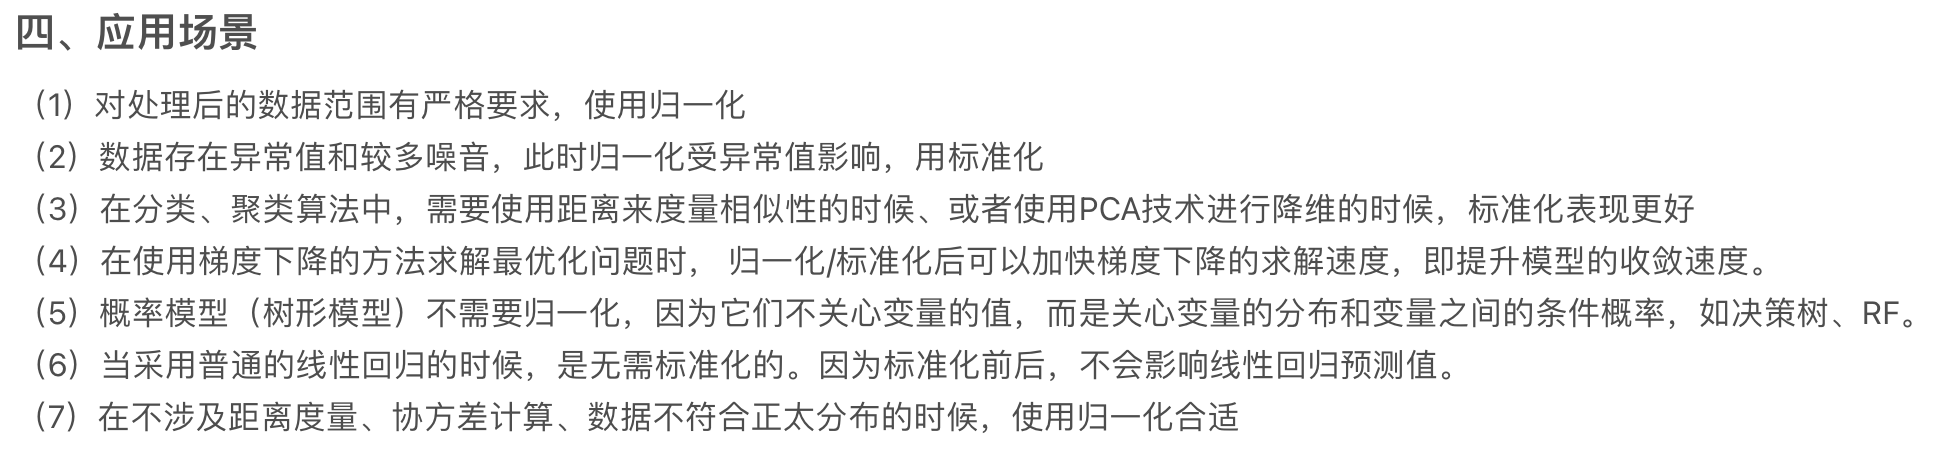

#### References: 
#### https://zhuanlan.zhihu.com/p/697471334  
#### https://blog.csdn.net/weixin_39168167/article/details/132397412

### Power Transformation

#### However, if using GAN models, all x and y variables need to be augmented at the same time. Hence, next still use the dataframe, 'new_ethereum_removed_outliers'

In [42]:
# So, StandardScaler can not be used in this senario since this dataset is very imbalanced, we need to solve this problem.
# PowerTransformation (yeo-johnson) can convert data from an arbitrary distribution to a normal distribution, thereby improving the accuracy of machine learning algorithms.
# It is a variant of the Box-Cox transform, which can handle all real numbers, including negative numbers.
power_transformer = PowerTransformer(method='yeo-johnson')
Ethereum_normalized = power_transformer.fit_transform(Features)
df_features_normalized = pd.DataFrame(Ethereum_normalized, columns=Features.columns)
df_Ethereum_normalized = pd.concat([df_features_normalized, Flag.reset_index(drop=True)], axis=1)
df_Ethereum_normalized

Avg min between sent tnx  Avg min between received tnx  \
0                     0.981565                      0.431583   
1                     1.457632                      0.690047   
2                     1.832567                      0.638788   
3                     1.424631                      1.141712   
4                     0.214434                      1.035124   
...                        ...                           ...   
9536                 -1.109512                     -1.197368   
9537                  1.456759                      0.292019   
9538                 -1.109512                     -1.197368   
9539                  1.190164                      0.611069   
9540                  1.608729                     -0.063020   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                    1.198968  1.935634      1.323588   
1                                    1.430968  1.560674      0.234260   
2                                    1.073563 -0.216555      0.361877   
3                                    0.970970  1.131789      0.302222   
4                                    0.956088  2.105879      0.724501   
...                                       ...       ...           ...   
9536                                -0.236193 -1.423650     -1.011544   
9537                                 0.307196  0.202037      0.505412   
9538                                -1.661385 -1.423650     -1.804680   
9539                                 0.813313  1.468284      1.061535   
9540                                 1.178717  0.994451     -0.367417   

      Number of Created Contracts  Unique Received From Addresses  \
0                       -0.396998                        2.007455   
1                       -0.396998                        0.648905   
2                       -0.396998                        1.209252   
3                       -0.396998                        0.933937   
4                        2.518819                        0.933937   
...                           ...                             ...   
9536                     2.518819                       -0.852468   
9537                    -0.396998                        1.277859   
9538                    -0.396998                       -2.261770   
9539                    -0.396998                        1.890878   
9540                    -0.396998                       -0.852468   

      Unique Sent To Addresses  Min value received  max value received   ...  \
0                     2.186232           -0.786249             0.848990  ...   
1                     1.478758           -0.786249            -0.471630  ...   
2                     0.167292           -0.571917            -0.821442  ...   
3                     1.440902           -0.786249             1.614181  ...   
4                     1.623736           -0.786249             0.298567  ...   
...                        ...                 ...                  ...  ...   
9536                 -1.527632           -0.786249            -1.417905  ...   
9537                  0.697501           -0.777768             0.268158  ...   
9538                 -1.527632           -0.786249            -1.417905  ...   
9539                  1.939222           -0.784004             0.530294  ...   
9540                  0.857320            0.192235             2.286306  ...   

      ERC20 uniq rec contract addr  Transaction frequency per day  \
0                         1.901042                      -0.227468   
1                         1.418120                      -0.986032   
2                         1.471109                      -1.069841   
3                         1.582212                      -0.983684   
4                         1.797934                       0.825614   
...                            ...                            ...   
9536                      1.167000                      -0.807945   
9537              

In [43]:
# For methods except GAN
X_train_normalized = power_transformer.fit_transform(X_train)
X_train_normalized

array([[ 0.28727501,  0.72989454,  1.11190079, ...,  0.75209507,
         0.31528628, -0.73290455],
       [ 1.50614971,  1.32871102,  0.81026487, ...,  1.39690146,
         0.10625607, -0.6107719 ],
       [-0.05974966, -1.20063707, -1.23425123, ...,  1.17709116,
        -0.72795021,  1.26895232],
       ...,
       [ 0.94971822,  0.98887367,  1.3551259 , ...,  1.31663199,
         0.65172345, -1.33008215],
       [ 0.19385858,  0.82173105,  0.79483904, ..., -0.73535553,
         0.28533732,  0.1743971 ],
       [ 1.29439777,  1.05099525,  1.2322106 , ...,  1.39691085,
        -0.36794071,  1.15685176]])

In [138]:
# Standardized the test set 
X_test_normalized = power_transformer.fit_transform(X_test)
X_test_normalized

array([[-1.09798661e+00,  6.26831600e-01,  7.60608604e-01, ...,
        -1.02090617e+00, -1.74633858e+00, -1.56570975e+00],
       [-1.09798661e+00,  8.47258664e-01,  7.39212486e-01, ...,
        -1.02090617e+00,  2.17590082e+00, -1.27736811e+00],
       [-6.52403845e-01, -1.18441510e+00, -1.44971948e+00, ...,
         1.68670274e+00, -1.28956054e-01,  5.68507144e-01],
       ...,
       [-2.59744623e-01,  5.28260652e-01,  6.73775819e-01, ...,
        -3.29704026e-01,  2.91364975e-01,  8.57110377e-01],
       [ 3.54687558e-01, -8.12423294e-02,  1.22314632e-02, ...,
         1.18663238e+00,  1.77753014e+00,  2.19603677e+00],
       [-3.18650756e-01,  4.70150703e-01,  9.46878588e-01, ...,
         3.86610323e-04,  2.90784587e-01,  2.86665083e+00]])

## SMOTE

In [45]:
# Disadvantage: If the samples in a few classes are distant and appear in a majority class, synthesizing new data can cause a class error.
smote = SMOTE(random_state=5011)
print(f'Shape of the training before SMOTE: {X_train_normalized.shape, y_train.shape}')

X_train_smote, y_train_smote = smote.fit_resample(X_train_normalized, y_train)
print(f'Shape of the training after SMOTE: {X_train_smote.shape, y_train_smote.shape}')

Shape of the training before SMOTE: ((7632, 34), (7632,))
Shape of the training after SMOTE: ((11864, 34), (11864,))


## BORDERLINE SMOTE

In [46]:
# If all neighbors are majority classes and these sample data are ignored when creating the composite data, it classifies any few observations as noise points. 
# Furthermore, it classifies some points as boundary points that have both majority and minority classes as neighborhoods, and completely resampling from these points.
# "borderline-1" similar to smote
borderline_smote = BorderlineSMOTE(random_state=5011, kind="borderline-1")
print(f'Shape of the training before BorderlineSMOTE: {X_train_normalized.shape, y_train.shape}')

X_train_borderlinesmote, y_train_borderlinesmote = borderline_smote.fit_resample(X_train_normalized, y_train)
print(f'Shape of the training after BorderlineSMOTE: {X_train_borderlinesmote.shape, y_train_borderlinesmote.shape}')

Shape of the training before BorderlineSMOTE: ((7632, 34), (7632,))
Shape of the training after BorderlineSMOTE: ((11864, 34), (11864,))


## ADASYN

In [47]:
# ADASYN generate synthetic samples based on the proximity of samples from each minority class. 
# In contrast to SMOTE, ADASYN assigns a weight to each minority class sample that represents how many synthetic samples need to be generated for that sample. 
# The weight is calculated based on the proportion of the majority classes in the sample's neighbors. 
# If a minority class sample is in a neighborhood where the majority class dominates, it will gain a higher weight, resulting in more composite samples.
# The main advantage of ADASYN is its ability to adaptively generate synthetic samples based on data distribution, especially for datasets that vary widely in intensity. 
# It can generate more composite samples in sparser areas to better capture features in a small number of categories
adasyn = ADASYN(sampling_strategy='auto', random_state=5011)
print(f'Shape of the training before ADASYN: {X_train_normalized.shape, y_train.shape}')

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_normalized, y_train)
print(f'Shape of the training after ADASYN: {X_train_adasyn.shape, y_train_adasyn.shape}')

Shape of the training before ADASYN: ((7632, 34), (7632,))
Shape of the training after ADASYN: ((11897, 34), (11897,))


## Random OverSampling

In [48]:
ros = RandomOverSampler(random_state=5011)
print(f'Shape of the training before RandomOverSampler: {X_train_normalized.shape, y_train.shape}')

X_train_ros, y_train_ros = ros.fit_resample(X_train_normalized, y_train)
print(f'Shape of the training after RandomOverSampler: {X_train_ros.shape, y_train_ros.shape}')

Shape of the training before RandomOverSampler: ((7632, 34), (7632,))
Shape of the training after RandomOverSampler: ((11864, 34), (11864,))


#### How many samples need GAN models to generate? -- 11864 - 7632 = 4232 / 11897 - 7632 = 4265

## GAN

### Global Functions and Paramaters

In [49]:
# Global Parameters:
# 3-layers, learning rates: 5*10^-4, 10 training epochs
# some parameters based on the literature: Using generative adversarial networks for improving classification effectiveness in credit card fraud detection

# Origin:
#### 'Too few layers will hinder the ability of a network to build a representation at a level of abstraction
#### which is appropriate to adequately capture data complexity, too many layers will complicate training substantially and will likely cause overfitting. 
#### As a reasonable tradeoff, networks with 2 and 3 layers were tested in the generator, in the discriminator, and in the classifier.'

input_dim = 34  # Size of the noise vector, input size is same with the dimension of the dataset
output_dim = df_features_normalized.shape[1]  # Number of features in your dataset
n_classes = 2
# optimizer = adam_v2.Adam(lr=0.0005)  # Optimizer
optimizer = Adam(learning_rate=0.0005) 
SEED = 5011
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
weight_init = glorot_normal(seed=SEED)

#wgan_gp_optimizer = adam_v2.Adam(learning_rate=0.00001, beta_1=0.5, beta_2=0.9)
#wgan_optimizer = rmsprop_v2.RMSprop(lr=0.00001)
wgan_optimizer = RMSprop(learning_rate=0.00001)
clip_value = 0.1
num_classes = 2

2024-07-24 15:04:06.179074: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-07-24 15:04:06.179108: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-07-24 15:04:06.179117: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-07-24 15:04:06.179142: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-24 15:04:06.179160: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [50]:
def merge(X_train, y_train, generated_data):
    X_train_generated = np.concatenate((X_train, generated_data))
    y_generated = np.array(generated_data.shape[0] * [1])
    y_train_generated = np.concatenate((y_train, y_generated))

    return X_train_generated, y_train_generated

In [51]:
def boxplot_compare(df1, df2, c1, c2, gan_label, title):
  fig, ax = plt.subplots(figsize=(16,10))
  bp1 = df1.boxplot(color=c1, showfliers=False)
  bp2 = df2.boxplot(color=c2, showfliers=False)

  patch1 = mpatches.Patch(color=c1, label='Original')
  patch2 = mpatches.Patch(color=c2, label=gan_label)
  plt.legend(handles=[patch1, patch2], prop={'size': 16})
  ax.set_title(title)
  plt.xticks(rotation=90)
  plt.show()


def GAN_Generate_Data(generator, number_of_data):
    noise = np.random.normal(0, 1, size=(number_of_data, input_dim))
    generated_data = generator.predict(noise)
    X_train_generated = np.concatenate((X_train, generated_data))
    y_generated = np.array(generated_data.shape[0] * [1])
    y_train_generated = np.concatenate((y_train, y_generated))
    return generated_data, X_train_generated, y_train_generated    

### ------------------------------------------------------------------------------------------------------------------------------------------

  1/133 ━━━━━━━━━━━━━━━━━━━━ 19s 149ms/step

2024-07-24 15:04:06.485527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


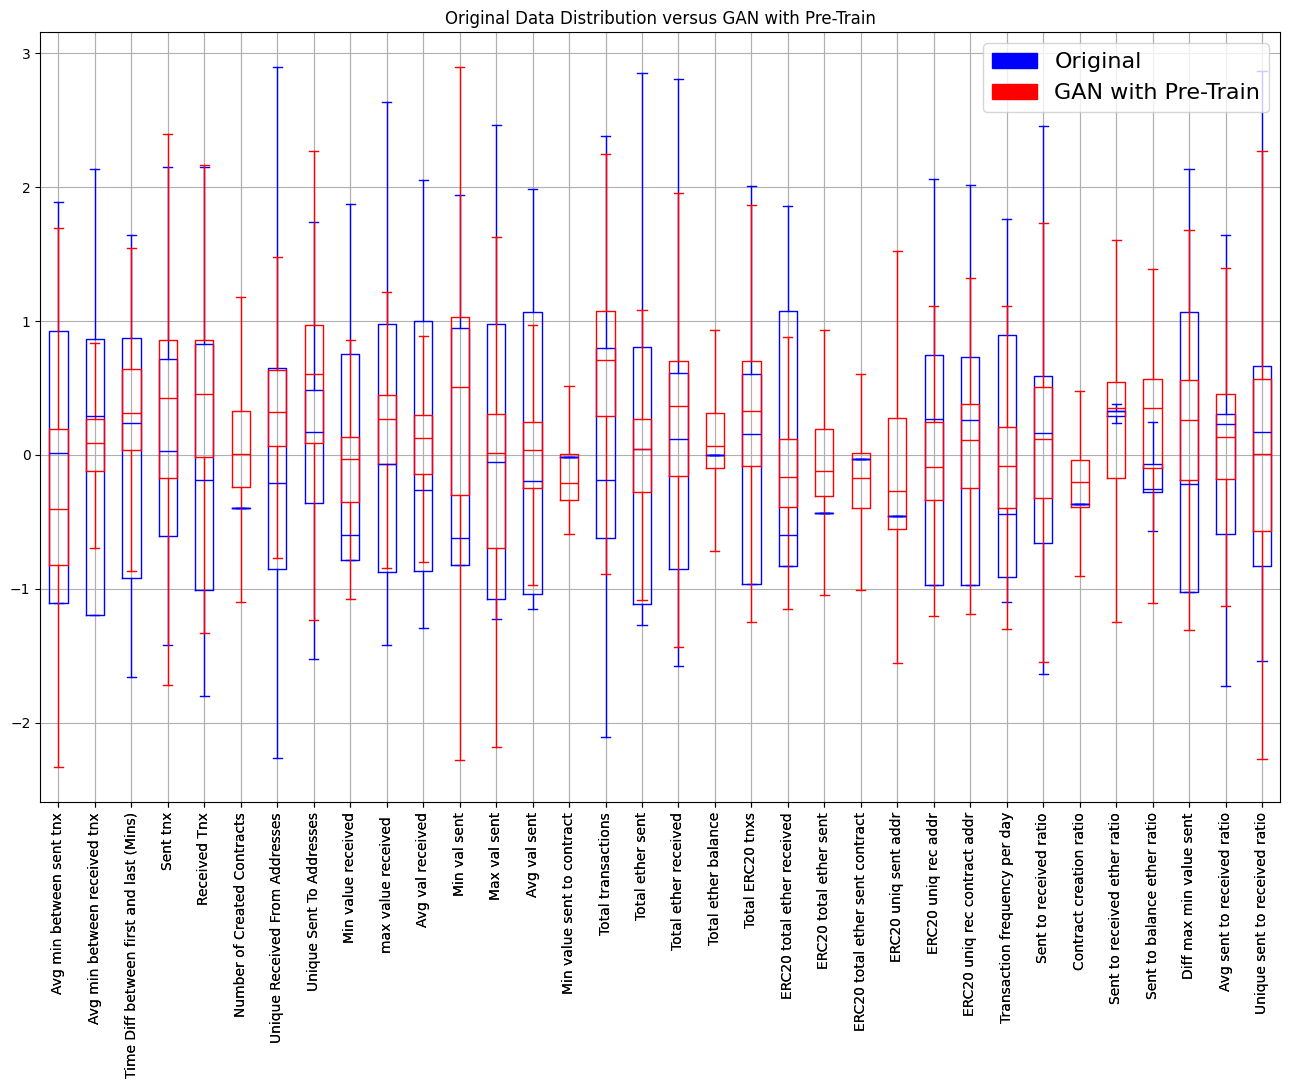

In [52]:
# load generator
generator = tf.keras.models.load_model('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GAN/gan_generator.h5')

# Generate fraud data using the custom function
gan_4232, X_train_gan_generated_4232, y_train_gan_generated_4232 = GAN_Generate_Data(generator, 4232)
df_gan_4232 = pd.DataFrame(data=gan_4232, index=None, columns=df_features_normalized.columns)

# compare with real data
boxplot_compare(df_features_normalized, df_gan_4232, 'blue', 'red', 'GAN with Pre-Train', 'Original Data Distribution versus GAN with Pre-Train')

In [53]:
# Merge the generated data with the original training set
X_train_gan_generated, y_train_gan_generated = merge(X_train_normalized, y_train, gan_4232)

## WGAN (Wasserstein GAN)

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


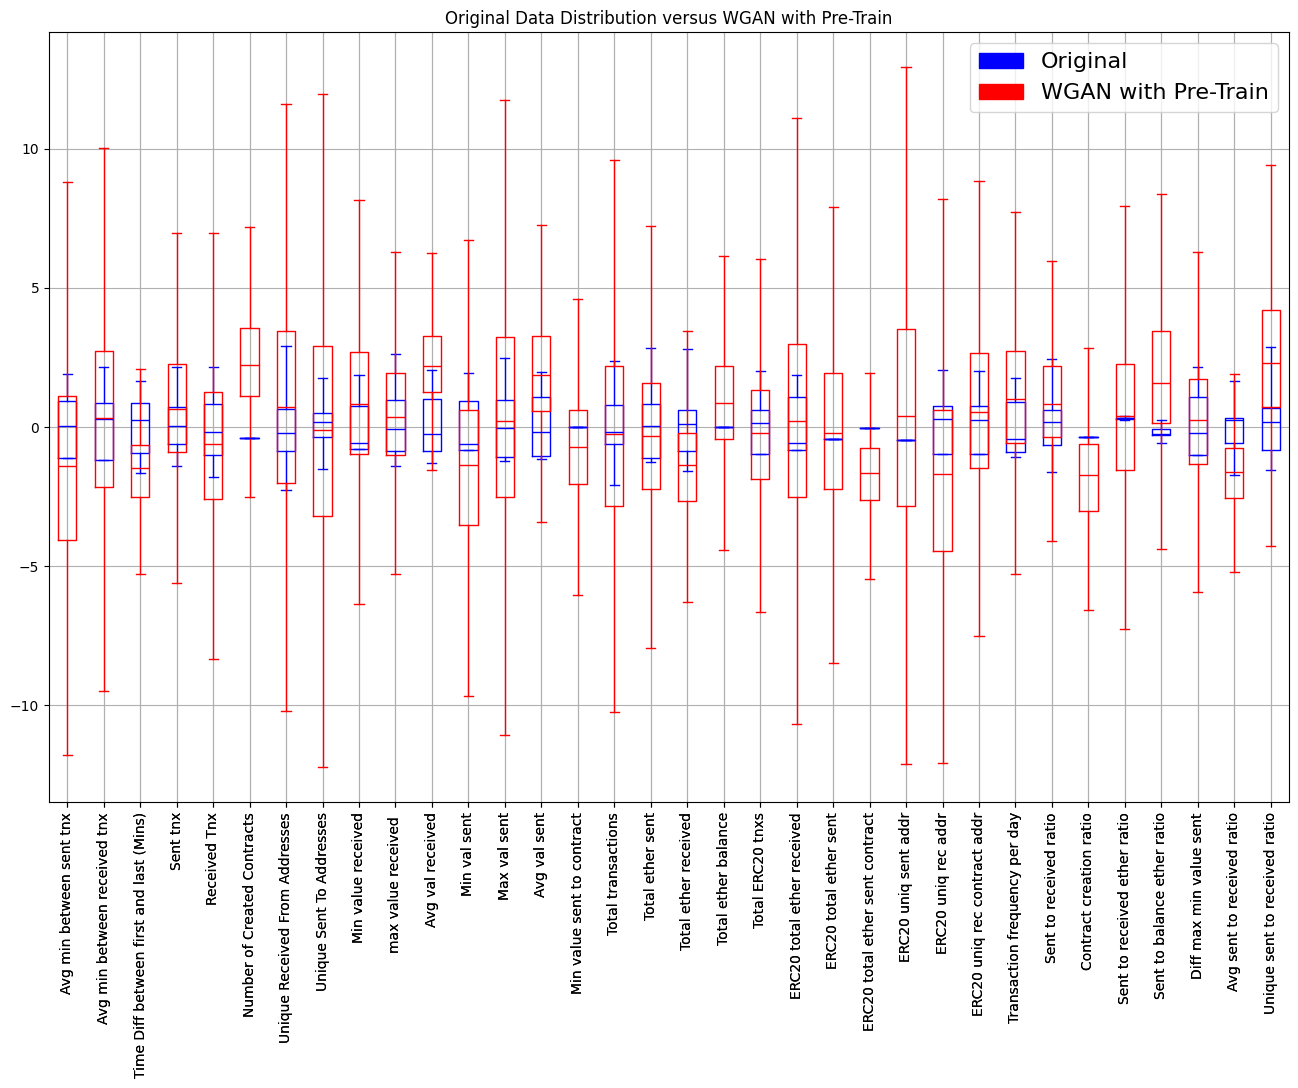

In [54]:
# load generator
wgan_generator = tf.keras.models.load_model('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/WGAN/wgan_generator.h5')

# Generate fraud data using the custom function
wgan_4232, X_train_wgan_generated_4232, y_train_wgan_generated_4232 = GAN_Generate_Data(wgan_generator, 4232)
df_wgan_generated_4232 = pd.DataFrame(data=wgan_4232, index=None, columns=df_features_normalized.columns)

# compare with real data
boxplot_compare(df_features_normalized, df_wgan_generated_4232, 'blue', 'red', 'WGAN with Pre-Train', 'Original Data Distribution versus WGAN with Pre-Train')

In [55]:
# Merge the generated data with the original training set
X_train_wgan_generated, y_train_wgan_generated = merge(X_train_normalized, y_train, wgan_4232)

## WGAN-GP (Wasserstein GAN with Gradient Penalty)

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


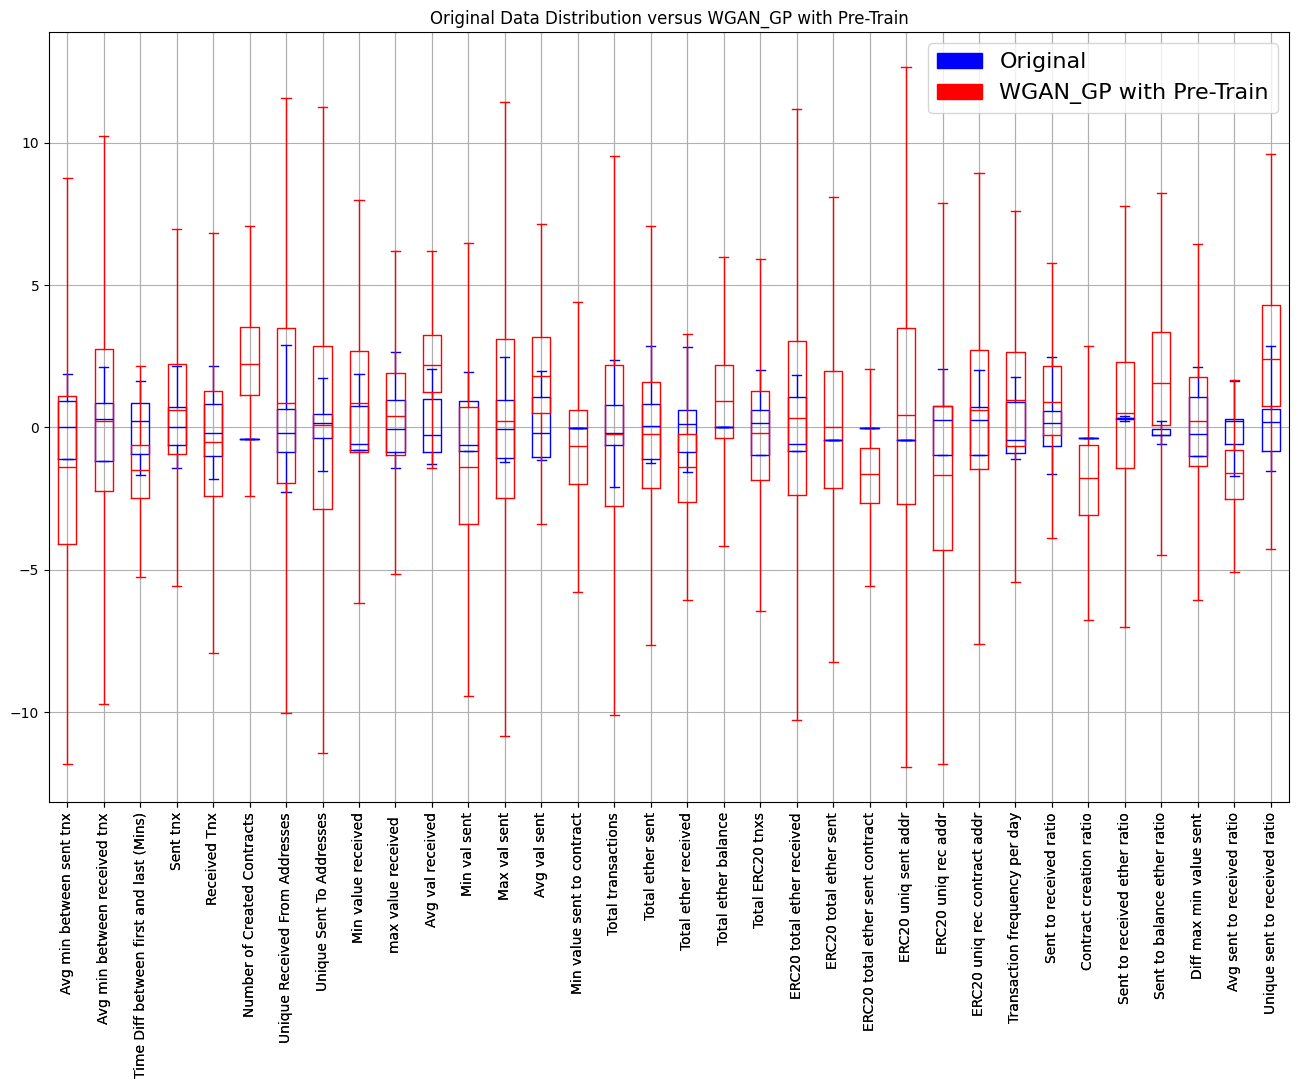

In [56]:
# load generator
wgan_gp_generator = tf.keras.models.load_model('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/WGAN_GP/wgan_gp_generator.h5')

# Generate fraud data using the custom function
wgan_gp_4232, X_train_wgan_gp_generated_4232, y_train_wgan_gp_generated_4232 = GAN_Generate_Data(wgan_gp_generator, 4232)
df_wgan_gp_generated_4232 = pd.DataFrame(data=wgan_gp_4232, index=None, columns=df_features_normalized.columns)

# compare with real data
boxplot_compare(df_features_normalized, df_wgan_gp_generated_4232, 'blue', 'red', 'WGAN_GP with Pre-Train', 'Original Data Distribution versus WGAN_GP with Pre-Train')

In [57]:
# Merge the generated data with the original training set
X_train_wgan_gp_generated, y_train_wgan_gp_generated = merge(X_train_normalized, y_train, wgan_gp_4232)

# Modelling & Evaluation

## Deep Learning Methods

### LSTM

In [118]:
# Structure followed by the combination of two articles:
## 2023 - Ensemble_Deep_Learning-Based_Prediction_of_Fraudulent_Cryptocurrency_Transactions
## 2023 - A Trusted Explainable LSTM Model to Classify Fraud Patterns on Credit Card Transactions
def lstm_base_model(dataset_input_shape):

    base_model = Sequential()
    
    # First LSTM Layer
    base_model.add(LSTM(units=46, activation='relu', return_sequences=True, input_shape=(dataset_input_shape, 1)))
    base_model.add(BatchNormalization())
    base_model.add(Dropout(0.3))
    
    # Second LSTM Layer
    base_model.add(LSTM(units=30, activation='relu', return_sequences=False))
    base_model.add(BatchNormalization())
    base_model.add(Dropout(0.3))
    
    # Output Layer
    base_model.add(Dense(units=1, activation='sigmoid'))

    return base_model

In [199]:
### LSTM + SMOTE
X_train_smote_lstm = np.expand_dims(X_train_smote, axis=2)
X_test_normalized_lstm = np.expand_dims(X_test_normalized, axis=2)

X_train_smote_lstm_input = X_train_smote_lstm.shape[1]

lstm_smote = lstm_base_model(X_train_smote_lstm_input)

# Compile the model
lstm_smote.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = lstm_smote.fit(X_train_smote_lstm, y_train_smote, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 16:00:32.137268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.4968 - accuracy: 0.7752

2024-07-13 16:03:41.620714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 193s 3s/step - loss: 0.4968 - accuracy: 0.7752 - val_loss: 1.0651 - val_accuracy: 0.0000e+00
Epoch 2/10
75/75 [==============================] - 184s 2s/step - loss: 0.2655 - accuracy: 0.8993 - val_loss: 1.5726 - val_accuracy: 0.0000e+00
Epoch 3/10
75/75 [==============================] - 180s 2s/step - loss: 0.2268 - accuracy: 0.9105 - val_loss: 1.8243 - val_accuracy: 8.4281e-04
Epoch 4/10
75/75 [==============================] - 180s 2s/step - loss: 0.2005 - accuracy: 0.9231 - val_loss: 1.9345 - val_accuracy: 0.0013
Epoch 5/10
75/75 [==============================] - 760s 10s/step - loss: 0.1848 - accuracy: 0.9315 - val_loss: 1.8447 - val_accuracy: 0.0013
Epoch 6/10
75/75 [==============================] - 185s 2s/step - loss: 0.1769 - accuracy: 0.9319 - val_loss: 1.3023 - val_accuracy: 0.2288
Epoch 7/10
75/75 [==============================] - 199s 3s/step - loss: 0.1685 - accuracy: 0.9389 - val_loss: 0.4706 - val_accuracy: 0.7573
Epoch 8/10


In [200]:
### LSTM + SMOTE
y_pred_lstm_smote = (lstm_smote.predict(X_test_normalized_lstm) > 0.5).astype("int32")
print("Accuracy of SMOTE and LSTM:", accuracy_score(y_test, y_pred_lstm_smote))
print(classification_report(y_test, y_pred_lstm_smote))

2024-07-13 16:42:20.568500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of SMOTE and LSTM: 0.9539025667888947
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1495
         1.0       0.88      0.92      0.90       414

    accuracy                           0.95      1909
   macro avg       0.93      0.94      0.93      1909
weighted avg       0.95      0.95      0.95      1909



In [444]:
# All evaluations:
print("Precision of SMOTE and LSTM:", precision_score(y_test, y_pred_lstm_smote))
print("Recall of SMOTE and LSTM:", recall_score(y_test, y_pred_lstm_smote))
print("F1 Score of SMOTE and LSTM:", f1_score(y_test, y_pred_lstm_smote))
print("AUC of SMOTE and LSTM:", roc_auc_score(y_test, y_pred_lstm_smote))

Precision of SMOTE and LSTM: 0.8755760368663594
Recall of SMOTE and LSTM: 0.9178743961352657
F1 Score of SMOTE and LSTM: 0.8962264150943395
AUC of SMOTE and LSTM: 0.9408769973987366


In [339]:
# Save the model
lstm_smote.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lstm_smote_model.h5')

In [256]:
### LSTM + borderlinesmote
X_train_borderlinesmote_lstm = np.expand_dims(X_train_borderlinesmote, axis=2)
X_test_normalized_lstm = np.expand_dims(X_test_normalized, axis=2)

X_train_borderlinesmote_lstm_input = X_train_borderlinesmote_lstm.shape[1]

lstm_borderlinesmote = lstm_base_model(X_train_borderlinesmote_lstm_input)

# Compile the model
lstm_borderlinesmote.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = lstm_borderlinesmote.fit(X_train_borderlinesmote_lstm, y_train_borderlinesmote, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 19:22:51.153953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.5540 - accuracy: 0.7280

2024-07-13 19:25:56.801245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 189s 2s/step - loss: 0.5540 - accuracy: 0.7280 - val_loss: 0.9446 - val_accuracy: 0.0000e+00
Epoch 2/10
75/75 [==============================] - 180s 2s/step - loss: 0.4118 - accuracy: 0.8049 - val_loss: 1.1241 - val_accuracy: 0.0000e+00
Epoch 3/10
75/75 [==============================] - 180s 2s/step - loss: 0.3672 - accuracy: 0.8269 - val_loss: 1.2630 - val_accuracy: 0.0000e+00
Epoch 4/10
75/75 [==============================] - 180s 2s/step - loss: 0.3393 - accuracy: 0.8453 - val_loss: 1.4024 - val_accuracy: 0.0000e+00
Epoch 5/10
75/75 [==============================] - 180s 2s/step - loss: 0.3175 - accuracy: 0.8599 - val_loss: 1.4185 - val_accuracy: 0.0126
Epoch 6/10
75/75 [==============================] - 181s 2s/step - loss: 0.2935 - accuracy: 0.8702 - val_loss: 1.3144 - val_accuracy: 0.0131
Epoch 7/10
75/75 [==============================] - 180s 2s/step - loss: 0.2765 - accuracy: 0.8806 - val_loss: 1.0542 - val_accuracy: 0.1652
Epoch 8/

In [257]:
### LSTM + borderlinesmote
y_pred_lstm_borderlinesmote = (lstm_borderlinesmote.predict(X_test_normalized_lstm) > 0.5).astype("int32")
print("Accuracy of Borderline-SMOTE and LSTM:", accuracy_score(y_test, y_pred_lstm_borderlinesmote))
print(classification_report(y_test, y_pred_lstm_borderlinesmote))

2024-07-13 19:52:56.683994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of Borderline-SMOTE and LSTM: 0.9528548978522787
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1495
         1.0       0.91      0.87      0.89       414

    accuracy                           0.95      1909
   macro avg       0.94      0.92      0.93      1909
weighted avg       0.95      0.95      0.95      1909



In [445]:
# All evaluations:
print("Precision of Borderline-SMOTE and LSTM:", precision_score(y_test, y_pred_lstm_borderlinesmote))
print("Recall of Borderline-SMOTE and LSTM:", recall_score(y_test, y_pred_lstm_borderlinesmote))
print("F1 Score of Borderline-SMOTE and LSTM:", f1_score(y_test, y_pred_lstm_borderlinesmote))
print("AUC of Borderline-SMOTE and LSTM:", roc_auc_score(y_test, y_pred_lstm_borderlinesmote))

Precision of Borderline-SMOTE and LSTM: 0.907035175879397
Recall of Borderline-SMOTE and LSTM: 0.8719806763285024
F1 Score of Borderline-SMOTE and LSTM: 0.8891625615763546
AUC of Borderline-SMOTE and LSTM: 0.9236157562244518


In [340]:
# Save the model
lstm_borderlinesmote.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lstm_borderlinesmote_model.h5')

In [258]:
### LSTM + ADASYN
X_train_adasyn_lstm = np.expand_dims(X_train_adasyn, axis=2)
X_test_normalized_lstm = np.expand_dims(X_test_normalized, axis=2)

X_train_adasyn_lstm_input = X_train_adasyn_lstm.shape[1]

lstm_adasyn = lstm_base_model(X_train_adasyn_lstm_input)

# Compile the model
lstm_adasyn.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = lstm_adasyn.fit(X_train_adasyn_lstm, y_train_adasyn, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 19:53:04.301293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.5433 - accuracy: 0.7274

2024-07-13 19:56:02.204447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 182s 2s/step - loss: 0.5433 - accuracy: 0.7274 - val_loss: 0.9052 - val_accuracy: 0.0000e+00
Epoch 2/10
75/75 [==============================] - 176s 2s/step - loss: 0.3833 - accuracy: 0.8295 - val_loss: 1.0138 - val_accuracy: 0.0000e+00
Epoch 3/10
75/75 [==============================] - 178s 2s/step - loss: 0.3503 - accuracy: 0.8423 - val_loss: 1.0659 - val_accuracy: 0.0000e+00
Epoch 4/10
75/75 [==============================] - 181s 2s/step - loss: 0.3228 - accuracy: 0.8539 - val_loss: 0.9897 - val_accuracy: 0.0076
Epoch 5/10
75/75 [==============================] - 181s 2s/step - loss: 0.2996 - accuracy: 0.8660 - val_loss: 0.8354 - val_accuracy: 0.2761
Epoch 6/10
75/75 [==============================] - 180s 2s/step - loss: 0.2811 - accuracy: 0.8821 - val_loss: 0.7098 - val_accuracy: 0.5668
Epoch 7/10
75/75 [==============================] - 179s 2s/step - loss: 0.2533 - accuracy: 0.8914 - val_loss: 0.8720 - val_accuracy: 0.4815
Epoch 8/10
7

In [259]:
### LSTM + ADASYN
y_pred_lstm_adasyn = (lstm_adasyn.predict(X_test_normalized_lstm) > 0.5).astype("int32")
print("Accuracy of ADASYN and LSTM:", accuracy_score(y_test, y_pred_lstm_adasyn))
print(classification_report(y_test, y_pred_lstm_adasyn))

2024-07-13 20:22:57.910620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of ADASYN and LSTM: 0.9219486642221059
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      1495
         1.0       0.76      0.94      0.84       414

    accuracy                           0.92      1909
   macro avg       0.87      0.93      0.89      1909
weighted avg       0.93      0.92      0.92      1909



In [446]:
# All evaluations:
print("Precision of ADASYN and LSTM:", precision_score(y_test, y_pred_lstm_adasyn))
print("Recall of ADASYN and LSTM:", recall_score(y_test, y_pred_lstm_adasyn))
print("F1 Score of ADASYN and LSTM:", f1_score(y_test, y_pred_lstm_adasyn))
print("AUC of ADASYN and LSTM:", roc_auc_score(y_test, y_pred_lstm_adasyn))

Precision of ADASYN and LSTM: 0.7582846003898636
Recall of ADASYN and LSTM: 0.9396135265700483
F1 Score of ADASYN and LSTM: 0.8392664509169363
AUC of ADASYN and LSTM: 0.9283351913786696


In [341]:
# Save the model
lstm_adasyn.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lstm_adasyn_model.h5')

In [260]:
### LSTM + ROS
X_train_ros_lstm = np.expand_dims(X_train_ros, axis=2)
X_test_normalized_lstm = np.expand_dims(X_test_normalized, axis=2)

X_train_ros_lstm_input = X_train_ros_lstm.shape[1]

lstm_ros = lstm_base_model(X_train_ros_lstm_input)

# Compile the model
lstm_ros.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = lstm_ros.fit(X_train_ros_lstm, y_train_ros, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 20:23:05.930121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.4627 - accuracy: 0.7897

2024-07-13 20:26:07.114730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 185s 2s/step - loss: 0.4627 - accuracy: 0.7897 - val_loss: 0.9073 - val_accuracy: 0.0000e+00
Epoch 2/10
75/75 [==============================] - 180s 2s/step - loss: 0.2876 - accuracy: 0.8842 - val_loss: 0.9728 - val_accuracy: 0.0000e+00
Epoch 3/10
75/75 [==============================] - 180s 2s/step - loss: 0.2481 - accuracy: 0.9019 - val_loss: 1.0603 - val_accuracy: 0.0000e+00
Epoch 4/10
75/75 [==============================] - 180s 2s/step - loss: 0.2196 - accuracy: 0.9147 - val_loss: 1.0302 - val_accuracy: 0.0249
Epoch 5/10
75/75 [==============================] - 180s 2s/step - loss: 0.2012 - accuracy: 0.9243 - val_loss: 1.1046 - val_accuracy: 0.0695
Epoch 6/10
75/75 [==============================] - 180s 2s/step - loss: 0.1936 - accuracy: 0.9289 - val_loss: 0.7769 - val_accuracy: 0.5601
Epoch 7/10
75/75 [==============================] - 182s 2s/step - loss: 0.1851 - accuracy: 0.9286 - val_loss: 0.4506 - val_accuracy: 0.8171
Epoch 8/10
7

In [261]:
### LSTM + ROS
y_pred_lstm_ros = (lstm_ros.predict(X_test_normalized_lstm) > 0.5).astype("int32")
print("Accuracy of ROS and LSTM:", accuracy_score(y_test, y_pred_lstm_ros))
print(classification_report(y_test, y_pred_lstm_ros))

2024-07-13 20:53:13.518407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of ROS and LSTM: 0.9528548978522787
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1495
         1.0       0.89      0.89      0.89       414

    accuracy                           0.95      1909
   macro avg       0.93      0.93      0.93      1909
weighted avg       0.95      0.95      0.95      1909



In [447]:
# All evaluations:
print("Precision of ROS and LSTM:", precision_score(y_test, y_pred_lstm_ros))
print("Recall of ROS and LSTM:", recall_score(y_test, y_pred_lstm_ros))
print("F1 Score of ROS and LSTM:", f1_score(y_test, y_pred_lstm_ros))
print("AUC of ROS and LSTM:", roc_auc_score(y_test, y_pred_lstm_ros))

Precision of ROS and LSTM: 0.8932038834951457
Recall of ROS and LSTM: 0.8888888888888888
F1 Score of ROS and LSTM: 0.891041162227603
AUC of ROS and LSTM: 0.9297287253808993


In [342]:
# Save the model
lstm_ros.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lstm_ros_model.h5')

In [60]:
### LSTM + GAN
X_train_gan_lstm = np.expand_dims(X_train_gan_generated, axis=2)
X_test_normalized_lstm = np.expand_dims(X_test_normalized, axis=2)

X_train_gan_lstm_input = X_train_gan_lstm.shape[1]

lstm_gan = lstm_base_model(X_train_gan_lstm_input)

# Compile the model
lstm_gan.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = lstm_gan.fit(X_train_gan_lstm, y_train_gan_generated, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.6669 - loss: 0.6486 - val_accuracy: 0.0341 - val_loss: 0.9587
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.8146 - loss: 0.4339 - val_accuracy: 0.0173 - val_loss: 1.0365
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.8076 - loss: 0.4318 - val_accuracy: 0.0556 - val_loss: 0.9690
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.8202 - loss: 0.4089 - val_accuracy: 0.0598 - val_loss: 0.9021
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.8274 - loss: 0.3891 - val_accuracy: 0.4842 - val_loss: 0.7118
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.8473 - loss: 0.3592 - val_accuracy: 0.6578 - val_loss: 0.6308
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.8569 - loss: 0.3343 - val_accuracy: 0.7295 - val_loss: 0.5720
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.8664 - loss: 0.3274 - val_accuracy: 0.6570 - v

In [61]:
### LSTM + GAN
y_pred_lstm_gan = (lstm_gan.predict(X_test_normalized_lstm) > 0.5).astype("int32")
print("Accuracy of GAN and LSTM:", accuracy_score(y_test, y_pred_lstm_gan))
print(classification_report(y_test, y_pred_lstm_gan))

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step
Accuracy of GAN and LSTM: 0.8968046097433211
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      1495
         1.0       0.89      0.59      0.71       414

    accuracy                           0.90      1909
   macro avg       0.90      0.79      0.83      1909
weighted avg       0.90      0.90      0.89      1909



In [62]:
# All evaluations:
print("Precision of GAN and LSTM:", precision_score(y_test, y_pred_lstm_gan))
print("Recall of GAN and LSTM:", recall_score(y_test, y_pred_lstm_gan))
print("F1 Score of GAN and LSTM:", f1_score(y_test, y_pred_lstm_gan))
print("AUC of GAN and LSTM:", roc_auc_score(y_test, y_pred_lstm_gan))

Precision of GAN and LSTM: 0.8945454545454545
Recall of GAN and LSTM: 0.5942028985507246
F1 Score of GAN and LSTM: 0.714078374455733
AUC of GAN and LSTM: 0.787402452619844


In [343]:
# Save the model
lstm_gan.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lstm_gan_model.h5')

In [63]:
### LSTM + WGAN
X_train_wgan_lstm = np.expand_dims(X_train_wgan_generated, axis=2)
X_test_normalized_lstm = np.expand_dims(X_test_normalized, axis=2)

X_train_wgan_lstm_input = X_train_wgan_lstm.shape[1]

lstm_wgan = lstm_base_model(X_train_wgan_lstm_input)

# Compile the model
lstm_wgan.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = lstm_wgan.fit(X_train_wgan_lstm, y_train_wgan_generated, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.7703 - loss: 0.4804 - val_accuracy: 0.7893 - val_loss: 0.5962
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.8957 - loss: 0.2675 - val_accuracy: 0.9937 - val_loss: 0.3695
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9107 - loss: 0.2307 - val_accuracy: 0.9979 - val_loss: 0.1434
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9235 - loss: 0.2197 - val_accuracy: 0.9831 - val_loss: 0.1224
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9253 - loss: 0.2046 - val_accuracy: 0.9798 - val_loss: 0.0972
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9363 - loss: 0.1815 - val_accuracy: 0.9890 - val_loss: 0.0505
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9378 - loss: 0.1720 - val_accuracy: 0.9874 - val_loss: 0.0401
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9390 - loss: 0.1671 - val_accuracy: 0.9511 - v

In [64]:
### LSTM + WGAN
y_pred_lstm_wgan = (lstm_wgan.predict(X_test_normalized_lstm) > 0.5).astype("int32")
print("Accuracy of WGAN and LSTM:", accuracy_score(y_test, y_pred_lstm_wgan))
print(classification_report(y_test, y_pred_lstm_wgan))

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step
Accuracy of WGAN and LSTM: 0.9109481403876375
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      1495
         1.0       0.79      0.79      0.79       414

    accuracy                           0.91      1909
   macro avg       0.87      0.87      0.87      1909
weighted avg       0.91      0.91      0.91      1909



In [65]:
# All evaluations:
print("Precision of WGAN and LSTM:", precision_score(y_test, y_pred_lstm_wgan))
print("Recall of WGAN and LSTM:", recall_score(y_test, y_pred_lstm_wgan))
print("F1 Score of WGAN and LSTM:", f1_score(y_test, y_pred_lstm_wgan))
print("AUC of WGAN and LSTM:", roc_auc_score(y_test, y_pred_lstm_wgan))

Precision of WGAN and LSTM: 0.7946859903381642
Recall of WGAN and LSTM: 0.7946859903381642
F1 Score of WGAN and LSTM: 0.7946859903381642
AUC of WGAN and LSTM: 0.8689149015235972


In [344]:
# Save the model
lstm_wgan.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lstm_wgan_model.h5')

In [66]:
### LSTM + WGAN-GP
X_train_wgan_gp_lstm = np.expand_dims(X_train_wgan_gp_generated, axis=2)
X_test_normalized_lstm = np.expand_dims(X_test_normalized, axis=2)

X_train_wgan_gp_lstm_input = X_train_wgan_gp_lstm.shape[1]

lstm_wgan_gp = lstm_base_model(X_train_wgan_gp_lstm_input)

# Compile the model
lstm_wgan_gp.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = lstm_wgan_gp.fit(X_train_wgan_gp_lstm, y_train_wgan_gp_generated, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.7313 - loss: 0.5315 - val_accuracy: 0.3064 - val_loss: 0.7385
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9010 - loss: 0.2630 - val_accuracy: 0.8420 - val_loss: 0.5001
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9119 - loss: 0.2384 - val_accuracy: 0.8833 - val_loss: 3.6972
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.8960 - loss: 0.2620 - val_accuracy: 0.8437 - val_loss: 0.4762
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9125 - loss: 0.2396 - val_accuracy: 0.9836 - val_loss: 0.1333
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9284 - loss: 0.1966 - val_accuracy: 0.9882 - val_loss: 0.0660
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9307 - loss: 0.1933 - val_accuracy: 0.9869 - val_loss: 0.0447
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9346 - loss: 0.1850 - val_accuracy: 0.9857 - v

In [67]:
### LSTM + WGAN-GP
y_pred_lstm_wgan_gp = (lstm_wgan_gp.predict(X_test_normalized_lstm) > 0.5).astype("int32")
print("Accuracy of WGAN-GP and LSTM:", accuracy_score(y_test, y_pred_lstm_wgan_gp))
print(classification_report(y_test, y_pred_lstm_wgan_gp))

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step
Accuracy of WGAN-GP and LSTM: 0.9250916710319539
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1495
         1.0       0.89      0.75      0.81       414

    accuracy                           0.93      1909
   macro avg       0.91      0.86      0.88      1909
weighted avg       0.92      0.93      0.92      1909



In [68]:
# All evaluations:
print("Precision of WGAN-GP and LSTM:", precision_score(y_test, y_pred_lstm_wgan_gp))
print("Recall of WGAN-GP and LSTM:", recall_score(y_test, y_pred_lstm_wgan_gp))
print("F1 Score of WGAN-GP and LSTM:", f1_score(y_test, y_pred_lstm_wgan_gp))
print("AUC of WGAN-GP and LSTM:", roc_auc_score(y_test, y_pred_lstm_wgan_gp))

Precision of WGAN-GP and LSTM: 0.8904899135446686
Recall of WGAN-GP and LSTM: 0.7463768115942029
F1 Score of WGAN-GP and LSTM: 0.812089356110381
AUC of WGAN-GP and LSTM: 0.8604793756967669


In [345]:
# Save the model
lstm_wgan_gp.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lstm_wgan_gp_model.h5')

### ResNet-1D

In [140]:
# Build the ResNet 1D from scratch, create the residual block first
def residual_block(x, filters, kernel_size=3, strides=1, use_1x1conv=False):
    y = Conv1D(filters, kernel_size, strides=strides, padding='same')(x)
    y = BatchNormalization()(y)
    y = ReLU()(y)
    y = Conv1D(filters, kernel_size, strides=1, padding='same')(y)
    y = BatchNormalization()(y)
    
    if use_1x1conv:
        x = Conv1D(filters, kernel_size=1, strides=strides, padding='same')(x)
    y = Add()([y, x])
    return ReLU()(y)

def resnet_1D_base_model(dataset_input_shape):

    inputs = Input(shape=(dataset_input_shape,1))

    # First Conv Layer
    x = Conv1D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv1D(64, kernel_size=3, strides=2, padding='same')(x)

    # First ResNet Block
    x = residual_block(x, 64, use_1x1conv=True)
    x = residual_block(x, 64)

    # Second ResNet Block
    x = residual_block(x, 128, strides=2, use_1x1conv=True)
    x = residual_block(x, 128)

    # Third ResNet Block
    x = residual_block(x, 256, strides=2, use_1x1conv=True)
    x = residual_block(x, 256)

    # Fourth ResNet Block
    x = residual_block(x, 512, strides=2, use_1x1conv=True)
    x = residual_block(x, 512)

    # Global Average Pooling
    x = GlobalAveragePooling1D()(x)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    base_model = Model(inputs, outputs)
    return base_model

In [70]:
### ResNet 1D + SMOTE
X_train_smote_resnet1D = np.expand_dims(X_train_smote, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)

X_train_smote_resnet1D_input = X_train_smote_resnet1D.shape[1]

resnet1D_smote = resnet_1D_base_model(X_train_smote_resnet1D_input)

# Compile the model
resnet1D_smote.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = resnet1D_smote.fit(X_train_smote_resnet1D, y_train_smote, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 36s 300ms/step - accuracy: 0.8926 - loss: 0.3003 - val_accuracy: 0.9996 - val_loss: 0.0307
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 226ms/step - accuracy: 0.9684 - loss: 0.0962 - val_accuracy: 0.9992 - val_loss: 0.0080
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 228ms/step - accuracy: 0.9708 - loss: 0.0830 - val_accuracy: 0.9836 - val_loss: 0.0372
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 227ms/step - accuracy: 0.9707 - loss: 0.0784 - val_accuracy: 0.9406 - val_loss: 0.1171
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 227ms/step - accuracy: 0.9626 - loss: 0.0962 - val_accuracy: 0.9642 - val_loss: 0.0770
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 230ms/step - accuracy: 0.9726 - loss: 0.0759 - val_accuracy: 0.9735 - val_loss: 0.0761
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 234ms/step - accuracy: 0.9773 - loss: 0.0665 - val_accuracy: 0.9587 - val_loss: 0.1229
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 236ms/step - accuracy: 0.9699 - loss: 0.0836 - val_accu

In [71]:
### ResNet 1D + SMOTE
y_pred_resnet1D_smote = (resnet1D_smote.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of SMOTE and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_smote))
print(classification_report(y_test, y_pred_resnet1D_smote))

60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step
Accuracy of SMOTE and ResNet1D: 0.9690937663698271
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1495
         1.0       0.91      0.95      0.93       414

    accuracy                           0.97      1909
   macro avg       0.95      0.96      0.96      1909
weighted avg       0.97      0.97      0.97      1909



In [72]:
# All evaluations:
print("Precision of SMOTE and ResNet 1D:", precision_score(y_test, y_pred_resnet1D_smote))
print("Recall of SMOTE and ResNet 1D:", recall_score(y_test, y_pred_resnet1D_smote))
print("F1 Score of SMOTE and ResNet 1D:", f1_score(y_test, y_pred_resnet1D_smote))
print("AUC of SMOTE and ResNet 1D:", roc_auc_score(y_test, y_pred_resnet1D_smote))

Precision of SMOTE and ResNet 1D: 0.9137529137529138
Recall of SMOTE and ResNet 1D: 0.9468599033816425
F1 Score of SMOTE and ResNet 1D: 0.930011862396204
AUC of SMOTE and ResNet 1D: 0.9610553697510218


In [346]:
# Save the model
resnet1D_smote.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/resnet1D_smote_model.h5')

In [73]:
### ResNet 1D + borderlinesmote
X_train_borderlinesmote_resnet1D = np.expand_dims(X_train_borderlinesmote, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)

X_train_borderlinesmote_resnet1D_input = X_train_borderlinesmote_resnet1D.shape[1]

resnet1D_borderlinesmote = resnet_1D_base_model(X_train_borderlinesmote_resnet1D_input)

# Compile the model
resnet1D_borderlinesmote.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = resnet1D_borderlinesmote.fit(X_train_borderlinesmote_resnet1D, y_train_borderlinesmote, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 49s 397ms/step - accuracy: 0.7967 - loss: 0.5520 - val_accuracy: 0.9983 - val_loss: 0.0682
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 272ms/step - accuracy: 0.9534 - loss: 0.1294 - val_accuracy: 0.9987 - val_loss: 0.0291
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 270ms/step - accuracy: 0.9710 - loss: 0.0902 - val_accuracy: 0.9848 - val_loss: 0.0605
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 268ms/step - accuracy: 0.9694 - loss: 0.0871 - val_accuracy: 0.9987 - val_loss: 0.0059
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 275ms/step - accuracy: 0.9730 - loss: 0.0752 - val_accuracy: 0.9338 - val_loss: 0.1557
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 265ms/step - accuracy: 0.9688 - loss: 0.1075 - val_accuracy: 0.9928 - val_loss: 0.0389
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 267ms/step - accuracy: 0.9722 - loss: 0.0821 - val_accuracy: 0.9532 - val_loss: 0.1232
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.9745 - loss: 0.0798 - val_accu

In [74]:
### ResNet 1D + borderlinesmote
y_pred_resnet1D_borderlinesmote = (resnet1D_borderlinesmote.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of Borderline-SMOTE and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_borderlinesmote))
print(classification_report(y_test, y_pred_resnet1D_borderlinesmote))

60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
Accuracy of Borderline-SMOTE and ResNet1D: 0.964379256155055
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1495
         1.0       0.93      0.91      0.92       414

    accuracy                           0.96      1909
   macro avg       0.95      0.94      0.95      1909
weighted avg       0.96      0.96      0.96      1909



In [75]:
# All evaluations:
print("Precision of Borderline-SMOTE and ResNet 1D:", precision_score(y_test, y_pred_resnet1D_borderlinesmote))
print("Recall of Borderline-SMOTE and ResNet 1D:", recall_score(y_test, y_pred_resnet1D_borderlinesmote))
print("F1 Score of Borderline-SMOTE and ResNet 1D:", f1_score(y_test, y_pred_resnet1D_borderlinesmote))
print("AUC of Borderline-SMOTE and ResNet 1D:", roc_auc_score(y_test, y_pred_resnet1D_borderlinesmote))

Precision of Borderline-SMOTE and ResNet 1D: 0.9282178217821783
Recall of Borderline-SMOTE and ResNet 1D: 0.9057971014492754
F1 Score of Borderline-SMOTE and ResNet 1D: 0.9168704156479217
AUC of Borderline-SMOTE and ResNet 1D: 0.9431995540691194


In [347]:
# Save the model
resnet1D_borderlinesmote.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/resnet1D_borderlinesmote_model.h5')

In [76]:
### ResNet 1D + ADASYN
X_train_adasyn_resnet1D = np.expand_dims(X_train_adasyn, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)

X_train_adasyn_resnet1D_input = X_train_adasyn_resnet1D.shape[1]

resnet1D_adasyn = resnet_1D_base_model(X_train_adasyn_resnet1D_input)

# Compile the model
resnet1D_adasyn.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = resnet1D_adasyn.fit(X_train_adasyn_resnet1D, y_train_adasyn, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 59s 447ms/step - accuracy: 0.8230 - loss: 0.5032 - val_accuracy: 0.9941 - val_loss: 0.0759
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 302ms/step - accuracy: 0.9494 - loss: 0.1378 - val_accuracy: 0.9807 - val_loss: 0.0615
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 297ms/step - accuracy: 0.9664 - loss: 0.1002 - val_accuracy: 0.9685 - val_loss: 0.0703
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 302ms/step - accuracy: 0.9667 - loss: 0.0987 - val_accuracy: 0.9004 - val_loss: 0.3464
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 310ms/step - accuracy: 0.9658 - loss: 0.0894 - val_accuracy: 0.8975 - val_loss: 0.4047
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 302ms/step - accuracy: 0.9756 - loss: 0.0738 - val_accuracy: 0.8954 - val_loss: 0.4073
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 302ms/step - accuracy: 0.9758 - loss: 0.0681 - val_accuracy: 0.8954 - val_loss: 0.3826
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 299ms/step - accuracy: 0.9674 - loss: 0.0897 - val_accu

In [77]:
### ResNet 1D + ADASYN
y_pred_resnet1D_adasyn = (resnet1D_adasyn.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of ADASYN and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_adasyn))
print(classification_report(y_test, y_pred_resnet1D_adasyn))

60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step
Accuracy of ADASYN and ResNet1D: 0.9738082765845992
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1495
         1.0       0.95      0.93      0.94       414

    accuracy                           0.97      1909
   macro avg       0.96      0.96      0.96      1909
weighted avg       0.97      0.97      0.97      1909



In [78]:
# All evaluations:
print("Precision of ADASYN and ResNet 1D:", precision_score(y_test, y_pred_resnet1D_adasyn))
print("Recall of ADASYN and ResNet 1D:", recall_score(y_test, y_pred_resnet1D_adasyn))
print("F1 Score of ADASYN and ResNet 1D:", f1_score(y_test, y_pred_resnet1D_adasyn))
print("AUC of ADASYN and ResNet 1D:", roc_auc_score(y_test, y_pred_resnet1D_adasyn))

Precision of ADASYN and ResNet 1D: 0.9482758620689655
Recall of ADASYN and ResNet 1D: 0.9299516908212561
F1 Score of ADASYN and ResNet 1D: 0.9390243902439024
AUC of ADASYN and ResNet 1D: 0.9579524340393906


In [348]:
# Save the model
resnet1D_adasyn.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/resnet1D_adasyn_model.h5')

In [79]:
### ResNet 1D + ROS
X_train_ros_resnet1D = np.expand_dims(X_train_ros, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)

X_train_ros_resnet1D_input = X_train_ros_resnet1D.shape[1]

resnet1D_ros = resnet_1D_base_model(X_train_ros_resnet1D_input)

# Compile the model
resnet1D_ros.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = resnet1D_ros.fit(X_train_ros_resnet1D, y_train_ros, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step - accuracy: 0.8724 - loss: 0.3146 - val_accuracy: 0.9857 - val_loss: 0.0902
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 328ms/step - accuracy: 0.9619 - loss: 0.1047 - val_accuracy: 0.9760 - val_loss: 0.0478
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 336ms/step - accuracy: 0.9653 - loss: 0.0945 - val_accuracy: 0.9604 - val_loss: 0.1119
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 354ms/step - accuracy: 0.9632 - loss: 0.1044 - val_accuracy: 0.9751 - val_loss: 0.0513
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 337ms/step - accuracy: 0.9704 - loss: 0.0800 - val_accuracy: 0.9663 - val_loss: 0.0967
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 346ms/step - accuracy: 0.9781 - loss: 0.0668 - val_accuracy: 0.9541 - val_loss: 0.1274
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 334ms/step - accuracy: 0.9732 - loss: 0.0777 - val_accuracy: 0.9781 - val_loss: 0.0873
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 336ms/step - accuracy: 0.9807 - loss: 0.0550 - val_accu

In [80]:
### ResNet 1D + ROS
y_pred_resnet1D_ros = (resnet1D_ros.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of ROS and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_ros))
print(classification_report(y_test, y_pred_resnet1D_ros))

60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step
Accuracy of ROS and ResNet1D: 0.9685699319015191
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1495
         1.0       0.93      0.93      0.93       414

    accuracy                           0.97      1909
   macro avg       0.95      0.95      0.95      1909
weighted avg       0.97      0.97      0.97      1909



In [81]:
# All evaluations:
print("Precision of ROS and ResNet 1D:", precision_score(y_test, y_pred_resnet1D_ros))
print("Recall of ROS and ResNet 1D:", recall_score(y_test, y_pred_resnet1D_ros))
print("F1 Score of ROS and ResNet 1D:", f1_score(y_test, y_pred_resnet1D_ros))
print("AUC of ROS and ResNet 1D:", roc_auc_score(y_test, y_pred_resnet1D_ros))

Precision of ROS and ResNet 1D: 0.9254807692307693
Recall of ROS and ResNet 1D: 0.9299516908212561
F1 Score of ROS and ResNet 1D: 0.927710843373494
AUC of ROS and ResNet 1D: 0.9546079524340395


In [349]:
# Save the model
resnet1D_ros.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/resnet1D_ros_model.h5')

In [82]:
### ResNet 1D + GAN
X_train_gan_resnet1D = np.expand_dims(X_train_gan_generated, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)

X_train_gan_resnet1D_input = X_train_gan_resnet1D.shape[1]

resnet1D_gan = resnet_1D_base_model(X_train_gan_resnet1D_input)

# Compile the model
resnet1D_gan.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = resnet1D_gan.fit(X_train_gan_resnet1D, y_train_gan_generated, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 71s 603ms/step - accuracy: 0.8292 - loss: 0.4236 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 386ms/step - accuracy: 0.9719 - loss: 0.0914 - val_accuracy: 0.9996 - val_loss: 0.0040
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 372ms/step - accuracy: 0.9742 - loss: 0.0907 - val_accuracy: 0.9996 - val_loss: 0.0011
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 373ms/step - accuracy: 0.9787 - loss: 0.0687 - val_accuracy: 0.9962 - val_loss: 0.0082
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 383ms/step - accuracy: 0.9765 - loss: 0.0700 - val_accuracy: 0.9983 - val_loss: 0.0036
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 377ms/step - accuracy: 0.9755 - loss: 0.0687 - val_accuracy: 0.9937 - val_loss: 0.0203
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 375ms/step - accuracy: 0.9809 - loss: 0.0555 - val_accuracy: 0.9987 - val_loss: 0.0054
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 378ms/step - accuracy: 0.9824 - loss: 0.0627 - val_accu

In [83]:
### ResNet 1D + GAN
y_pred_resnet1D_gan = (resnet1D_gan.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of GAN and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_gan))
print(classification_report(y_test, y_pred_resnet1D_gan))

60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step
Accuracy of GAN and ResNet1D: 0.9727606076479832
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1495
         1.0       0.94      0.93      0.94       414

    accuracy                           0.97      1909
   macro avg       0.96      0.96      0.96      1909
weighted avg       0.97      0.97      0.97      1909



In [84]:
# All evaluations:
print("Precision of GAN and ResNet 1D:", precision_score(y_test, y_pred_resnet1D_gan))
print("Recall of GAN and ResNet 1D:", recall_score(y_test, y_pred_resnet1D_gan))
print("F1 Score of GAN and ResNet 1D:", f1_score(y_test, y_pred_resnet1D_gan))
print("AUC of GAN and ResNet 1D:", roc_auc_score(y_test, y_pred_resnet1D_gan))

Precision of GAN and ResNet 1D: 0.9393203883495146
Recall of GAN and ResNet 1D: 0.9347826086956522
F1 Score of GAN and ResNet 1D: 0.937046004842615
AUC of GAN and ResNet 1D: 0.9590301003344482


In [350]:
# Save the model
resnet1D_gan.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/resnet1D_gan_model.h5')

In [85]:
### ResNet 1D + WGAN
X_train_wgan_resnet1D = np.expand_dims(X_train_wgan_generated, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)

X_train_wgan_resnet1D_input = X_train_wgan_resnet1D.shape[1]

resnet1D_wgan = resnet_1D_base_model(X_train_wgan_resnet1D_input)

# Compile the model
resnet1D_wgan.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = resnet1D_wgan.fit(X_train_wgan_resnet1D, y_train_wgan_generated, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 95s 681ms/step - accuracy: 0.8497 - loss: 0.3578 - val_accuracy: 0.9077 - val_loss: 0.2103
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 428ms/step - accuracy: 0.9694 - loss: 0.0874 - val_accuracy: 0.9794 - val_loss: 0.0509
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 429ms/step - accuracy: 0.9747 - loss: 0.0742 - val_accuracy: 0.9966 - val_loss: 0.0100
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 418ms/step - accuracy: 0.9789 - loss: 0.0616 - val_accuracy: 0.9996 - val_loss: 0.0023
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 424ms/step - accuracy: 0.9796 - loss: 0.0611 - val_accuracy: 0.9987 - val_loss: 0.0051
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 417ms/step - accuracy: 0.9766 - loss: 0.0826 - val_accuracy: 0.9992 - val_loss: 0.0040
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 34s 446ms/step - accuracy: 0.9800 - loss: 0.0575 - val_accuracy: 1.0000 - val_loss: 8.9704e-06
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 425ms/step - accuracy: 0.9761 - loss: 0.0691 - val_

In [86]:
### ResNet 1D + WGAN
y_pred_resnet1D_wgan = (resnet1D_wgan.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of WGAN and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_wgan))
print(classification_report(y_test, y_pred_resnet1D_wgan))

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step
Accuracy of WGAN and ResNet1D: 0.964379256155055
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1495
         1.0       0.97      0.86      0.91       414

    accuracy                           0.96      1909
   macro avg       0.97      0.93      0.95      1909
weighted avg       0.96      0.96      0.96      1909



In [87]:
# All evaluations:
print("Precision of WGAN and ResNet 1D:", precision_score(y_test, y_pred_resnet1D_wgan))
print("Recall of WGAN and ResNet 1D:", recall_score(y_test, y_pred_resnet1D_wgan))
print("F1 Score of WGAN and ResNet 1D:", f1_score(y_test, y_pred_resnet1D_wgan))
print("AUC of WGAN and ResNet 1D:", roc_auc_score(y_test, y_pred_resnet1D_wgan))

Precision of WGAN and ResNet 1D: 0.9675675675675676
Recall of WGAN and ResNet 1D: 0.8647342995169082
F1 Score of WGAN and ResNet 1D: 0.9132653061224489
AUC of WGAN and ResNet 1D: 0.9283537718320325


In [351]:
# Save the model
resnet1D_wgan.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/resnet1D_wgan_model.h5')

In [88]:
### ResNet 1D + WGAN-GP
X_train_wgan_gp_resnet1D = np.expand_dims(X_train_wgan_gp_generated, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)

X_train_wgan_gp_resnet1D_input = X_train_wgan_gp_resnet1D.shape[1]

resnet1D_wgan_gp = resnet_1D_base_model(X_train_wgan_gp_resnet1D_input)

# Compile the model
resnet1D_wgan_gp.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = resnet1D_wgan_gp.fit(X_train_wgan_gp_resnet1D, y_train_wgan_gp_generated, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 93s 825ms/step - accuracy: 0.8846 - loss: 0.3116 - val_accuracy: 0.7560 - val_loss: 0.4504
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 492ms/step - accuracy: 0.9683 - loss: 0.0933 - val_accuracy: 0.9402 - val_loss: 0.1399
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 488ms/step - accuracy: 0.9727 - loss: 0.0712 - val_accuracy: 0.9735 - val_loss: 0.0667
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 515ms/step - accuracy: 0.9790 - loss: 0.0615 - val_accuracy: 0.9937 - val_loss: 0.0144
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 518ms/step - accuracy: 0.9778 - loss: 0.0677 - val_accuracy: 0.9987 - val_loss: 0.0020
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 503ms/step - accuracy: 0.9779 - loss: 0.0605 - val_accuracy: 0.9975 - val_loss: 0.0054
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 508ms/step - accuracy: 0.9799 - loss: 0.0626 - val_accuracy: 1.0000 - val_loss: 7.2559e-05
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 517ms/step - accuracy: 0.9817 - loss: 0.0530 - val_

In [89]:
### ResNet 1D + WGAN-GP
y_pred_resnet1D_wgan_gp = (resnet1D_wgan_gp.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of WGAN-GP and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_wgan_gp))
print(classification_report(y_test, y_pred_resnet1D_wgan_gp))

60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step
Accuracy of WGAN-GP and ResNet1D: 0.9764274489261393
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1495
         1.0       0.95      0.94      0.95       414

    accuracy                           0.98      1909
   macro avg       0.97      0.96      0.97      1909
weighted avg       0.98      0.98      0.98      1909



In [90]:
# All evaluations:
print("Precision of WGAN-GP and ResNet 1D:", precision_score(y_test, y_pred_resnet1D_wgan_gp))
print("Recall of WGAN-GP and ResNet 1D:", recall_score(y_test, y_pred_resnet1D_wgan_gp))
print("F1 Score of WGAN-GP and ResNet 1D:", f1_score(y_test, y_pred_resnet1D_wgan_gp))
print("AUC of WGAN-GP and ResNet 1D:", roc_auc_score(y_test, y_pred_resnet1D_wgan_gp))

Precision of WGAN-GP and ResNet 1D: 0.9511002444987775
Recall of WGAN-GP and ResNet 1D: 0.9396135265700483
F1 Score of WGAN-GP and ResNet 1D: 0.945321992709599
AUC of WGAN-GP and ResNet 1D: 0.9631178000743218


In [290]:
# Save the model
resnet1D_wgan_gp.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/resnet1D_wgan_gp_model.h5')

# Optimization

### Genetic Algorithm

In [358]:
# Re-define the resnet structure for optimization
# num_filters: 32, 64, 128
# dropout_rate: 0.1, 0.2, 0.3, 0.4
# dense_units: 64, 128, 256, 512, 1024
def resnet_1D_base_model(dataset_input_shape, num_filters, dropout_rate):

    inputs = Input(shape=(dataset_input_shape,1))

    # First Conv Layer
    x = Conv1D(num_filters, kernel_size=7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv1D(num_filters, kernel_size=3, strides=2, padding='same')(x)

    # ResNet Blocks
    for i in range(4):
        x = residual_block(x, num_filters * (2 ** i), strides=2, use_1x1conv=True)
        x = residual_block(x, num_filters * (2 ** i))

    # Global Average Pooling
    x = GlobalAveragePooling1D()(x)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    base_model = Model(inputs, outputs)
    return base_model

In [359]:
# Define the fitness function for GA
def fitness_function(individual):
    num_filters, dropout_rate = individual
    
    # Ensure hyperparameters are in valid ranges
    num_filters = int(num_filters)
    dropout_rate = max(0, min(1, dropout_rate))
    
    # Build and compile the model
    resnet1D_wgan_gp = resnet_1D_base_model(X_train_wgan_gp_resnet1D_input, num_filters, dropout_rate)
    resnet1D_wgan_gp.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])
    
    # Train the model
    history = resnet1D_wgan_gp.fit(X_train_wgan_gp_resnet1D, y_train_wgan_gp_generated, epochs=3, batch_size=128, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    y_pred = (resnet1D_wgan_gp.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy,

# GA setup with specific ranges
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int_filters", random.choice, [32, 64, 128])  # num_filters
toolbox.register("attr_float_dropout", random.choice, [0.1, 0.2, 0.3, 0.4])  # dropout_rate

toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_int_filters, toolbox.attr_float_dropout), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded, low=[32, 0.1], up=[128, 0.4], eta=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness_function)

In [363]:
# Initialize population
random.seed(5012)
population = toolbox.population(n=10)

# Define statistics and run GA
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# Run GA
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=2, stats=stats, halloffame=hof, verbose=True)

# Output best individual
print("Best individual is: ", hof[0])
print("With fitness: ", hof[0].fitness.values[0])

2024-07-15 14:11:55.197994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 14:13:40.954206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 14:16:27.421545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 14:16:35.681910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 14:18:28.650641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 14:21:23.107293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 14:21:40.909570: I tensorflow/core/grappler/optimizers/cust

gen	nevals	avg     	std       	min     	max     
0  	10    	0.960346	0.00735628	0.948664	0.971189


2024-07-15 15:05:39.651308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:07:56.625159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:11:45.110009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:11:55.987809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:14:12.393234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:17:49.645261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:18:01.077598: I tensorflow/core/grappler/optimizers/cust

1  	6     	0.959822	0.013545  	0.920377	0.967522


2024-07-15 15:44:31.522611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:46:41.471599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:50:25.504826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:50:36.539417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:52:57.097958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:56:43.659721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:56:57.119591: I tensorflow/core/grappler/optimizers/cust

2  	8     	0.960293	0.0048113 	0.949712	0.967522
Best individual is:  [32, 0.2]
With fitness:  0.9711891042430592


In [58]:
#X_train_smote_resnet1D = np.expand_dims(X_train_smote, axis=2)
X_train_wgan_gp_resnet1D = np.expand_dims(X_train_wgan_gp_generated, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)
X_train_wgan_gp_resnet1D_input = X_train_wgan_gp_resnet1D.shape[1]

In [119]:
# Re-define the resnet structure for optimization
# num_filters: 32, 64, 128
# dropout_rate: 0.1, 0.2, 0.3, 0.4
# dense_units: 64, 128, 256, 512, 1024
def resnet_1D_base_model(dataset_input_shape, num_filters, dropout_rate, dense_units):

    inputs = Input(shape=(dataset_input_shape,1))

    # First Conv Layer
    x = Conv1D(num_filters, kernel_size=7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv1D(num_filters, kernel_size=3, strides=2, padding='same')(x)

    # ResNet Blocks
    for i in range(4):
        x = residual_block(x, num_filters * (2 ** i), strides=2, use_1x1conv=True)
        x = residual_block(x, num_filters * (2 ** i))

    # Global Average Pooling
    x = GlobalAveragePooling1D()(x)
    x = Flatten()(x)
    x = Dense(dense_units, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(dense_units, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    base_model = Model(inputs, outputs)
    return base_model

In [91]:
# Define the fitness function for GA
def fitness_function(individual):
    num_filters, dropout_rate, dense_units = individual
    
    # Ensure hyperparameters are in valid ranges
    num_filters = int(num_filters)
    dropout_rate = max(0, min(1, dropout_rate))
    dense_units = int(dense_units)
    
    # Build and compile the model
    model = resnet_1D_base_model(X_train_wgan_gp_resnet1D_input, num_filters, dropout_rate, dense_units)
    model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train_wgan_gp_resnet1D, y_train_wgan_gp_generated, epochs=10, batch_size=128, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    y_pred = (model.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy,

# Ensure mutation produces valid values
def mutate_individual(individual, indpb):
    if random.random() < indpb:
        individual[0] = random.choice([32, 64])  # num_filters
    if random.random() < indpb:
        individual[1] = random.choice([0.3, 0.4])  # dropout_rate
    if random.random() < indpb:
        individual[2] = random.choice([256, 512, 1024])  # dense_units
    return individual,

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int_filters", random.choice, [32, 64])  # num_filters
toolbox.register("attr_float_dropout", random.choice, [0.3, 0.4])  # dropout_rate
toolbox.register("attr_int_dense", random.choice, [256, 512, 1024])  # dense_units

toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_int_filters, toolbox.attr_float_dropout, toolbox.attr_int_dense), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", mutate_individual, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness_function)


In [92]:
# Initialize population
random.seed(5012)
population = toolbox.population(n=10)

# Define statistics and run GA
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# Run GA
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=2, stats=stats, halloffame=hof, verbose=True)

# Output best individual
print("Best individual is: ", hof[0])
print("With fitness: ", hof[0].fitness.values[0])

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step
gen	nevals	avg     	std       	min     	max     
0  	10    	0.966579	0.00331136	0.962808	0.973808
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step
1  	5     	0.968622	0.00391617	0.96176 	0.973808
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step
2  	6     	0.

### Continue to fine-tuning on this basis

In [120]:
# Define the fitness function for GA
def fitness_function(individual):
    num_filters, dropout_rate, dense_units = individual
    
    # Ensure hyperparameters are in valid ranges
    num_filters = int(num_filters)
    dropout_rate = max(0, min(1, dropout_rate))
    dense_units = int(dense_units)
    
    # Build and compile the model
    model = resnet_1D_base_model(X_train_wgan_gp_resnet1D_input, num_filters, dropout_rate, dense_units)
    model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train_wgan_gp_resnet1D, y_train_wgan_gp_generated, epochs=10, batch_size=128, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    y_pred = (model.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy,

# Setup GA with the new ranges
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int_filters", random.choice, [32, 48, 64])  # num_filters fine-tuning
toolbox.register("attr_float_dropout", random.choice, [0.25, 0.3, 0.35])  # dropout_rate fine-tuning
toolbox.register("attr_int_dense", random.choice, [1024, 1280])  # dense_units fine-tuning

toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_int_filters, toolbox.attr_float_dropout, toolbox.attr_int_dense), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded, low=[32, 0.25, 1024], up=[64, 0.35, 1280], eta=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness_function)

# Initialize population
random.seed(5012)
population = toolbox.population(n=10)

# Define statistics and run GA
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# Run GA
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=5, stats=stats, halloffame=hof, verbose=True)

# Output best individual
print("Best individual is: ", hof[0])
print("With fitness: ", hof[0].fitness.values[0])

60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 180ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 120ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 212ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 215ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step
gen	nevals	avg     	std       	min     	max     
0  	10    	0.971189	0.00290716	0.966998	0.974332
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 196ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 232ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step
1  	4     	0.973023	0.00269406	0.966998	0.976951
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step
2  	2     	0.969775	0.0140639 	0.93033 	0.976951
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 188ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 231ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 231ms/step
60/60 ━━━

### Continue to fine-tuning on this basis

In [61]:
# Define the residual block and resnet model
def residual_block(x, filters, kernel_size=3, strides=1, use_1x1conv=False):
    y = Conv1D(filters, kernel_size, strides=strides, padding='same')(x)
    y = BatchNormalization()(y)
    y = ReLU()(y)
    y = Conv1D(filters, kernel_size=3, strides=1, padding='same')(y)
    y = BatchNormalization()(y)
    
    if use_1x1conv:
        x = Conv1D(filters, kernel_size=1, strides=strides, padding='same')(x)
    y = Add()([y, x])
    return ReLU()(y)

def resnet_1D_base_model(dataset_input_shape, num_filters, dropout_rate, dense_units):
    inputs = Input(shape=(dataset_input_shape, 1))

    # First Conv Layer
    x = Conv1D(num_filters, kernel_size=7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv1D(num_filters, kernel_size=3, strides=2, padding='same')(x)

    # ResNet Blocks
    for i in range(4):
        x = residual_block(x, num_filters * (2 ** i), strides=2, use_1x1conv=True)
        x = residual_block(x, num_filters * (2 ** i))

    # Global Average Pooling
    x = GlobalAveragePooling1D()(x)
    x = Flatten()(x)
    x = Dense(dense_units, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(dense_units, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    base_model = Model(inputs, outputs)
    return base_model

# Define the fitness function for GA
def fitness_function(individual):
    num_filters, dropout_rate, dense_units = individual
    
    # Ensure hyperparameters are in valid ranges
    num_filters = int(num_filters)
    dropout_rate = max(0, min(1, dropout_rate))
    dense_units = int(dense_units)
    
    # Build and compile the model
    model = resnet_1D_base_model(X_train_wgan_gp_resnet1D_input, num_filters, dropout_rate, dense_units)
    model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train_wgan_gp_resnet1D, y_train_wgan_gp_generated, epochs=20, batch_size=128, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    y_pred = (model.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy,

# Setup GA with the new ranges
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int_filters", random.choice, [32, 48, 64])  # num_filters fine-tuning
toolbox.register("attr_float_dropout", random.choice, [0.25, 0.3, 0.35, 0.4])  # dropout_rate fine-tuning
toolbox.register("attr_int_dense", random.choice, [512, 1024])  # dense_units fine-tuning

toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_int_filters, toolbox.attr_float_dropout, toolbox.attr_int_dense), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded, low=[32, 0.25, 512], up=[64, 0.4, 1024], eta=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness_function)

# Initialize population
random.seed(5012)
population = toolbox.population(n=10)

# Define statistics and run GA
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# Run GA
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=5, stats=stats, halloffame=hof, verbose=True)

# Output best individual
print("Best individual is: ", hof[0])
print("With fitness: ", hof[0].fitness.values[0])


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step
gen	nevals	avg     	std       	min     	max     
0  	10    	0.972446	0.00516555	0.960189	0.979047
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step
1  	6     	0.972342	0.00348891	0.966998	0.976427
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step
2  	5   

In [67]:
# Initialize the model with the best parameters
best_individual = [32, 0.35, 512]

# Build and compile the final model
final_model = resnet_1D_base_model(X_train_wgan_gp_resnet1D_input, 32, 0.35, 512)
final_model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Train the final model with more epochs
history = final_model.fit(X_train_wgan_gp_resnet1D, y_train_wgan_gp_generated, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 328s 3s/step - accuracy: 0.8738 - loss: 0.2941 - val_accuracy: 0.4834 - val_loss: 0.8141
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.9653 - loss: 0.0973 - val_accuracy: 0.9111 - val_loss: 0.2204
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.9736 - loss: 0.0705 - val_accuracy: 0.9979 - val_loss: 0.0074
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9743 - loss: 0.0788 - val_accuracy: 0.9979 - val_loss: 0.0042
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.9795 - loss: 0.0666 - val_accuracy: 0.9987 - val_loss: 0.0022
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.9830 - loss: 0.0521 - val_accuracy: 0.9983 - val_loss: 0.0046
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.9786 - loss: 0.0624 - val_accuracy: 0.9979 - val_loss: 0.0052
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9835 - loss: 0.0538 - val_accuracy: 0.9958 - val_l

In [68]:
### ResNet 1D + WGAN-GP
y_pred_resnet1D_wgan_gp_GA = (final_model.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of WGAN-GP and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_wgan_gp_GA))
print(classification_report(y_test, y_pred_resnet1D_wgan_gp_GA))

60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 242ms/step
Accuracy of WGAN-GP and ResNet1D: 0.9701414353064431
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1495
         1.0       0.93      0.93      0.93       414

    accuracy                           0.97      1909
   macro avg       0.96      0.96      0.96      1909
weighted avg       0.97      0.97      0.97      1909



In [69]:
# All evaluations:
print("Precision of WGAN-GP and ResNet 1D:", precision_score(y_test, y_pred_resnet1D_wgan_gp_GA))
print("Recall of WGAN-GP and ResNet 1D:", recall_score(y_test, y_pred_resnet1D_wgan_gp_GA))
print("F1 Score of WGAN-GP and ResNet 1D:", f1_score(y_test, y_pred_resnet1D_wgan_gp_GA))
print("AUC of WGAN-GP and ResNet 1D:", roc_auc_score(y_test, y_pred_resnet1D_wgan_gp_GA))

Precision of WGAN-GP and ResNet 1D: 0.9322033898305084
Recall of WGAN-GP and ResNet 1D: 0.9299516908212561
F1 Score of WGAN-GP and ResNet 1D: 0.9310761789600968
AUC of WGAN-GP and ResNet 1D: 0.9556112969156448


In [ ]:
# Save the model
final_model.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/resnet1D_wgan_gp_GA_model.h5')


Epoch 1: val_accuracy improved from -inf to 0.74547, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.74547 to 0.94311, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.94311 to 0.99326, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.99326 to 0.99831, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy did not improve from 0.99831

Epoch 6: val_accuracy did not improve from 0.99831

Epoch 7: val_accuracy did not improve from 0.99831

Epoch 8: val_accuracy did not improve from 0.99831

Epoch 9: val_accuracy did not improve from 0.99831

Epoch 10: val_accuracy did not improve from 0.99831

Epoch 11: val_accuracy improved from 0.99831 to 0.99958, saving model to 

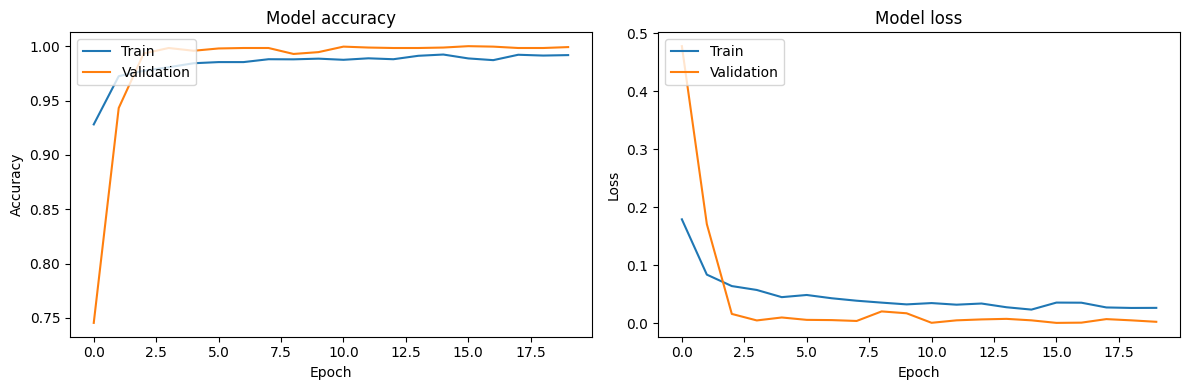

60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step

Epoch 1: val_accuracy improved from -inf to 0.87737, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.87737 to 0.95617, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.95617 to 0.98609, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.98609 to 0.99368, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99368 to 0.99494, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99494 to 0.99747, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy improved from 0.

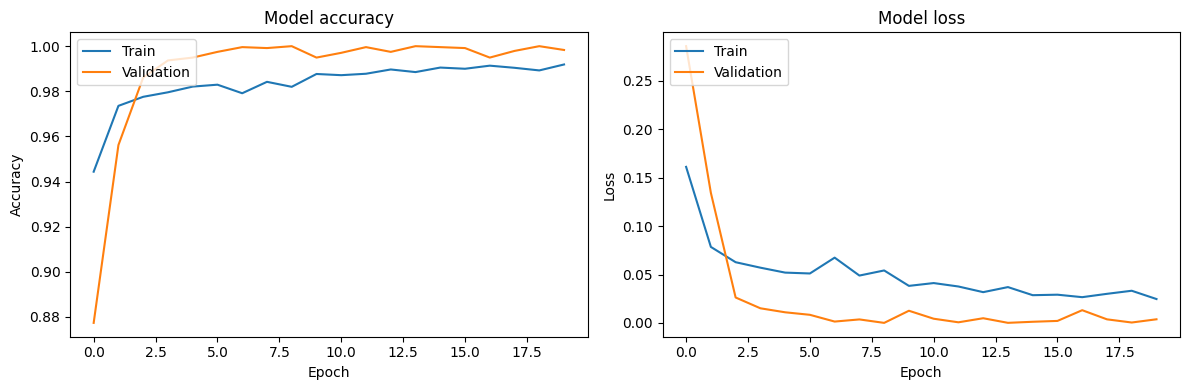

60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step

Epoch 1: val_accuracy improved from -inf to 0.98357, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy did not improve from 0.98357

Epoch 3: val_accuracy improved from 0.98357 to 0.99031, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.99031 to 0.99789, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99789 to 0.99831, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99831 to 0.99958, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy did not improve from 0.99958

Epoch 8: val_accuracy did not improve from 0.99958

Epoch 9: val_accuracy did not improv

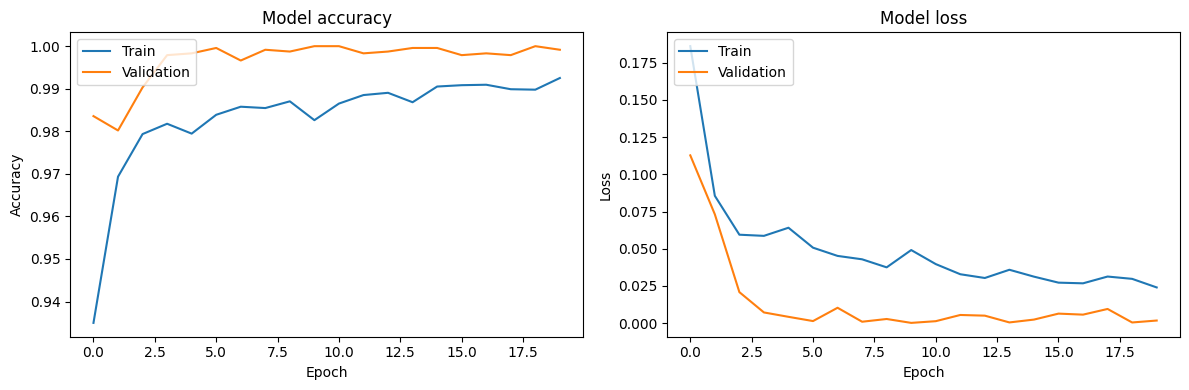

60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step

Epoch 1: val_accuracy improved from -inf to 0.54614, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.54614 to 0.90434, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.90434 to 0.98314, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.98314 to 0.99115, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99115 to 0.99621, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99621 to 0.99916, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy did not improve 

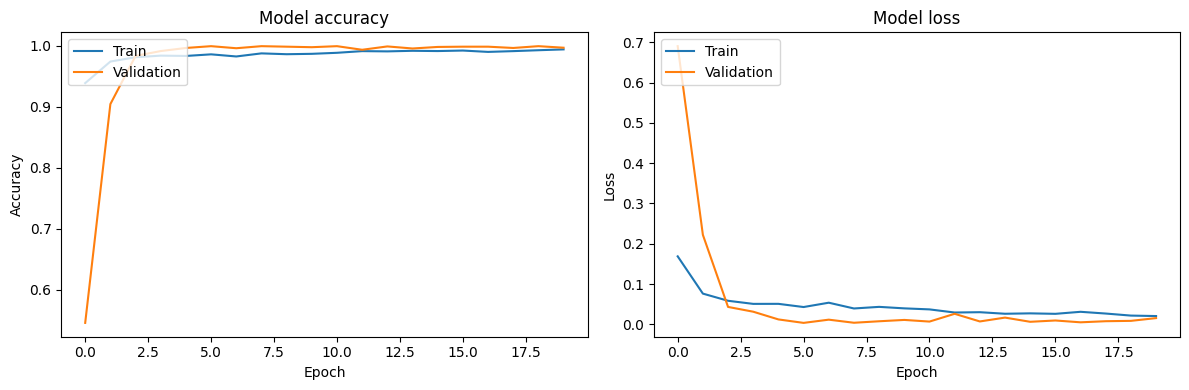

60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step

Epoch 1: val_accuracy improved from -inf to 0.78255, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.78255 to 0.98525, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.98525 to 0.99368, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.99368 to 0.99831, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99831 to 0.99874, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy did not improve from 0.99874

Epoch 7: val_accuracy improved from 0.99874 to 1.00000, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best

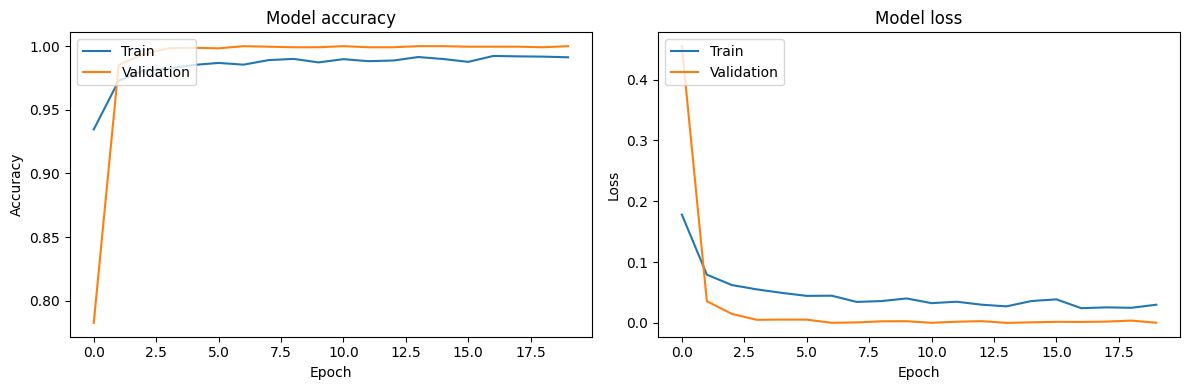

60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step

Epoch 1: val_accuracy improved from -inf to 0.94227, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.94227 to 0.98694, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.98694 to 0.99073, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.99073 to 0.99621, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99621 to 0.99958, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy did not improve from 0.99958

Epoch 7: val_accuracy did not improve from 0.99958

Epoch 8: val_accuracy did not improve from 0.99958

Epoch 9: val_accuracy did not improv

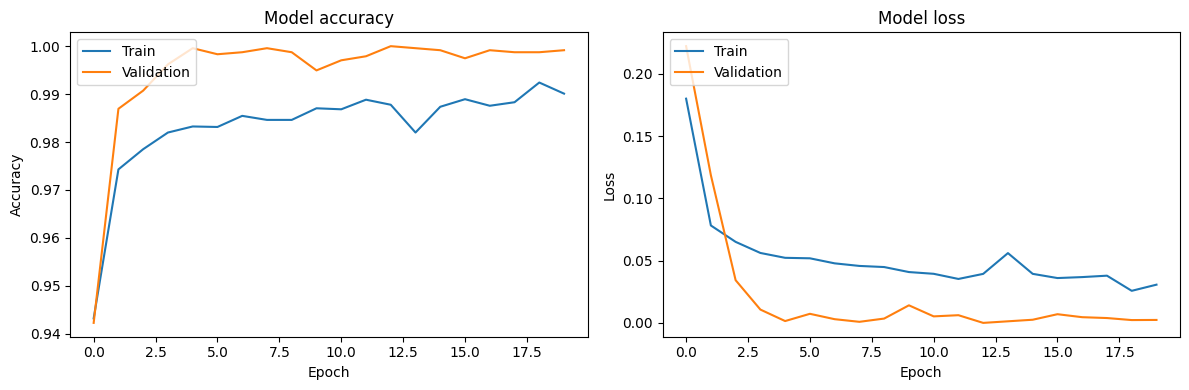

60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step

Epoch 1: val_accuracy improved from -inf to 0.84787, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.84787 to 0.94775, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.94775 to 0.98483, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.98483 to 0.99494, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99494 to 0.99831, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99831 to 0.99958, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy did not improve 

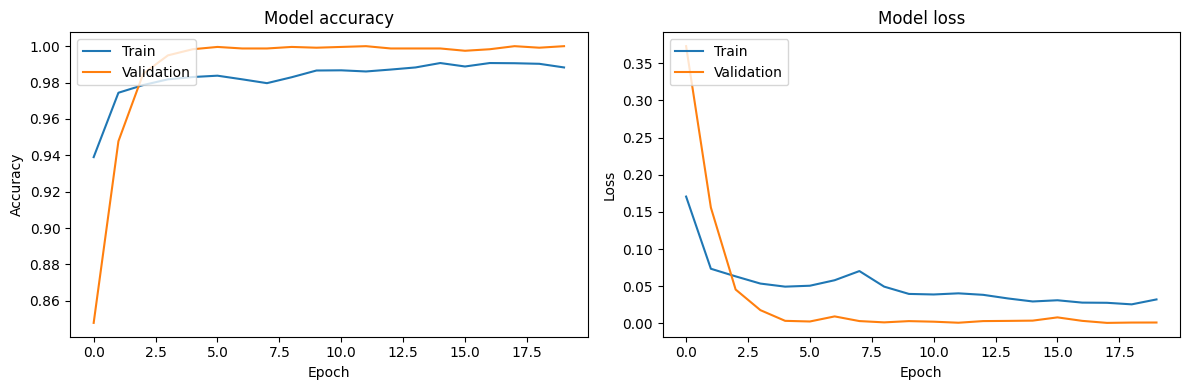

60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step

Epoch 1: val_accuracy improved from -inf to 0.70249, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.70249 to 0.92920, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.92920 to 0.98188, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.98188 to 0.99494, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99494 to 0.99705, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99705 to 0.99958, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy did not improve 

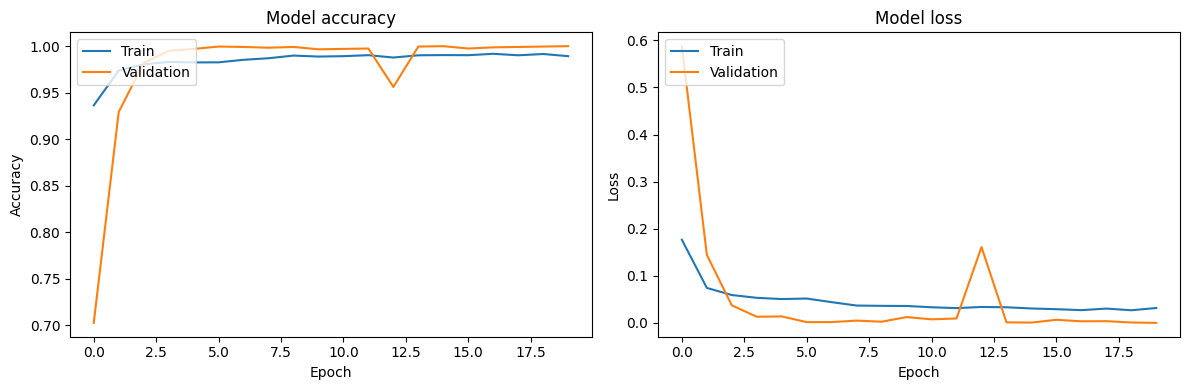

60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step

Epoch 1: val_accuracy improved from -inf to 0.56553, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.56553 to 0.91445, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.91445 to 0.98104, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.98104 to 0.99831, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy did not improve from 0.99831

Epoch 6: val_accuracy improved from 0.99831 to 0.99916, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy improved from 0.99916 to 1.00000, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best

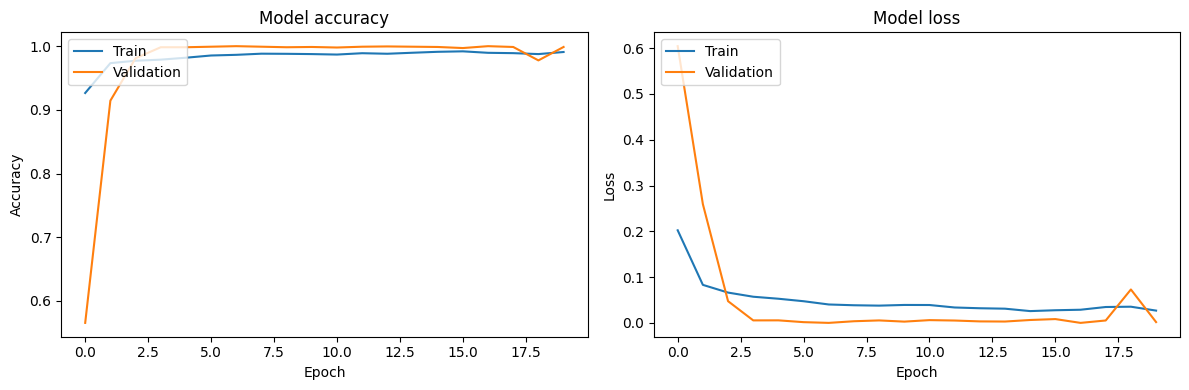

60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step

Epoch 1: val_accuracy improved from -inf to 0.91108, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.91108 to 0.94311, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.94311 to 0.98651, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.98651 to 0.99536, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99536 to 0.99579, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99579 to 0.99747, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy improved from 0.

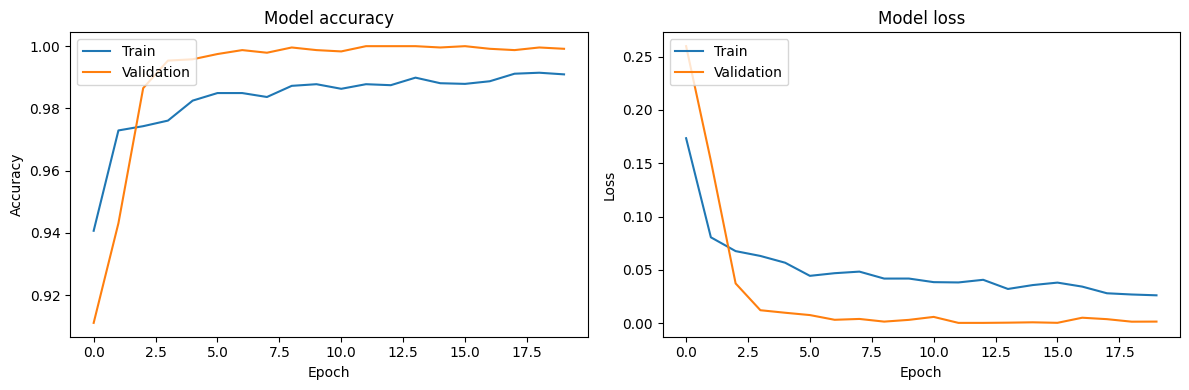

60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 155ms/step
gen	nevals	avg     	std       	min     	max     
0  	10    	0.973599	0.00209796	0.968046	0.976427

Epoch 1: val_accuracy improved from -inf to 0.80657, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.80657 to 0.97556, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.97556 to 0.99241, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.99241 to 0.99579, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99579 to 0.99789, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99789 to 0.99831, saving model to /Users/niecheng/Desk

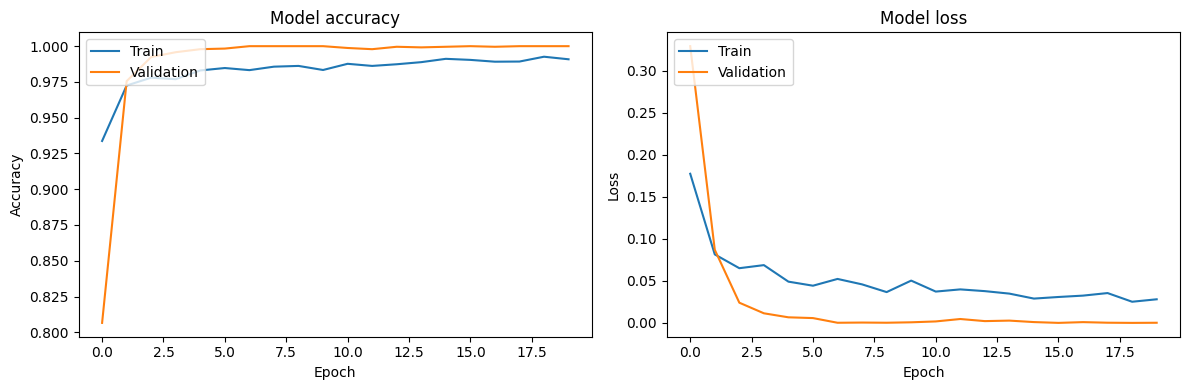

60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step

Epoch 1: val_accuracy improved from -inf to 0.89338, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.89338 to 0.93131, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.93131 to 0.98736, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.98736 to 0.99705, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy did not improve from 0.99705

Epoch 6: val_accuracy improved from 0.99705 to 0.99958, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy did not improve from 0.99958

Epoch 8: val_accuracy did not improve from 0.99958

Epoch 9: val_accuracy did not improv

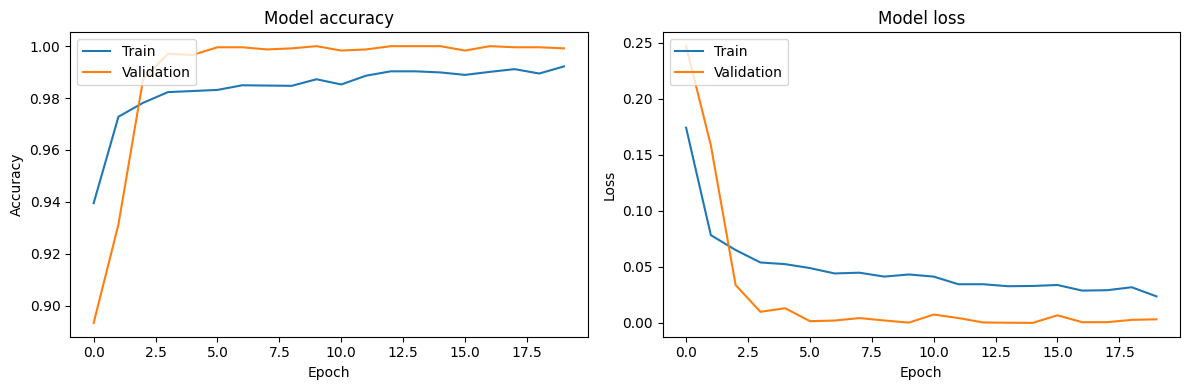

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step

Epoch 1: val_accuracy improved from -inf to 0.61273, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.61273 to 0.94185, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.94185 to 0.99284, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.99284 to 0.99326, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99326 to 0.99747, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99747 to 0.99789, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy did not improve 

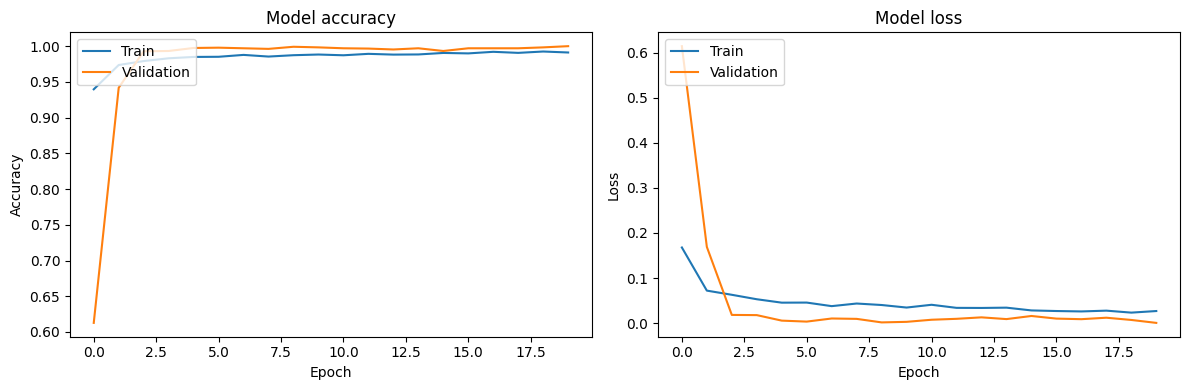

60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step

Epoch 1: val_accuracy improved from -inf to 0.92625, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.92625 to 0.97682, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.97682 to 0.98609, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.98609 to 0.99284, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy did not improve from 0.99284

Epoch 6: val_accuracy improved from 0.99284 to 0.99705, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy improved from 0.99705 to 0.99747, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best

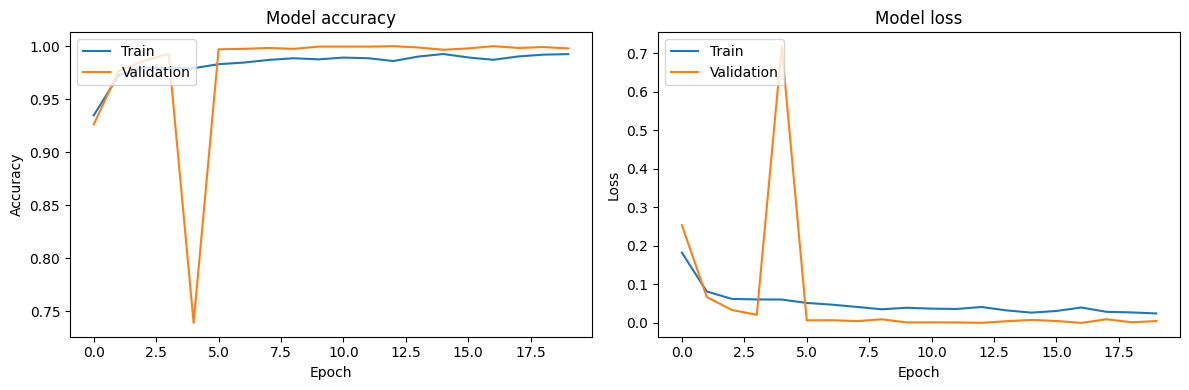

60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step

Epoch 1: val_accuracy improved from -inf to 0.79730, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.79730 to 0.93595, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.93595 to 0.97472, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.97472 to 0.97682, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.97682 to 0.99241, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99241 to 0.99874, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy did not improve 

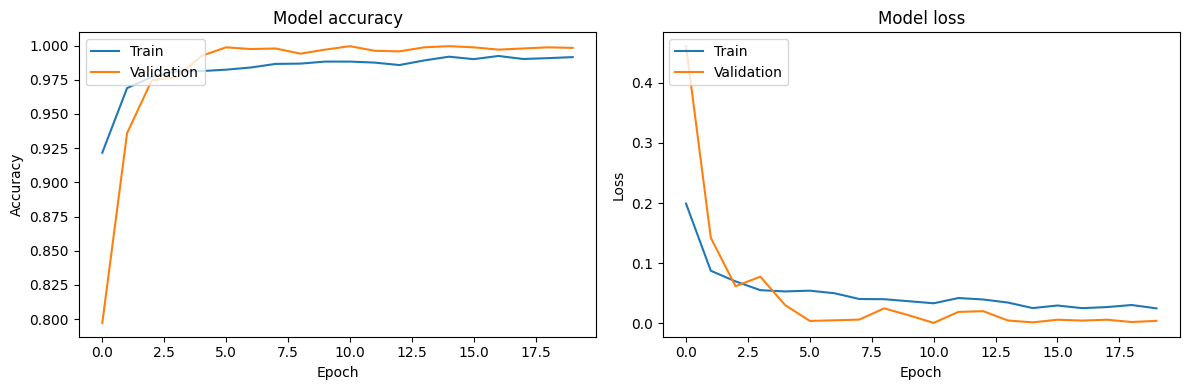

60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step

Epoch 1: val_accuracy improved from -inf to 0.96418, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.96418 to 0.97682, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.97682 to 0.99199, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.99199 to 0.99705, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99705 to 0.99831, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy did not improve from 0.99831

Epoch 7: val_accuracy improved from 0.99831 to 0.99916, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best

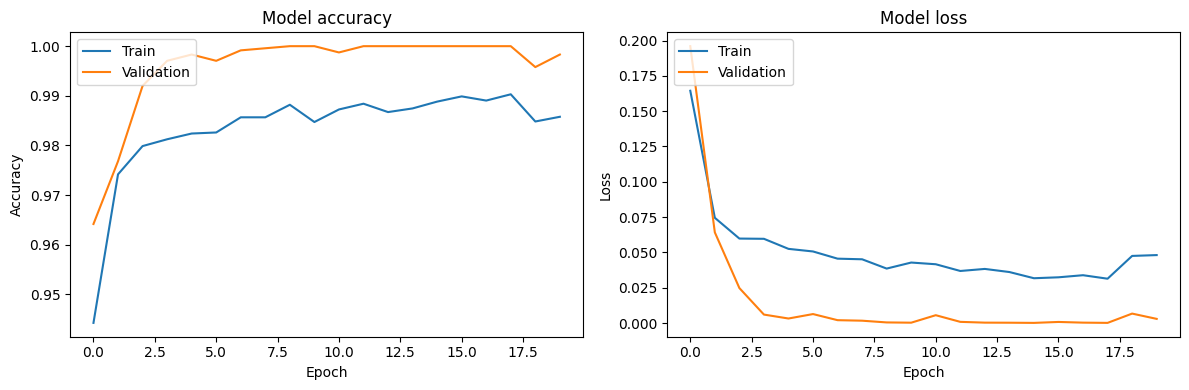

60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step
1  	6     	0.973284	0.00453049	0.960712	0.976951

Epoch 1: val_accuracy improved from -inf to 0.81247, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.81247 to 0.97598, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.97598 to 0.98989, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.98989 to 0.99410, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99410 to 0.99579, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99579 to 0.99747, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_mo

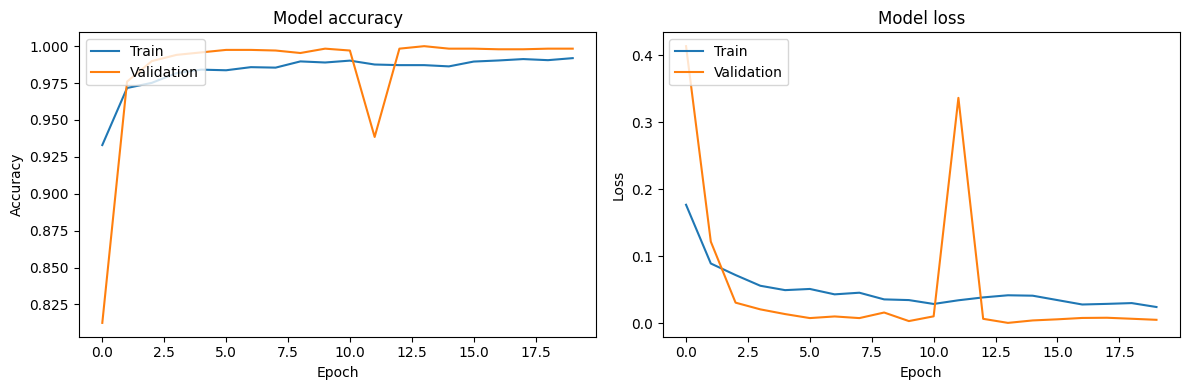

60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step

Epoch 1: val_accuracy improved from -inf to 0.75769, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.75769 to 0.96292, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.96292 to 0.99241, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.99241 to 0.99747, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy did not improve from 0.99747

Epoch 6: val_accuracy improved from 0.99747 to 0.99958, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy did not improve from 0.99958

Epoch 8: val_accuracy did not improve from 0.99958

Epoch 9: val_accuracy did not impro

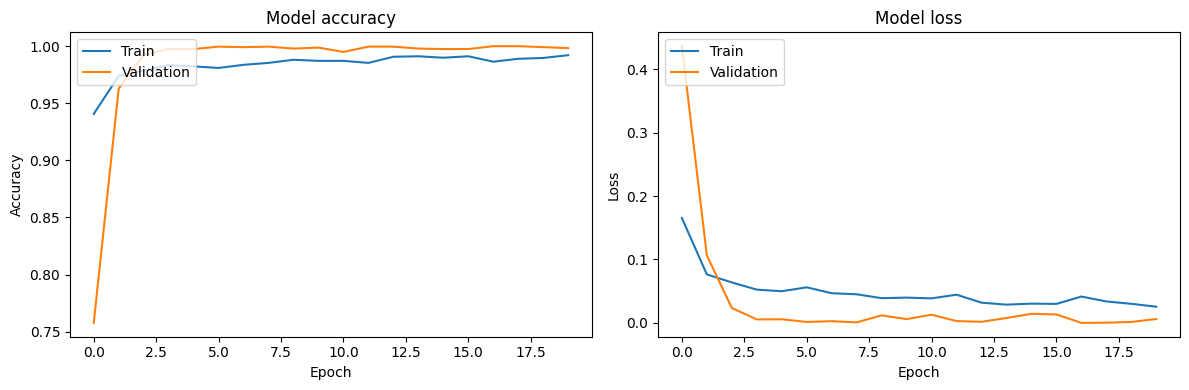

60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step

Epoch 1: val_accuracy improved from -inf to 0.95112, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.95112 to 0.96334, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.96334 to 0.98989, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.98989 to 0.99705, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99705 to 0.99831, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99831 to 0.99916, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy improved from 0

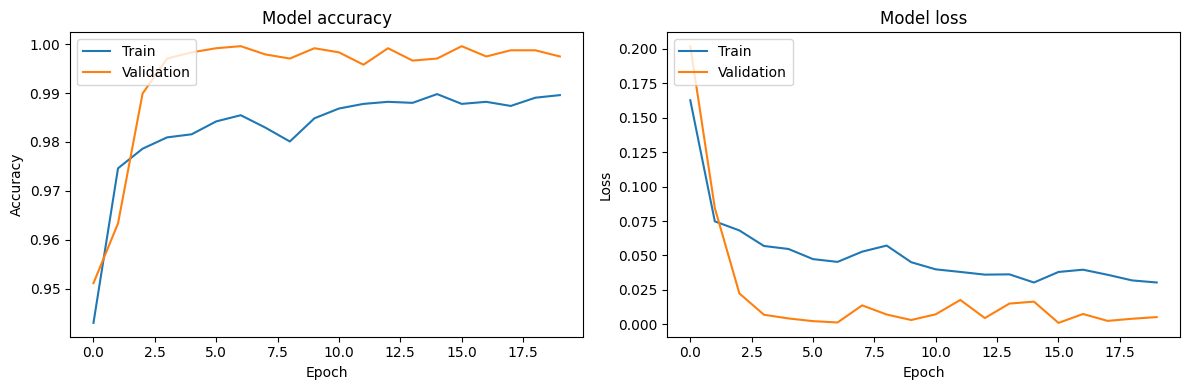

60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step

Epoch 1: val_accuracy improved from -inf to 0.79983, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.79983 to 0.93384, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.93384 to 0.98694, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.98694 to 0.99663, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy did not improve from 0.99663

Epoch 6: val_accuracy improved from 0.99663 to 1.00000, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy did not improve from 1.00000

Epoch 8: val_accuracy did not improve from 1.00000

Epoch 9: val_accuracy did not impro

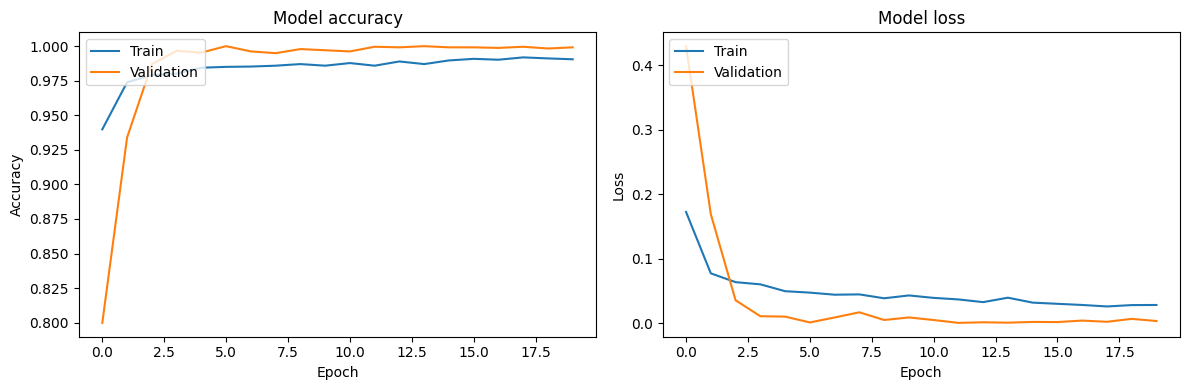

60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step

Epoch 1: val_accuracy improved from -inf to 0.94142, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.94142 to 0.98609, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.98609 to 0.99326, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.99326 to 0.99705, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99705 to 0.99747, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99747 to 0.99916, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy did not improve

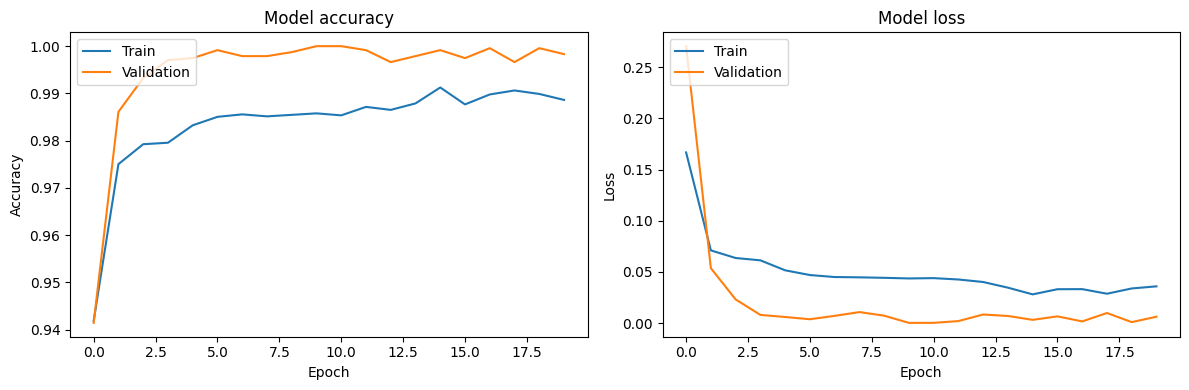

60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step
2  	5     	0.973808	0.00187413	0.970665	0.976951

Epoch 1: val_accuracy improved from -inf to 0.76780, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.76780 to 0.95365, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.95365 to 0.98567, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.98567 to 0.99326, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99326 to 0.99705, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy did not improve from 0.99705

Epoch 7: val_accuracy improved from 0.99705 to 0.99874, saving model to /Users/niecheng/D

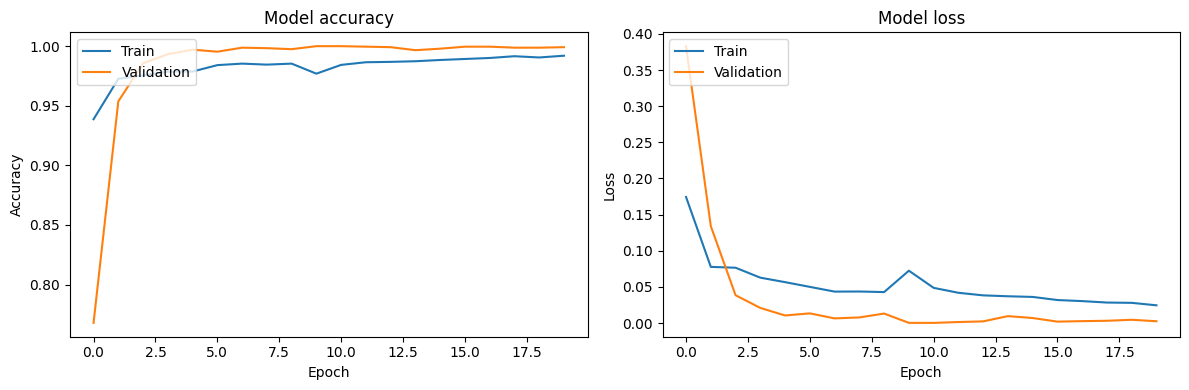

60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step

Epoch 1: val_accuracy improved from -inf to 0.95786, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.95786 to 0.99284, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.99284 to 0.99621, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy did not improve from 0.99621

Epoch 5: val_accuracy did not improve from 0.99621

Epoch 6: val_accuracy improved from 0.99621 to 0.99874, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy did not improve from 0.99874

Epoch 8: val_accuracy improved from 0.99874 to 0.99958, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 9: val_accuracy did not improv

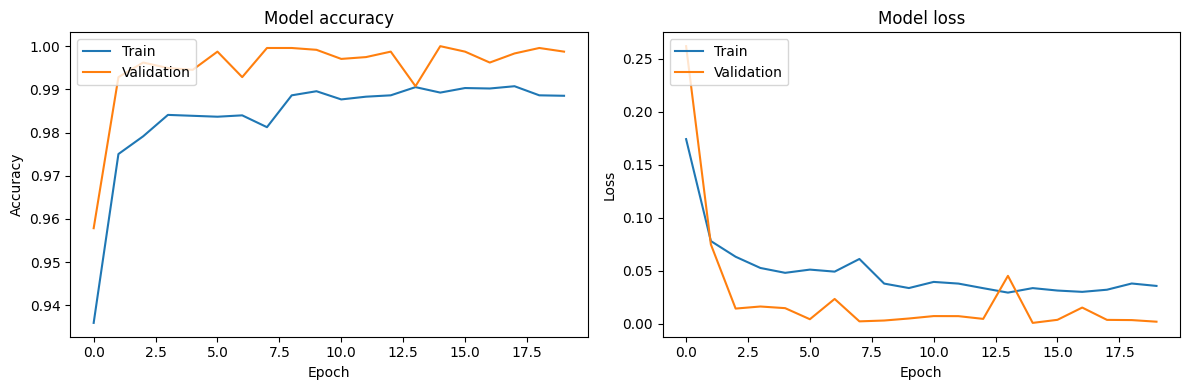

60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step

Epoch 1: val_accuracy improved from -inf to 0.77370, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.77370 to 0.96376, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.96376 to 0.98862, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.98862 to 0.98904, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.98904 to 0.99284, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99284 to 0.99621, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy improved from 

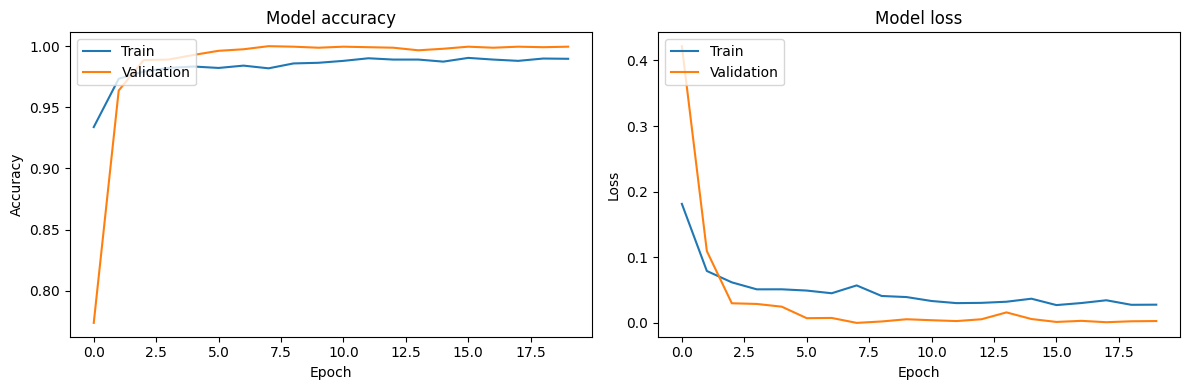

60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step

Epoch 1: val_accuracy improved from -inf to 0.78466, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.78466 to 0.96249, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.96249 to 0.97893, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.97893 to 0.99663, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy did not improve from 0.99663

Epoch 6: val_accuracy did not improve from 0.99663

Epoch 7: val_accuracy improved from 0.99663 to 0.99831, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 8: val_accuracy did not improve from 0.99831

Epoch 9: val_accuracy did not improv

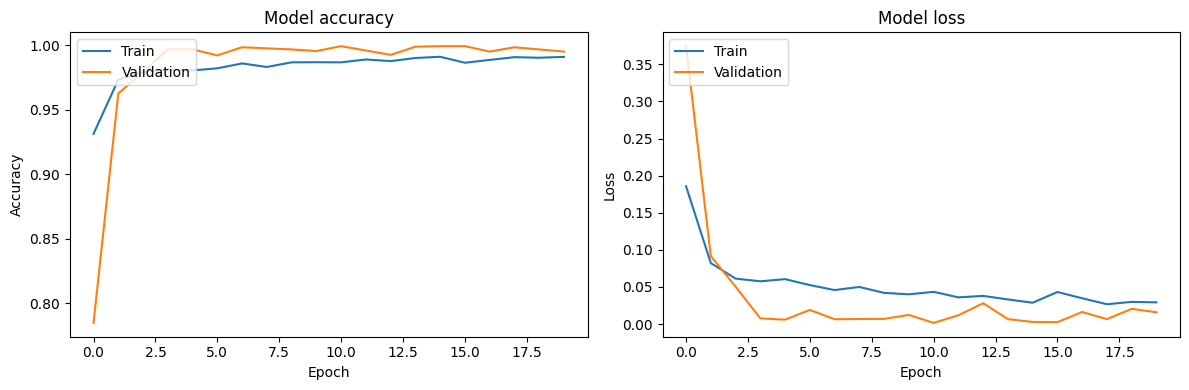

60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step

Epoch 1: val_accuracy improved from -inf to 0.68984, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.68984 to 0.85124, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.85124 to 0.97429, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.97429 to 0.99663, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy did not improve from 0.99663

Epoch 6: val_accuracy improved from 0.99663 to 0.99747, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy improved from 0.99747 to 0.99958, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best

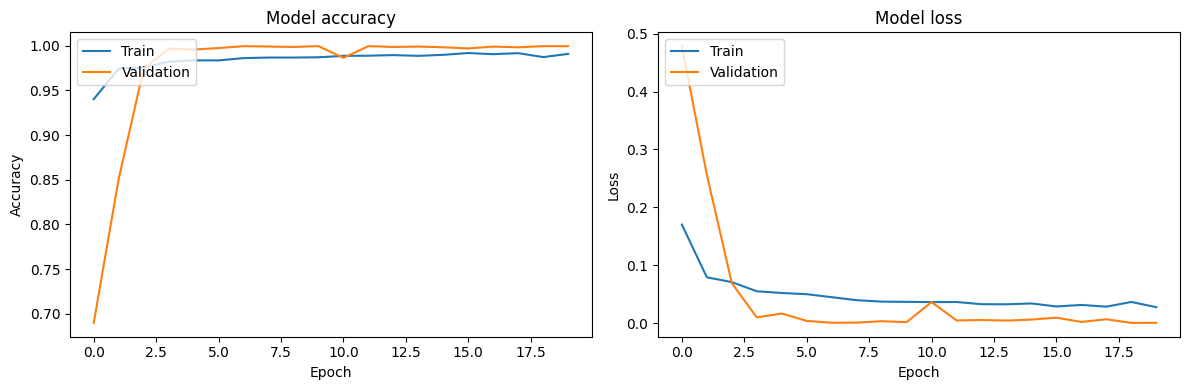

60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step
3  	5     	0.973913	0.00293347	0.967522	0.976951

Epoch 1: val_accuracy improved from -inf to 0.90181, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.90181 to 0.97893, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.97893 to 0.99284, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.99284 to 0.99494, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99494 to 0.99874, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99874 to 0.99916, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_m

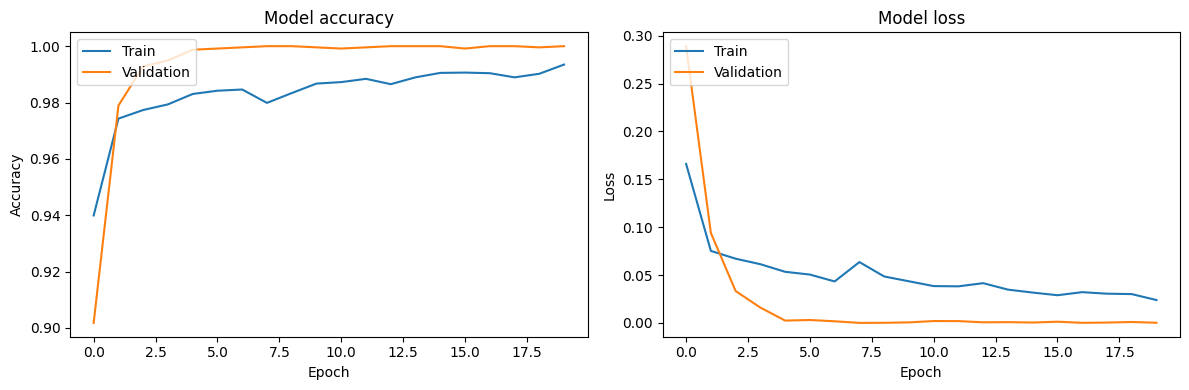

60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step

Epoch 1: val_accuracy improved from -inf to 0.87737, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.87737 to 0.95702, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.95702 to 0.99452, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.99452 to 0.99663, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99663 to 0.99874, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99874 to 1.00000, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy did not improv

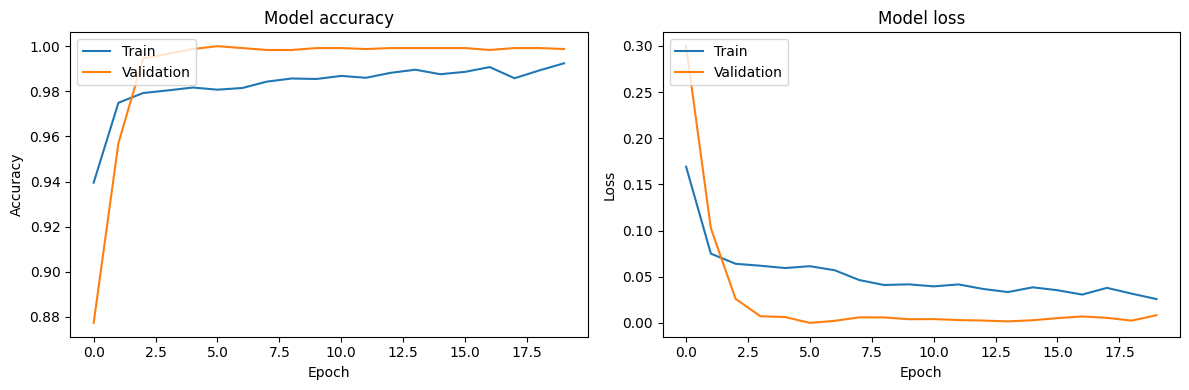

60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step

Epoch 1: val_accuracy improved from -inf to 0.64812, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.64812 to 0.97429, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.97429 to 0.99621, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy did not improve from 0.99621

Epoch 5: val_accuracy improved from 0.99621 to 0.99958, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99958 to 1.00000, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy did not improve from 1.00000

Epoch 8: val_accuracy did not improve from 1.00000

Epoch 9: val_accuracy did not impr

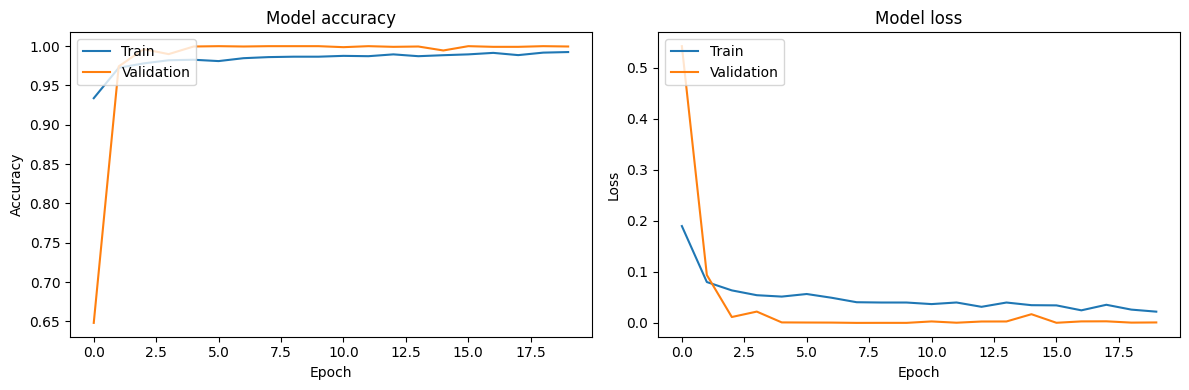

60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step

Epoch 1: val_accuracy improved from -inf to 0.73409, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.73409 to 0.97387, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.97387 to 0.99368, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.99368 to 0.99831, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99831 to 0.99874, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99874 to 1.00000, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy did not improv

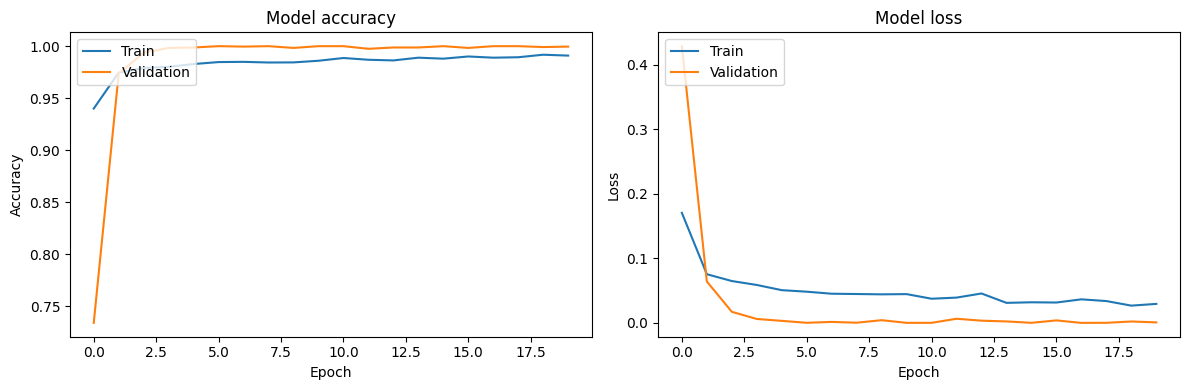

60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step

Epoch 1: val_accuracy improved from -inf to 0.81247, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.81247 to 0.88875, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.88875 to 0.96882, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.96882 to 0.99705, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy did not improve from 0.99705

Epoch 6: val_accuracy improved from 0.99705 to 0.99916, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy improved from 0.99916 to 0.99958, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/be

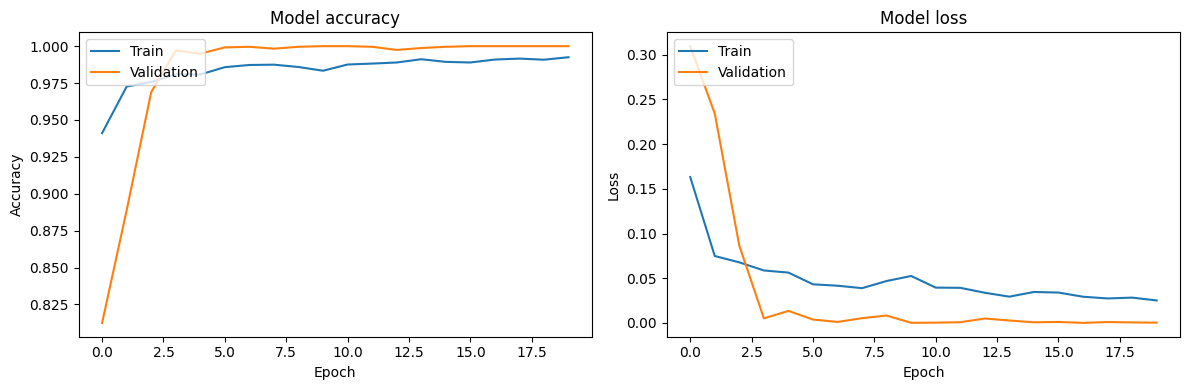

60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 186ms/step
4  	5     	0.973756	0.00364771	0.964379	0.976951

Epoch 1: val_accuracy improved from -inf to 0.99073, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy did not improve from 0.99073

Epoch 3: val_accuracy improved from 0.99073 to 0.99199, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.99199 to 0.99789, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy did not improve from 0.99789

Epoch 6: val_accuracy improved from 0.99789 to 0.99831, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy improved from 0.99831 to 0.99958, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 8: val_accuracy did not improve

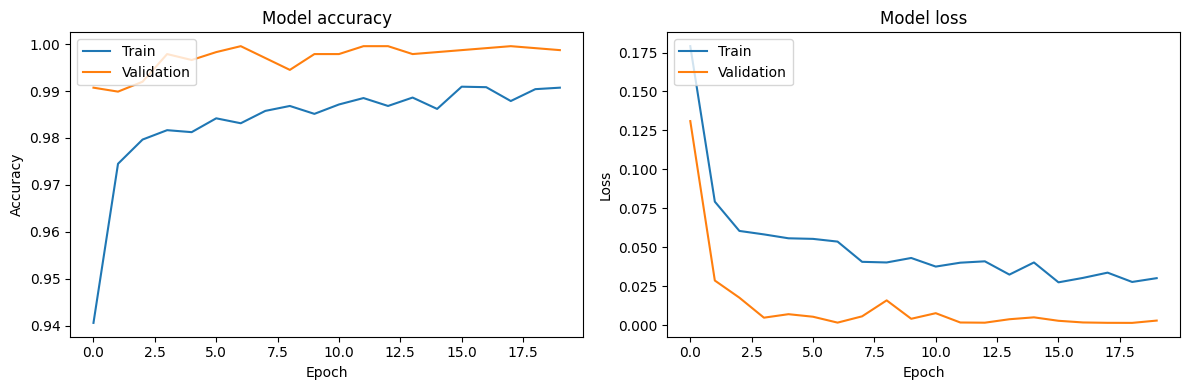

60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step

Epoch 1: val_accuracy improved from -inf to 0.82680, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.82680 to 0.97809, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.97809 to 0.99326, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.99326 to 0.99579, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99579 to 0.99789, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99789 to 0.99831, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy improved from 

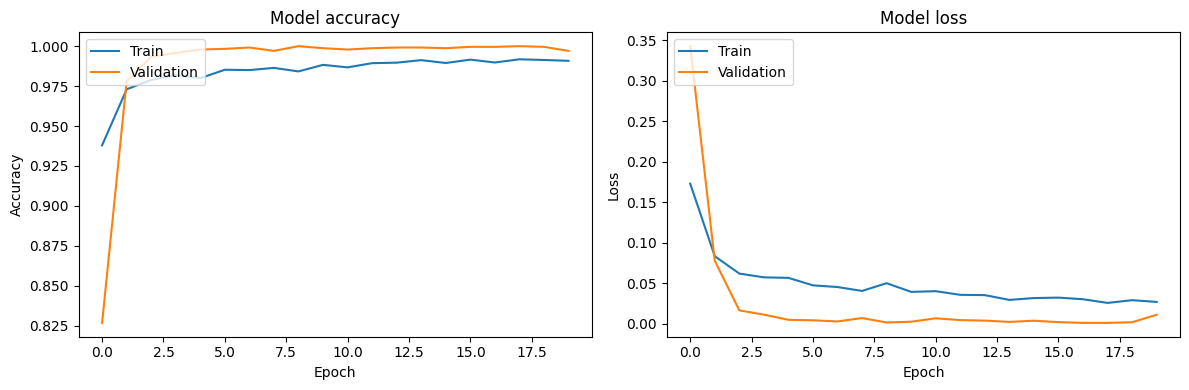

60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 177ms/step

Epoch 1: val_accuracy improved from -inf to 0.88580, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.88580 to 0.94732, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.94732 to 0.99073, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.99073 to 0.99621, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99621 to 0.99831, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy did not improve from 0.99831

Epoch 7: val_accuracy did not improve from 0.99831

Epoch 8: val_accuracy improved from 0.99831 to 0.99916, saving model to /Users/niechen

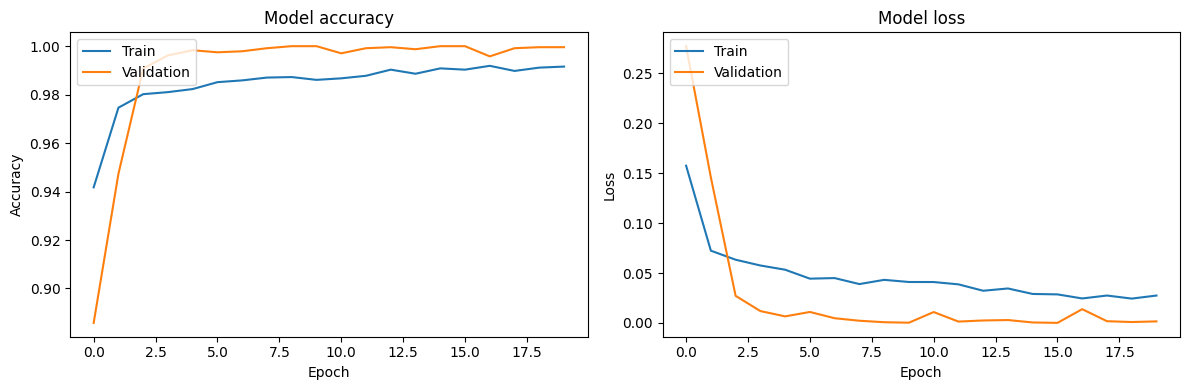

60/60 ━━━━━━━━━━━━━━━━━━━━ 53s 805ms/step

Epoch 1: val_accuracy improved from -inf to 0.89844, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.89844 to 0.96460, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.96460 to 0.98525, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.98525 to 0.99410, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99410 to 0.99705, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy did not improve from 0.99705

Epoch 7: val_accuracy did not improve from 0.99705

Epoch 8: val_accuracy improved from 0.99705 to 1.00000, saving model to /Users/niechen

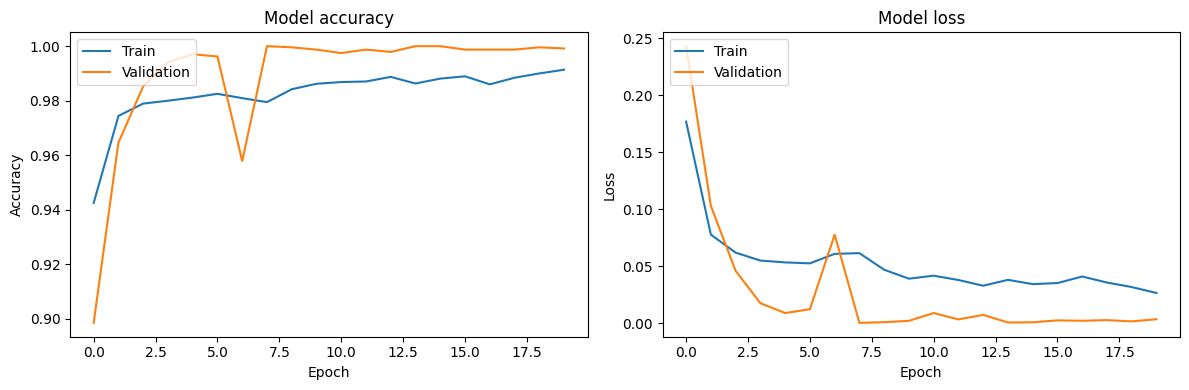

60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step

Epoch 1: val_accuracy improved from -inf to 0.83818, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.83818 to 0.97472, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.97472 to 0.99663, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy improved from 0.99663 to 0.99958, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 5: val_accuracy improved from 0.99958 to 1.00000, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy did not improve from 1.00000

Epoch 7: val_accuracy did not improve from 1.00000

Epoch 8: val_accuracy did not improve from 1.00000

Epoch 9: val_accuracy did not impr

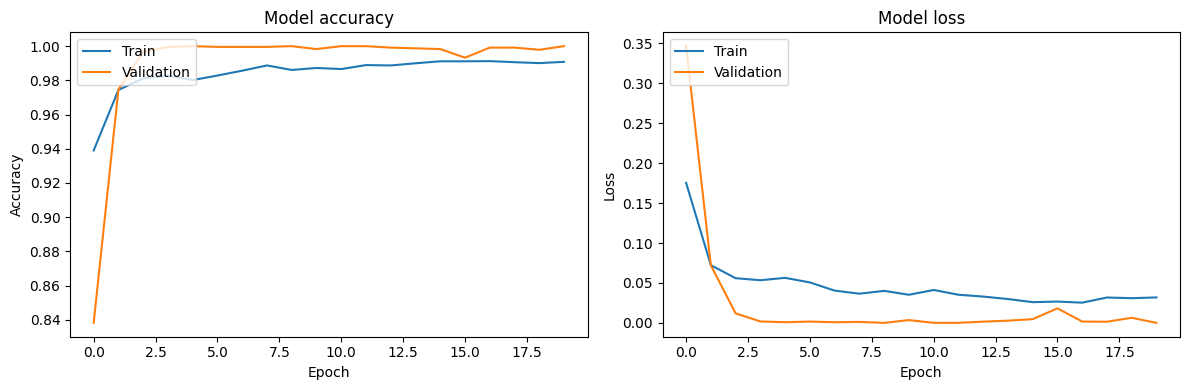

60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step

Epoch 1: val_accuracy improved from -inf to 0.70544, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 2: val_accuracy improved from 0.70544 to 0.96418, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 3: val_accuracy improved from 0.96418 to 0.98820, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 4: val_accuracy did not improve from 0.98820

Epoch 5: val_accuracy improved from 0.98820 to 0.99831, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 6: val_accuracy improved from 0.99831 to 0.99958, saving model to /Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras

Epoch 7: val_accuracy did not improve from 0.99958

Epoch 8: val_accuracy did not improve from 0.99958

Epoch 9: val_accuracy did not impr

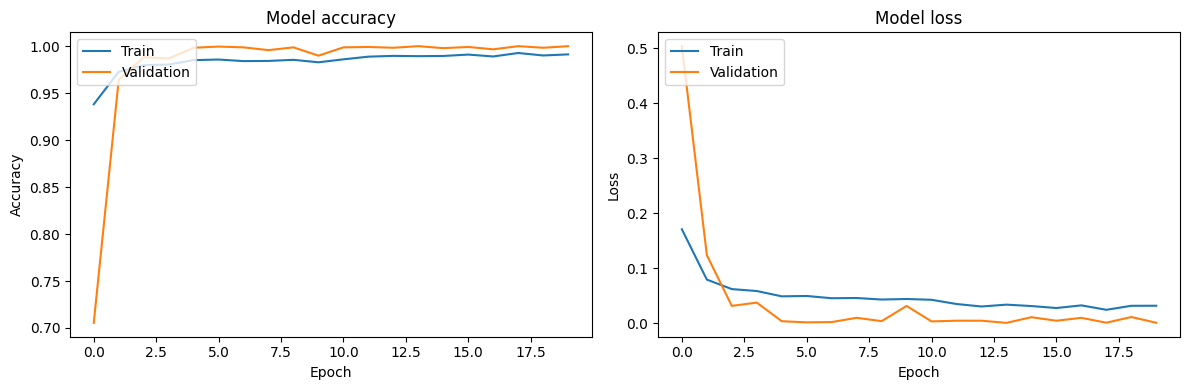

60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 137ms/step
5  	6     	0.97407 	0.0025902 	0.970141	0.976951
Best individual is:  [44.228460725908285, 0.3491230914566316, 512.0]
With fitness:  0.9769512833944474
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 161ms/step
Final Accuracy:  0.9706652697747512


In [59]:
# Set random seeds for reproducibility
random.seed(5012)
np.random.seed(5012)
tf.random.set_seed(5012)

# Define the residual block and resnet model
def residual_block(x, filters, kernel_size=3, strides=1, use_1x1conv=False):
    y = Conv1D(filters, kernel_size, strides=strides, padding='same')(x)
    y = BatchNormalization()(y)
    y = ReLU()(y)
    y = Conv1D(filters, kernel_size=3, strides=1, padding='same')(y)
    y = BatchNormalization()(y)
    
    if use_1x1conv:
        x = Conv1D(filters, kernel_size=1, strides=strides, padding='same')(x)
    y = Add()([y, x])
    return ReLU()(y)

def resnet_1D_base_model(dataset_input_shape, num_filters, dropout_rate, dense_units):
    inputs = Input(shape=(dataset_input_shape, 1))

    # First Conv Layer
    x = Conv1D(num_filters, kernel_size=7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv1D(num_filters, kernel_size=3, strides=2, padding='same')(x)

    # ResNet Blocks
    for i in range(4):
        x = residual_block(x, num_filters * (2 ** i), strides=2, use_1x1conv=True)
        x = residual_block(x, num_filters * (2 ** i))

    # Global Average Pooling
    x = GlobalAveragePooling1D()(x)
    x = Flatten()(x)
    x = Dense(dense_units, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(dense_units, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    base_model = Model(inputs, outputs)
    return base_model

# Define the fitness function for GA
def fitness_function(individual):
    num_filters, dropout_rate, dense_units = individual
    
    # Ensure hyperparameters are in valid ranges
    num_filters = int(num_filters)
    dropout_rate = max(0, min(1, dropout_rate))
    dense_units = int(dense_units)
    
    # Build and compile the model
    model = resnet_1D_base_model(X_train_wgan_gp_resnet1D_input, num_filters, dropout_rate, dense_units)
    model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])
    
    # Define the model checkpoint callback
    checkpoint_path = "/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras"
    checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    # Define the history callback
    history = History()

    # Train the model
    history = model.fit(X_train_wgan_gp_resnet1D, y_train_wgan_gp_generated, epochs=20, batch_size=128, validation_split=0.2, verbose=0, callbacks=[checkpoint, history])
    
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Evaluate the model
    y_pred = (model.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy,

# Setup GA with the new ranges
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int_filters", random.choice, [32, 48, 64])  # num_filters fine-tuning
toolbox.register("attr_float_dropout", random.choice, [0.25, 0.3, 0.35, 0.4])  # dropout_rate fine-tuning
toolbox.register("attr_int_dense", random.choice, [512, 1024])  # dense_units fine-tuning

toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_int_filters, toolbox.attr_float_dropout, toolbox.attr_int_dense), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded, low=[32, 0.25, 512], up=[64, 0.4, 1024], eta=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness_function)

# Initialize population
random.seed(5012)
population = toolbox.population(n=10)

# Define statistics and run GA
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# Run GA
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=5, stats=stats, halloffame=hof, verbose=True)

# Output best individual
print("Best individual is: ", hof[0])
print("With fitness: ", hof[0].fitness.values[0])

# Load and evaluate the best model
best_model = resnet_1D_base_model(X_train_wgan_gp_resnet1D_input, int(hof[0][0]), hof[0][1], int(hof[0][2]))
best_model.load_weights("/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/best_model.keras")
best_model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])
y_pred = (best_model.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
final_accuracy = accuracy_score(y_test, y_pred)
print("Final Accuracy: ", final_accuracy)


### Compare with CNN model 

In [120]:
# Use the function to build the base CNN model
def cnn_base_model(dataset_input_shape):
    # Structure followed by the 2022 - XAI DL approach for detecting money laundering transactions in banking system
    base_model = Sequential()
    
    # First Conv1D Layer
    base_model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(dataset_input_shape, 1)))
    base_model.add(BatchNormalization())
    base_model.add(Dropout(0.3))
    
    # Second Conv1D Layer
    base_model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    base_model.add(BatchNormalization())
    base_model.add(Dropout(0.3))
    
    # Third Conv1D Layer
    base_model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
    base_model.add(BatchNormalization())
    base_model.add(Dropout(0.3))
    
    # Flatten Layer
    base_model.add(Flatten())
    base_model.add(Dropout(0.3))
    
    # First Dense Layer
    base_model.add(Dense(units=512, activation='relu'))
    base_model.add(Dropout(0.3))
    
    # Output Layer
    base_model.add(Dense(units=1, activation='sigmoid'))

    return base_model

In [134]:
### CNN + WGAN-GP
# Reshape the input data to fit the Conv1D layer
X_train_wgan_gp_cnn = np.expand_dims(X_train_wgan_gp_generated, axis=2)
X_test_normalized_cnn = np.expand_dims(X_test_normalized, axis=2)

X_train_wgan_gp_cnn_input = X_train_wgan_gp_cnn.shape[1]

cnn_wgan_gp = cnn_base_model(X_train_wgan_gp_cnn_input)

# Compile the model
cnn_wgan_gp.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

start_time = time.time()
# Training the model
history = cnn_wgan_gp.fit(X_train_wgan_gp_cnn, y_train_wgan_gp_generated, epochs=10, batch_size=128, validation_split=0.2)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 55s 337ms/step - accuracy: 0.8856 - loss: 0.3556 - val_accuracy: 0.8896 - val_loss: 0.2956
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9572 - loss: 0.1334 - val_accuracy: 0.9469 - val_loss: 0.1692
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9680 - loss: 0.1009 - val_accuracy: 0.9515 - val_loss: 0.1018
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9700 - loss: 0.0946 - val_accuracy: 0.9933 - val_loss: 0.0216
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9689 - loss: 0.0921 - val_accuracy: 0.9987 - val_loss: 0.0030
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9731 - loss: 0.0824 - val_accuracy: 0.9987 - val_loss: 0.0033
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9724 - loss: 0.0772 - val_accuracy: 0.9983 - val_loss: 0.0045
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9737 - loss: 0.0762 - val_accuracy: 0.9987 -

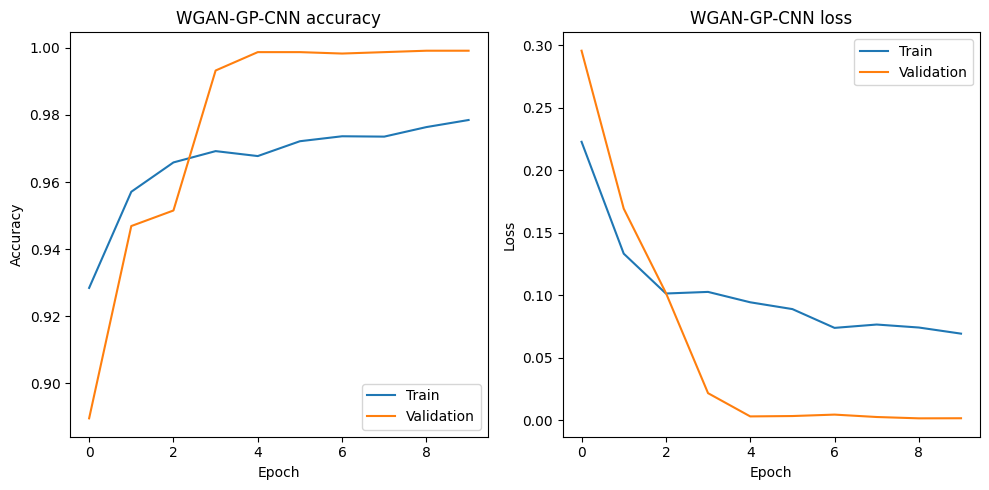

In [135]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('WGAN-GP-CNN accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('WGAN-GP-CNN loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

### Compare with LSTM model 

In [142]:
### ResNet 1D + WGAN-GP
y_pred_resnet1D_wgan_gp = (resnet1D_wgan_gp.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of WGAN-GP and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_wgan_gp))
print(classification_report(y_test, y_pred_resnet1D_wgan_gp))

60/60 ━━━━━━━━━━━━━━━━━━━━ 25s 239ms/step
Accuracy of WGAN-GP and ResNet1D: 0.9727606076479832
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1495
         1.0       0.93      0.94      0.94       414

    accuracy                           0.97      1909
   macro avg       0.96      0.96      0.96      1909
weighted avg       0.97      0.97      0.97      1909



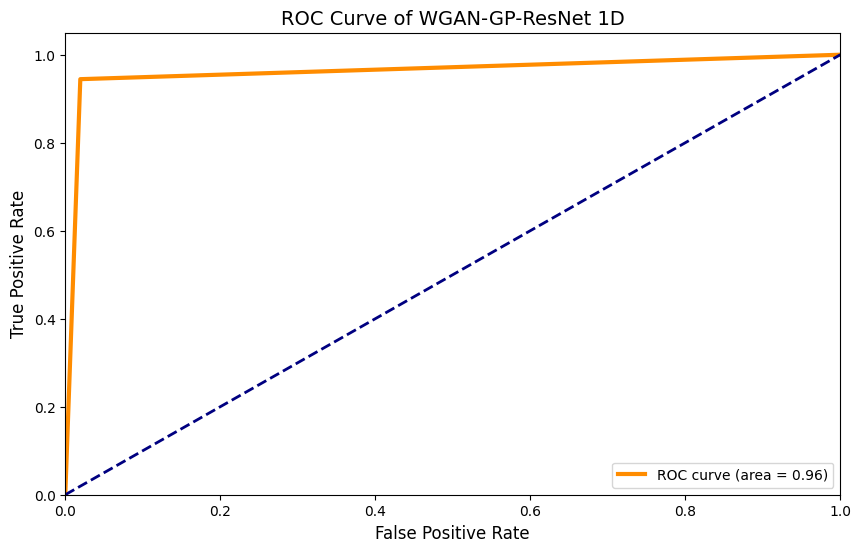

In [145]:
fpr, tpr, _ = roc_curve(y_test, y_pred_resnet1D_wgan_gp)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve of WGAN-GP-ResNet 1D', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.savefig('roc_curve_wgan_gp_resnet1d.png', dpi=300, bbox_inches='tight')
plt.show()

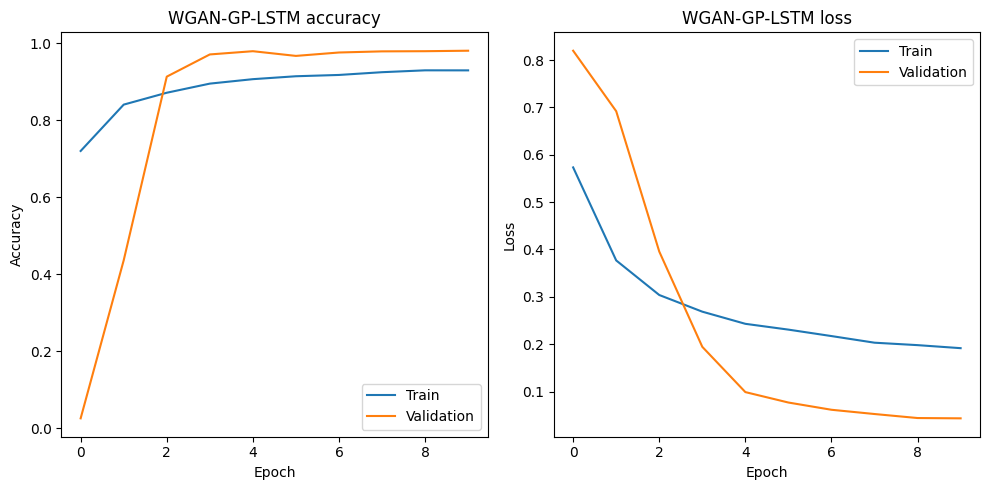

In [133]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('WGAN-GP-LSTM accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('WGAN-GP-LSTM loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [132]:
### LSTM + WGAN-GP
X_train_wgan_gp_lstm = np.expand_dims(X_train_wgan_gp_generated, axis=2)
X_test_normalized_lstm = np.expand_dims(X_test_normalized, axis=2)

X_train_wgan_gp_lstm_input = X_train_wgan_gp_lstm.shape[1]

lstm_wgan_gp = lstm_base_model(X_train_wgan_gp_lstm_input)

# Compile the model
lstm_wgan_gp.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

start_time = time.time()

# Training the model
history = lstm_wgan_gp.fit(X_train_wgan_gp_lstm, y_train_wgan_gp_generated, epochs=10, batch_size=128, validation_split=0.2)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.6166 - loss: 0.7300 - val_accuracy: 0.0253 - val_loss: 0.8196
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.8280 - loss: 0.3993 - val_accuracy: 0.4362 - val_loss: 0.6919
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8658 - loss: 0.3223 - val_accuracy: 0.9136 - val_loss: 0.3955
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.8913 - loss: 0.2815 - val_accuracy: 0.9713 - val_loss: 0.1943
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9064 - loss: 0.2524 - val_accuracy: 0.9798 - val_loss: 0.0987
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9126 - loss: 0.2317 - val_accuracy: 0.9676 - val_loss: 0.0767
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9145 - loss: 0.2239 - val_accuracy: 0.9764 - val_loss: 0.0614
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9239 - loss: 0.2079 - val_accuracy: 0.9794 - v

In [141]:
### ResNet 1D + WGAN-GP
X_train_wgan_gp_resnet1D = np.expand_dims(X_train_wgan_gp_generated, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)

X_train_wgan_gp_resnet1D_input = X_train_wgan_gp_resnet1D.shape[1]

resnet1D_wgan_gp = resnet_1D_base_model(X_train_wgan_gp_resnet1D_input)

# Compile the model
resnet1D_wgan_gp.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

start_time = time.time()

# Training the model
history = resnet1D_wgan_gp.fit(X_train_wgan_gp_resnet1D, y_train_wgan_gp_generated, epochs=10, batch_size=128, validation_split=0.2)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 333s 3s/step - accuracy: 0.9072 - loss: 0.2507 - val_accuracy: 0.9869 - val_loss: 0.0380
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.9755 - loss: 0.0800 - val_accuracy: 0.9878 - val_loss: 0.0284
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.9794 - loss: 0.0682 - val_accuracy: 0.9954 - val_loss: 0.0132
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.9831 - loss: 0.0548 - val_accuracy: 0.9971 - val_loss: 0.0071
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.9830 - loss: 0.0530 - val_accuracy: 0.9987 - val_loss: 0.0043
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.9855 - loss: 0.0475 - val_accuracy: 0.9987 - val_loss: 0.0044
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.9838 - loss: 0.0485 - val_accuracy: 0.9983 - val_loss: 0.0043
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.9837 - loss: 0.0527 - val_accuracy: 0.9987 - val_

In [ ]:
# 1308.5810260772705 seconds

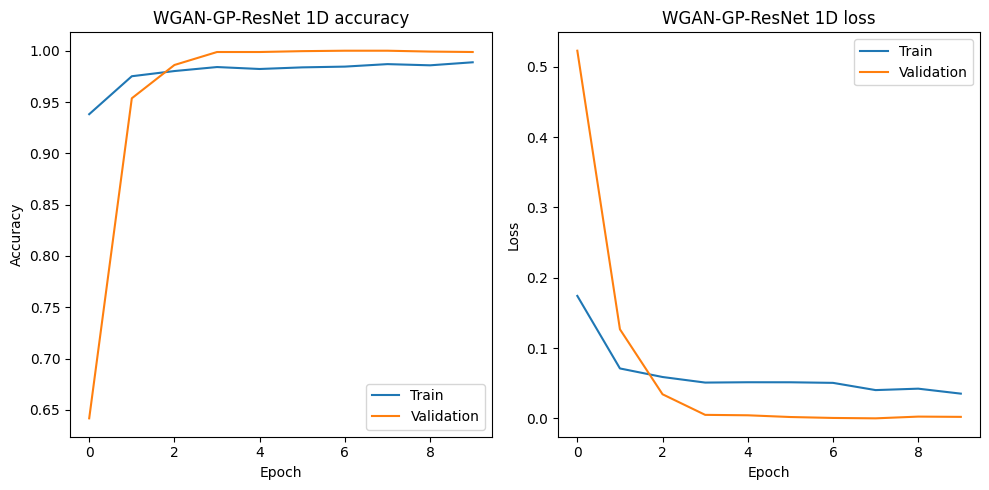

In [131]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('WGAN-GP-ResNet 1D accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('WGAN-GP-ResNet 1D loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

### ResNet 1D + ROS see this one

In [116]:
### ResNet 1D + ROS
X_train_ros_resnet1D = np.expand_dims(X_train_ros, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)

X_train_ros_resnet1D_input = X_train_ros_resnet1D.shape[1]

resnet1D_ros = resnet_1D_base_model(X_train_ros_resnet1D_input)

# Compile the model
resnet1D_ros.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

start_time = time.time()

# Training the model
history = resnet1D_ros.fit(X_train_ros_resnet1D, y_train_ros, epochs=10, batch_size=128, validation_split=0.2)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - accuracy: 0.8815 - loss: 0.3311 - val_accuracy: 0.8108 - val_loss: 0.4155
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.9686 - loss: 0.0874 - val_accuracy: 0.9258 - val_loss: 0.1973
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.9717 - loss: 0.0822 - val_accuracy: 0.9650 - val_loss: 0.0840
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9767 - loss: 0.0679 - val_accuracy: 0.9570 - val_loss: 0.1016
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.9774 - loss: 0.0594 - val_accuracy: 0.9747 - val_loss: 0.0671
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.9814 - loss: 0.0545 - val_accuracy: 0.9827 - val_loss: 0.0593
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9829 - loss: 0.0518 - val_accuracy: 0.9718 - val_loss: 0.0848
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9848 - loss: 0.0475 - val_accuracy: 0.9494 - v

In [95]:
### ResNet 1D + ROS
y_pred_resnet1D_ros = (resnet1D_ros.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of ROS and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_ros))
print(classification_report(y_test, y_pred_resnet1D_ros))

60/60 ━━━━━━━━━━━━━━━━━━━━ 29s 239ms/step
Accuracy of ROS and ResNet1D: 0.9711891042430592
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1495
         1.0       0.94      0.93      0.93       414

    accuracy                           0.97      1909
   macro avg       0.96      0.95      0.96      1909
weighted avg       0.97      0.97      0.97      1909



In [96]:
# All evaluations:
print("Precision of ROS and ResNet 1D:", precision_score(y_test, y_pred_resnet1D_ros))
print("Recall of ROS and ResNet 1D:", recall_score(y_test, y_pred_resnet1D_ros))
print("F1 Score of ROS and ResNet 1D:", f1_score(y_test, y_pred_resnet1D_ros))
print("AUC of ROS and ResNet 1D:", roc_auc_score(y_test, y_pred_resnet1D_ros))

Precision of ROS and ResNet 1D: 0.941031941031941
Recall of ROS and ResNet 1D: 0.9251207729468599
F1 Score of ROS and ResNet 1D: 0.9330085261875761
AUC of ROS and ResNet 1D: 0.9545336306205873


### Continue the optimized process, this is the best reuslt 

In [99]:
# Build the ResNet 1D from scratch, create the residual block first
def residual_block(x, filters, kernel_size=3, strides=1, use_1x1conv=False):
    y = Conv1D(filters, kernel_size, strides=strides, padding='same')(x)
    y = BatchNormalization()(y)
    y = ReLU()(y)
    y = Conv1D(filters, kernel_size, strides=1, padding='same')(y)
    y = BatchNormalization()(y)
    
    if use_1x1conv:
        x = Conv1D(filters, kernel_size=1, strides=strides, padding='same')(x)
    y = Add()([y, x])
    return ReLU()(y)

def resnet_1D_base_model(dataset_input_shape):

    inputs = Input(shape=(dataset_input_shape,1))

    # First Conv Layer
    x = Conv1D(32, kernel_size=7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv1D(32, kernel_size=3, strides=2, padding='same')(x)

    # First ResNet Block
    x = residual_block(x, 64, use_1x1conv=True)
    x = residual_block(x, 64)

    # Second ResNet Block
    x = residual_block(x, 128, strides=2, use_1x1conv=True)
    x = residual_block(x, 128)

    # Third ResNet Block
    x = residual_block(x, 256, strides=2, use_1x1conv=True)
    x = residual_block(x, 256)

    # Fourth ResNet Block
    x = residual_block(x, 512, strides=2, use_1x1conv=True)
    x = residual_block(x, 512)

    # Global Average Pooling
    x = GlobalAveragePooling1D()(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.35)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.35)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    base_model = Model(inputs, outputs)
    return base_model

In [100]:
### ResNet 1D + WGAN-GP
X_train_wgan_gp_resnet1D = np.expand_dims(X_train_wgan_gp_generated, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)

X_train_wgan_gp_resnet1D_input = X_train_wgan_gp_resnet1D.shape[1]

resnet1D_wgan_gp = resnet_1D_base_model(X_train_wgan_gp_resnet1D_input)

# Compile the model
resnet1D_wgan_gp.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = resnet1D_wgan_gp.fit(X_train_wgan_gp_resnet1D, y_train_wgan_gp_generated, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 352s 3s/step - accuracy: 0.9022 - loss: 0.2580 - val_accuracy: 0.9440 - val_loss: 0.1478
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.9726 - loss: 0.0823 - val_accuracy: 0.9760 - val_loss: 0.0586
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1569s 21s/step - accuracy: 0.9809 - loss: 0.0634 - val_accuracy: 0.9945 - val_loss: 0.0107
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.9837 - loss: 0.0564 - val_accuracy: 0.9966 - val_loss: 0.0128
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.9824 - loss: 0.0614 - val_accuracy: 0.9992 - val_loss: 0.0021
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9838 - loss: 0.0516 - val_accuracy: 0.9996 - val_loss: 4.8079e-04
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9849 - loss: 0.0444 - val_accuracy: 1.0000 - val_loss: 5.1195e-04
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.9838 - loss: 0.0491 - val_accuracy: 

In [101]:
### ResNet 1D + WGAN-GP
y_pred_resnet1D_wgan_gp = (resnet1D_wgan_gp.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of WGAN-GP and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_wgan_gp))
print(classification_report(y_test, y_pred_resnet1D_wgan_gp))

60/60 ━━━━━━━━━━━━━━━━━━━━ 30s 257ms/step
Accuracy of WGAN-GP and ResNet1D: 0.9785227867993714
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1495
         1.0       0.98      0.92      0.95       414

    accuracy                           0.98      1909
   macro avg       0.98      0.96      0.97      1909
weighted avg       0.98      0.98      0.98      1909



In [102]:
# All evaluations:
print("Precision of WGAN-GP and ResNet 1D:", precision_score(y_test, y_pred_resnet1D_wgan_gp))
print("Recall of WGAN-GP and ResNet 1D:", recall_score(y_test, y_pred_resnet1D_wgan_gp))
print("F1 Score of WGAN-GP and ResNet 1D:", f1_score(y_test, y_pred_resnet1D_wgan_gp))
print("AUC of WGAN-GP and ResNet 1D:", roc_auc_score(y_test, y_pred_resnet1D_wgan_gp))

Precision of WGAN-GP and ResNet 1D: 0.9769820971867008
Recall of WGAN-GP and ResNet 1D: 0.9227053140096618
F1 Score of WGAN-GP and ResNet 1D: 0.9490683229813665
AUC of WGAN-GP and ResNet 1D: 0.9583426235600149


In [ ]:
# 64 64 1024 256 0.4 0.4 0.97223677
# 48 48 512 512 0.35 0.35 0.9732844421162913 0.93788
# 48 48 1024 512 0.35 0.35 0.9759036144578314 f1:0.9441747572815534 Precision:0.948780487804878 recall: 0.9396135265700483 AUC:0.9627833519137866
# 32 32 512 512 0.35 0.35 0.9785227867993714

In [81]:
# All evaluations:
print("Precision of WGAN-GP and ResNet 1D:", precision_score(y_test, y_pred_resnet1D_wgan_gp))
print("Recall of WGAN-GP and ResNet 1D:", recall_score(y_test, y_pred_resnet1D_wgan_gp))
print("F1 Score of WGAN-GP and ResNet 1D:", f1_score(y_test, y_pred_resnet1D_wgan_gp))
print("AUC of WGAN-GP and ResNet 1D:", roc_auc_score(y_test, y_pred_resnet1D_wgan_gp))

Precision of WGAN-GP and ResNet 1D: 0.948780487804878
Recall of WGAN-GP and ResNet 1D: 0.9396135265700483
F1 Score of WGAN-GP and ResNet 1D: 0.9441747572815534
AUC of WGAN-GP and ResNet 1D: 0.9627833519137866


In [103]:
# Save the model
resnet1D_wgan_gp.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GA/resnet1D_wgan_gp_GA_0.9785227867993714.keras')

# Interpretation & Explainability

### LIME

In [385]:
# Create lime explainer 
LIME_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_wgan_gp_resnet1D.reshape(X_train_wgan_gp_resnet1D.shape[0], -1),
    feature_names=[f'feature_{i}' for i in range(X_train_wgan_gp_resnet1D.shape[1])],
    class_names=['class_0', 'class_1'],
    mode='classification'
)

# Define the wrapper to make sure the probability the model predict
class ModelWrapper:
    def __init__(self, model):
        self.model = model
    
    def predict(self, X):
        proba = self.model.predict(X)
        return np.hstack((1 - proba, proba))

# Create the instance of the wrapper
wrapped_model = ModelWrapper(resnet1D_wgan_gp)

# Choose the first sample for explanation
i = 0  
LIME_exp = LIME_explainer.explain_instance(
    X_test_normalized_resnet1D[i].reshape(-1),
    wrapped_model.predict,
    num_features=10
)

# Plot the result
LIME_exp.show_in_notebook(show_table=True, show_all=False)


### Alibi

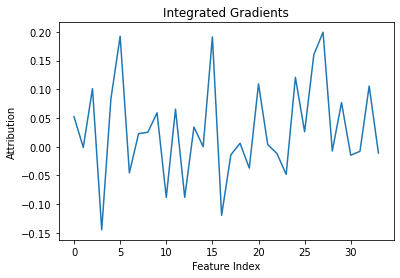

In [378]:
# Create Alibi Integrated Gradients explainer 
Alibi_explainer = IntegratedGradients(resnet1D_wgan_gp, layer=None, method="gausslegendre", n_steps=50)

# Choose the sample for explanation
X = X_test_normalized_resnet1D[0].reshape(1, *X_test_normalized_resnet1D[0].shape)  

# Define the target variable, use the first element to check 
target = np.array([int(y_test.iloc[0])])  

# Calculate integrated gradients
Alibi_explanation = Alibi_explainer.explain(X, target=target)

# Plot the result
attributions = Alibi_explanation.attributions[0].sum(axis=-1)  # sum of the contributions
plt.plot(attributions[0])
plt.title('Integrated Gradients')
plt.xlabel('Feature Index')
plt.ylabel('Attribution')
plt.show()


### Eli5

In [382]:
# Define a wrapper for making the model suitable for ELI5 input
class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        pass 

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int).flatten()

    def predict_proba(self, X):
        return self.model.predict(X)

# Create the instance of the wrapper
ELI5_explainer = KerasClassifier(resnet1D_wgan_gp)

# Use permutation importance to show the feature importance
perm = PermutationImportance(ELI5_explainer, scoring='accuracy', random_state=1).fit(
    X_test_normalized_resnet1D.reshape(X_test_normalized_resnet1D.shape[0], -1),
    y_test
)

# Plot
eli5.show_weights(perm, feature_names=[f'feature_{i}' for i in range(X_test_normalized_resnet1D.shape[1])])
